In [1]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np

finn_key = 'cc7v412ad3i03fardc90'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [2]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [54]:
#def function to create a stock chart for the price/date and volume
def plot_chart(dataframe, stock_name, year):
    fig= plt.figure(figsize=(20,15))
    top_plt = plt.subplot2grid((7,4), (0,0), rowspan=3, colspan=4)
    top_plt.plot(dataframe.index, dataframe['Close'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Stock Price')
    plt.title(f'{stock_name} Performance Over the Year {year}')
    middle_plt = plt.subplot2grid((7,4),(3,0), rowspan=2, colspan=4)
    middle_plt.bar(dataframe.index, dataframe['Volume'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    bottom_plt = plt.subplot2grid((7,4),(5,0), rowspan=2, colspan=4)
    bottom_plt.bar(dataframe.index, dataframe['Volume'])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlim([min(dataframe.index),max(dataframe.index)])
    plt.ylabel('Trading Volume by Millions')
    fig.tight_layout();

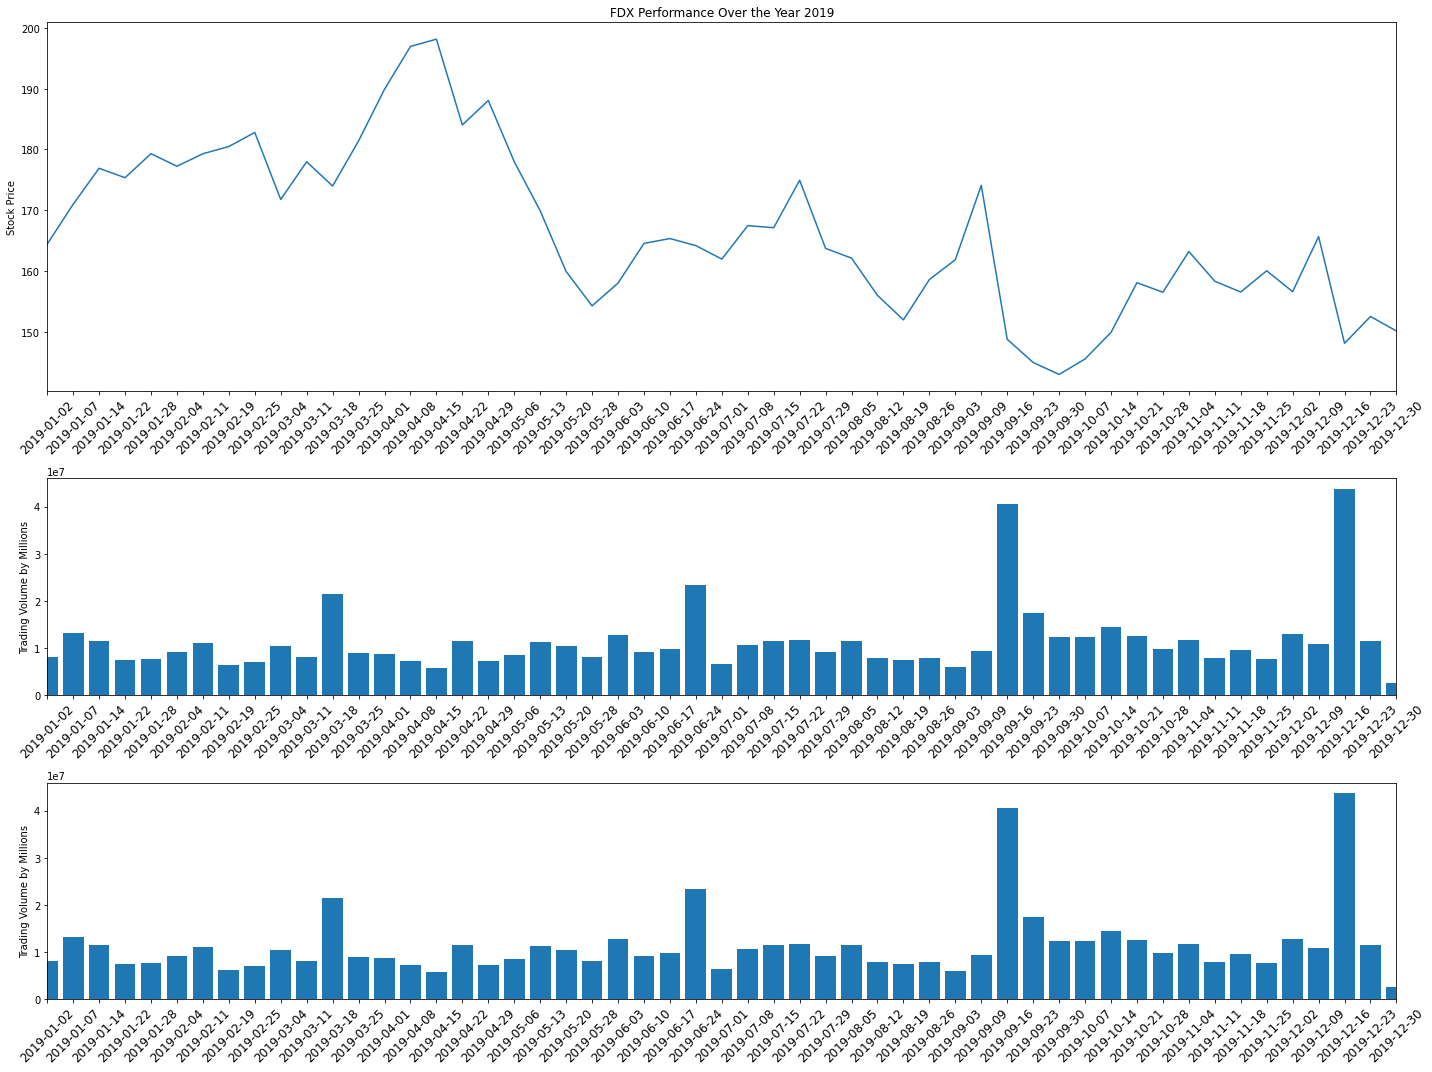

In [55]:
plot_chart(FDX_2019, 'FDX', 2019)

In [4]:
#importing randomly chosen stocks by each industry with no bias
unbias_stock_df = pd.read_csv('./random_stock_selection/output/ten_industry_df.csv')
unbias_stock_df.head()

Ticker                  Company Name           Industry Country  \
0    UAL  United Airlines Holdings Inc           Airlines      US   
1    DAL           Delta Air Lines Inc           Airlines      US   
2   TSLA                     Tesla Inc        Automobiles      US   
3     GM             General Motors Co        Automobiles      US   
4    CLX                     Clorox Co  Consumer products      US   

      Market Cap  
0   11537.355102  
1   19838.664269  
2  846694.931971  
3   56091.145112  
4   17593.841731

In [5]:
#Creating a dataframe of each companies stock history by year
UAL_2019 = stock_df('UAL', beg_2019, end_2019).set_index('Time')
UAL_2020 = stock_df('UAL', beg_2020, end_2020).set_index('Time')
UAL_2021 = stock_df('UAL', beg_2021, end_2021).set_index('Time')
DAL_2019 = stock_df('DAL', beg_2019, end_2019).set_index('Time')
DAL_2020 = stock_df('DAL', beg_2020, end_2020).set_index('Time')
DAL_2021 = stock_df('DAL', beg_2021, end_2021).set_index('Time')
TSLA_2019 = stock_df('TSLA', beg_2019, end_2019).set_index('Time')
TSLA_2020 = stock_df('TSLA', beg_2020, end_2020).set_index('Time')
TSLA_2021 = stock_df('TSLA', beg_2021, end_2021).set_index('Time')
GM_2019 = stock_df('GM', beg_2019, end_2019).set_index('Time')
GM_2020 = stock_df('GM', beg_2020, end_2020).set_index('Time')
GM_2021 = stock_df('GM', beg_2021, end_2021).set_index('Time')
CLX_2019 = stock_df('CLX', beg_2019, end_2019).set_index('Time')
CLX_2020 = stock_df('CLX', beg_2020, end_2020).set_index('Time')
CLX_2021 = stock_df('CLX', beg_2021, end_2021).set_index('Time')
EL_2019 = stock_df('EL', beg_2019, end_2019).set_index('Time')
EL_2020 = stock_df('EL', beg_2020, end_2020).set_index('Time')
EL_2021 = stock_df('EL', beg_2021, end_2021).set_index('Time')
ALGN_2019 = stock_df('ALGN', beg_2019, end_2019).set_index('Time')
ALGN_2020 = stock_df('ALGN', beg_2020, end_2020).set_index('Time')
ALGN_2021 = stock_df('ALGN', beg_2021, end_2021).set_index('Time')
MCK_2019 = stock_df('MCK', beg_2019, end_2019).set_index('Time')
MCK_2020 = stock_df('MCK', beg_2020, end_2020).set_index('Time')
MCK_2021 = stock_df('MCK', beg_2021, end_2021).set_index('Time')
LVS_2019 = stock_df('LVS', beg_2019, end_2019).set_index('Time')
LVS_2020 = stock_df('LVS', beg_2020, end_2020).set_index('Time')
LVS_2021 = stock_df('LVS', beg_2021, end_2021).set_index('Time')
MGM_2019 = stock_df('MGM', beg_2019, end_2019).set_index('Time')
MGM_2020 = stock_df('MGM', beg_2020, end_2020).set_index('Time')
MGM_2021 = stock_df('MGM', beg_2021, end_2021).set_index('Time')
FDX_2019 = stock_df('FDX', beg_2019, end_2019).set_index('Time')
FDX_2020 = stock_df('FDX', beg_2020, end_2020).set_index('Time')
FDX_2021 = stock_df('FDX', beg_2021, end_2021).set_index('Time')
UPS_2019 = stock_df('UPS', beg_2019, end_2019).set_index('Time')
UPS_2020 = stock_df('UPS', beg_2020, end_2020).set_index('Time')
UPS_2021 = stock_df('UPS', beg_2021, end_2021).set_index('Time')
VTRS_2019 = stock_df('VTRS', beg_2019, end_2019).set_index('Time')
VTRS_2020 = stock_df('VTRS', beg_2020, end_2020).set_index('Time')
VTRS_2021 = stock_df('VTRS', beg_2021, end_2021).set_index('Time')
CTLT_2019 = stock_df('CTLT', beg_2019, end_2019).set_index('Time')
CTLT_2020 = stock_df('CTLT', beg_2020, end_2020).set_index('Time')
CTLT_2021 = stock_df('CTLT', beg_2021, end_2021).set_index('Time')
EQIX_2019 = stock_df('EQIX', beg_2019, end_2019).set_index('Time')
EQIX_2020 = stock_df('EQIX', beg_2020, end_2020).set_index('Time')
EQIX_2021 = stock_df('EQIX', beg_2021, end_2021).set_index('Time')
PSA_2019 = stock_df('PSA', beg_2019, end_2019).set_index('Time')
PSA_2020 = stock_df('PSA', beg_2020, end_2020).set_index('Time')
PSA_2021 = stock_df('PSA', beg_2021, end_2021).set_index('Time')
TMUS_2019 = stock_df('TMUS', beg_2019, end_2019).set_index('Time')
TMUS_2020 = stock_df('TMUS', beg_2020, end_2020).set_index('Time')
TMUS_2021 = stock_df('TMUS', beg_2021, end_2021).set_index('Time')
VZ_2019 = stock_df('VZ', beg_2019, end_2019).set_index('Time')
VZ_2020 = stock_df('VZ', beg_2020, end_2020).set_index('Time')
VZ_2021 = stock_df('VZ', beg_2021, end_2021).set_index('Time')
AAPL_2019 = stock_df('AAPL', beg_2019, end_2019).set_index('Time')
AAPL_2020 = stock_df('AAPL', beg_2020, end_2020).set_index('Time')
AAPL_2021 = stock_df('AAPL', beg_2021, end_2021).set_index('Time')
# the finnhub api does not display any data for Unity Software
# U_2019 = stock_df('U', beg_2019, end_2019)
# U_2020 = stock_df('U', beg_2020, end_2020)
# U_2021 = stock_df('U', beg_2021, end_2021)
# inplace of Unity, we have decided to just grab the highest marketcap in the Tech Sector which is Microsoft
MSFT_2019 = stock_df('MSFT', beg_2019, end_2019).set_index('Time')
MSFT_2020 = stock_df('MSFT', beg_2020, end_2020).set_index('Time')
MSFT_2021 = stock_df('MSFT', beg_2021, end_2021).set_index('Time')

In [59]:
#covid data
covid20_df = pd.read_csv('Covid_files/WHO-US-Covid20.csv')
covid20_df = covid20_df.rename(columns = {"Date_reported" : "Time"})
covid21_df = pd.read_csv('Covid_files/WHO-US-Covid21.csv')
covid21_df = covid21_df.rename(columns = {"Date_reported" : "Time"})
covid20_UAL_merged = pd.merge(UAL_2020, covid20_df, how='left',on='Time')
covid20_UAL_merged = covid20_UAL_merged.drop(index=[0],axis=0)
covid20_UAL_merged.head()
#covid20_df plot

Time  Close     High    Low   Open    Volume Country_code  \
1  2020-01-06  87.31  88.7200  86.30  86.72  13688630           US   
2  2020-01-13  89.70  90.1000  86.70  87.31  14479157           US   
3  2020-01-21  81.90  88.0000  80.28  87.88  31064072           US   
4  2020-01-27  74.80  78.4750  74.44  78.00  32856190           US   
5  2020-02-03  79.48  82.7211  74.88  75.49  25717555           US   

                    Country WHO_region  New_cases  Cumulative_cases  \
1  United States of America       AMRO        0.0               0.0   
2  United States of America       AMRO        0.0               0.0   
3  United States of America       AMRO        0.0               1.0   
4  United States of America       AMRO        0.0               7.0   
5  United States of America       AMRO        1.0              10.0   

   New_deaths  Cumulative_deaths  
1         0.0                0.0  
2         0.0                0.0  
3         0.0                0.0  
4         0.0                0.0  
5         0.0                0.0

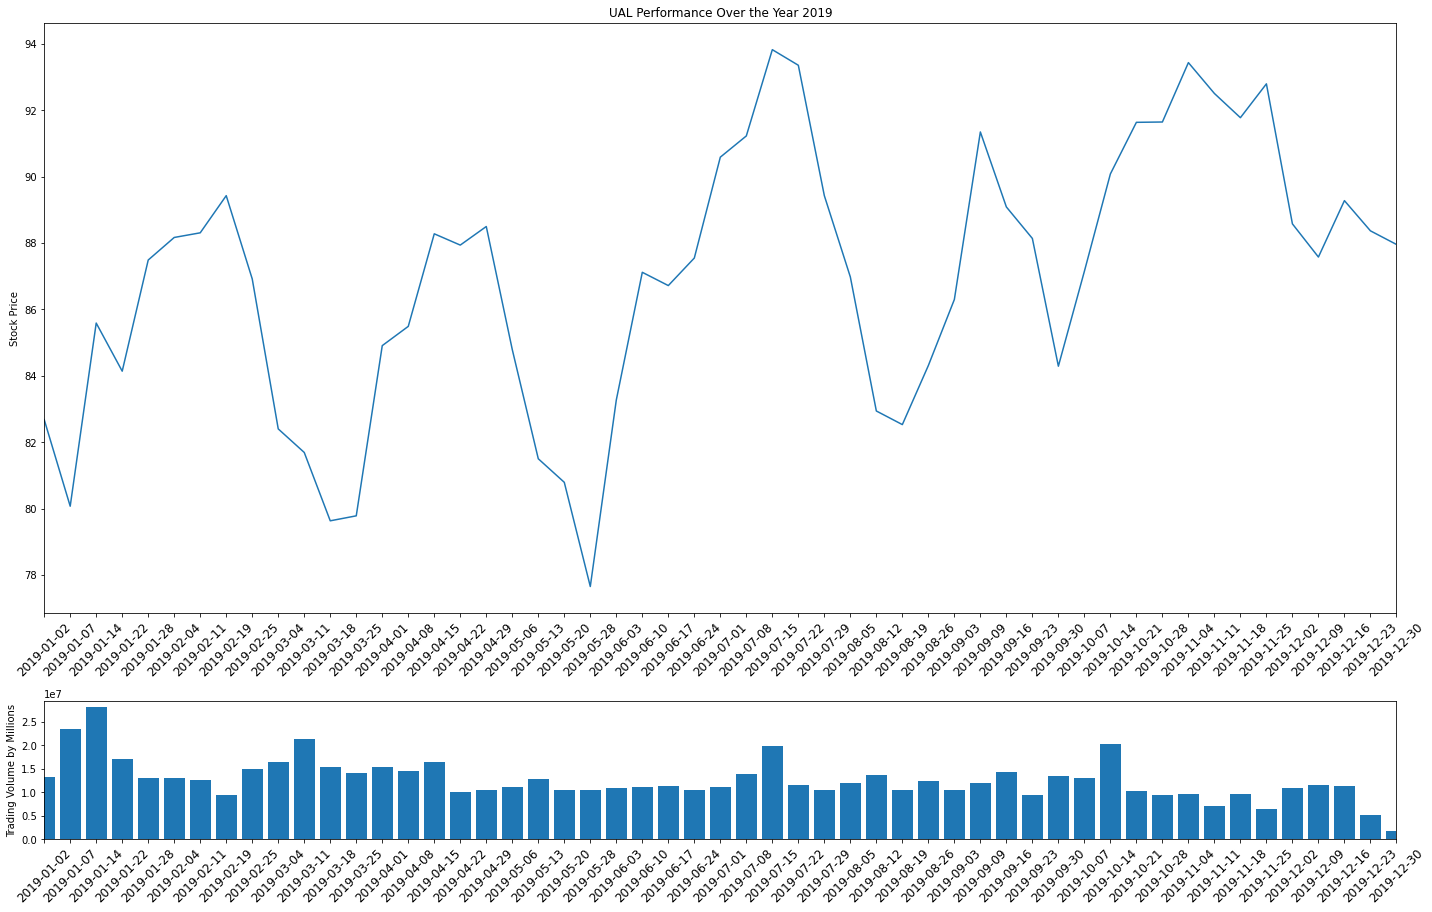

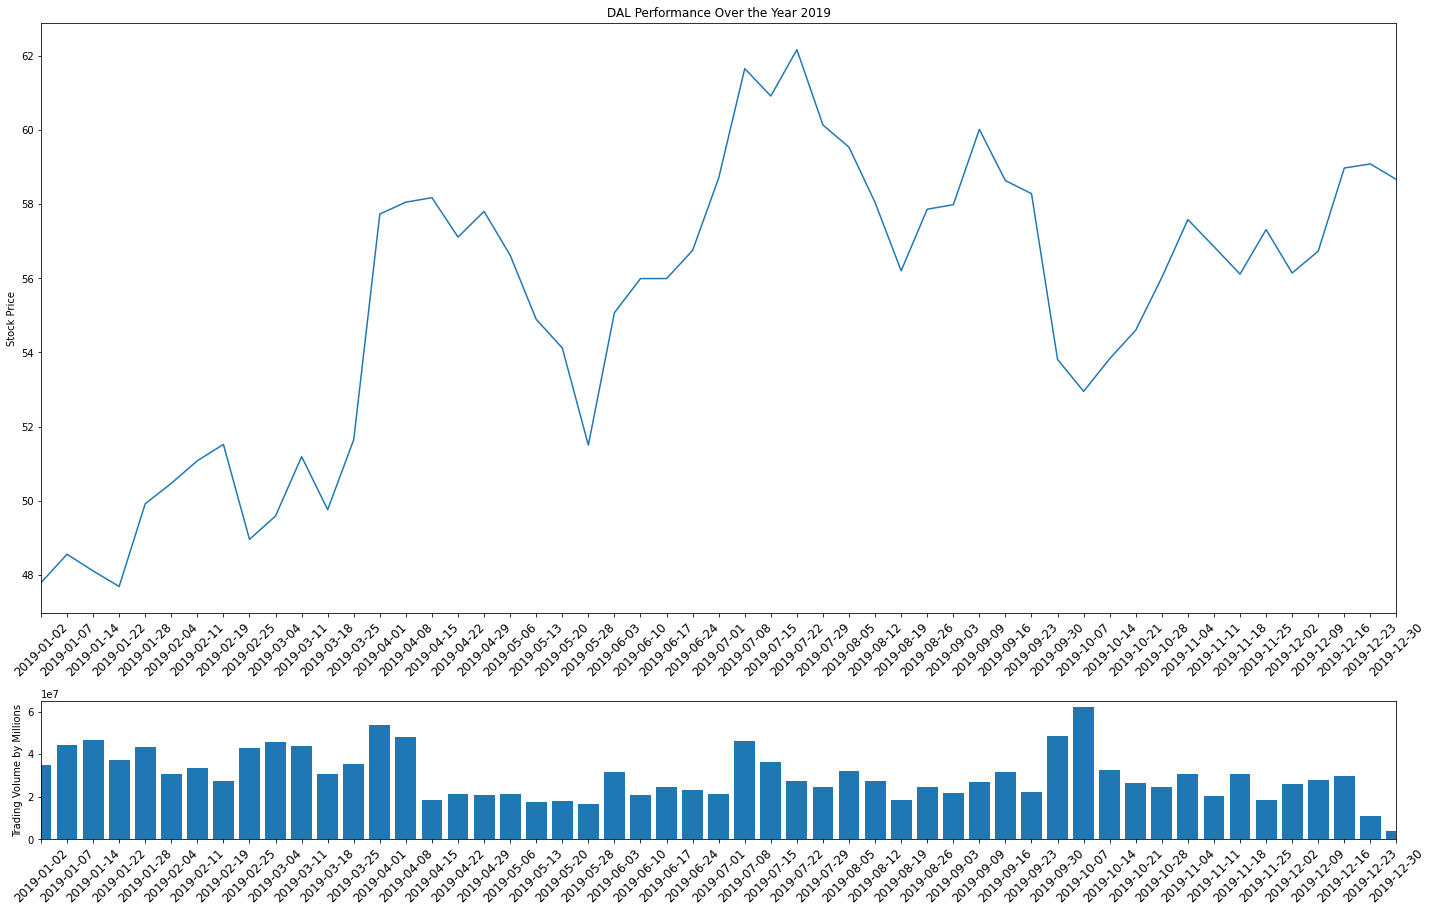

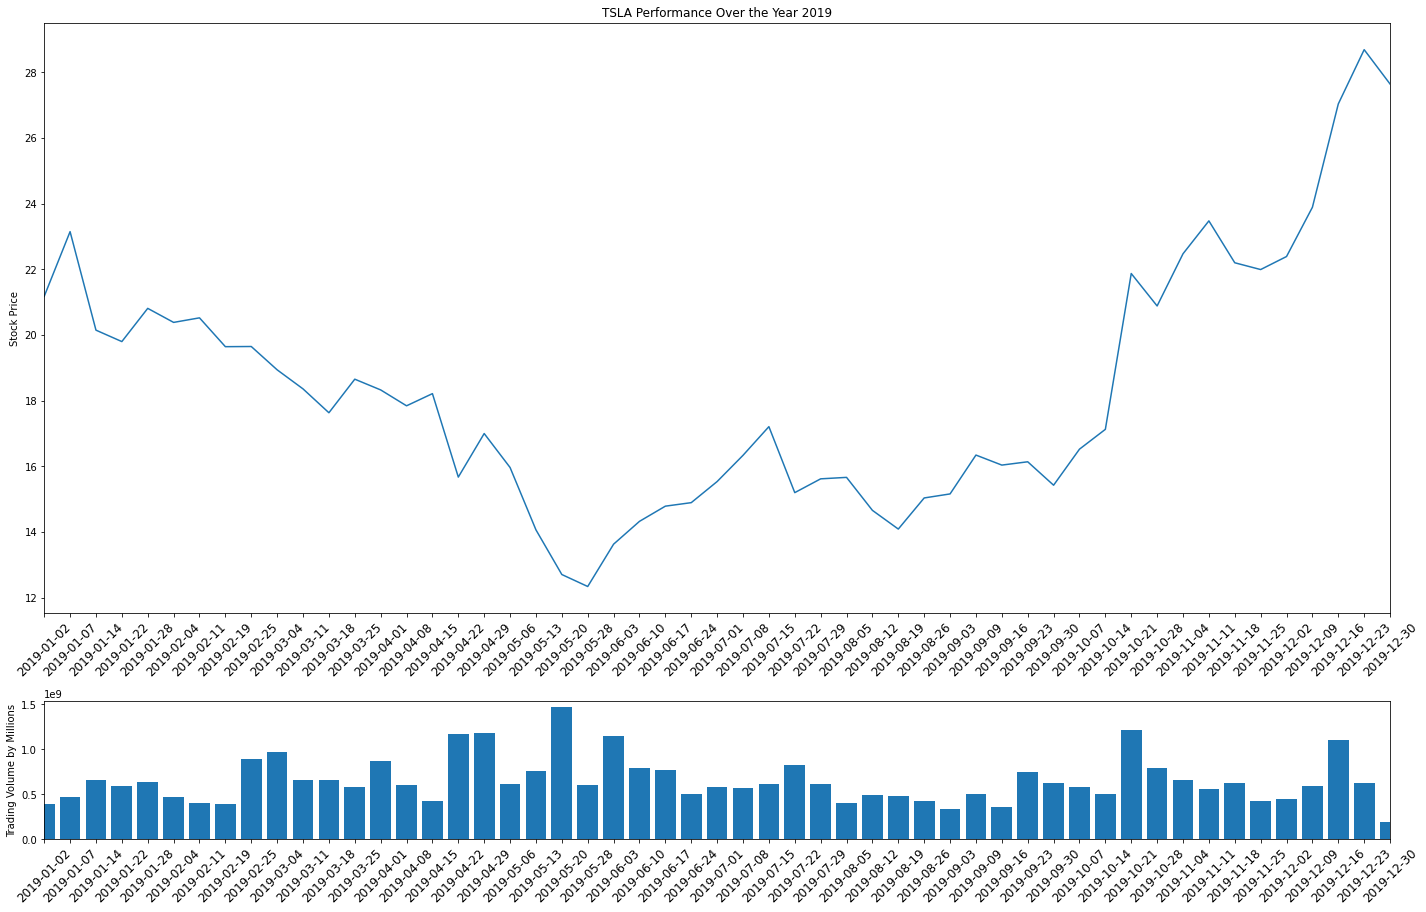

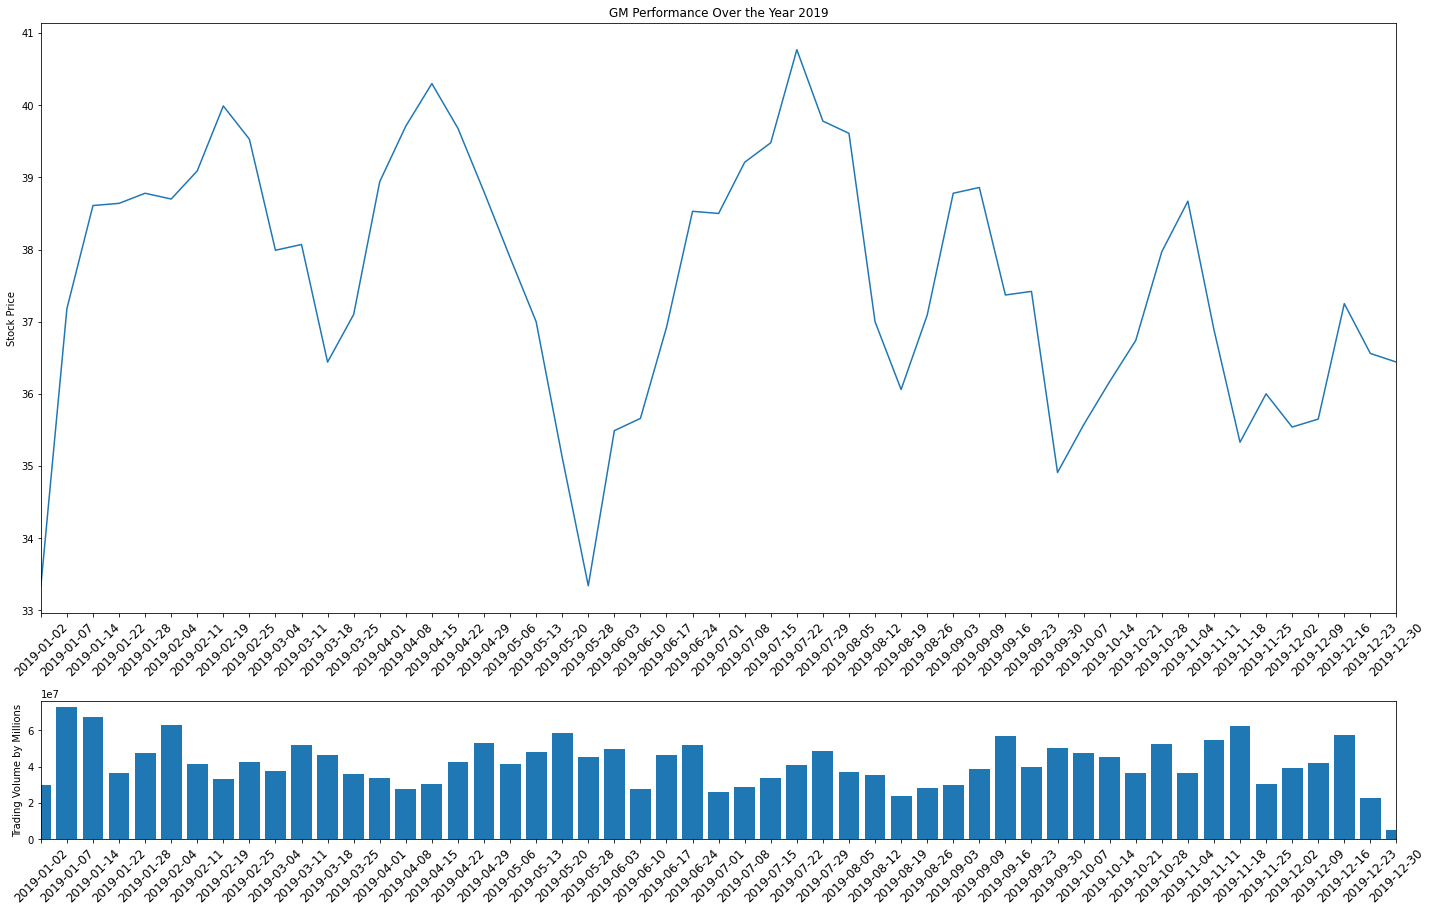

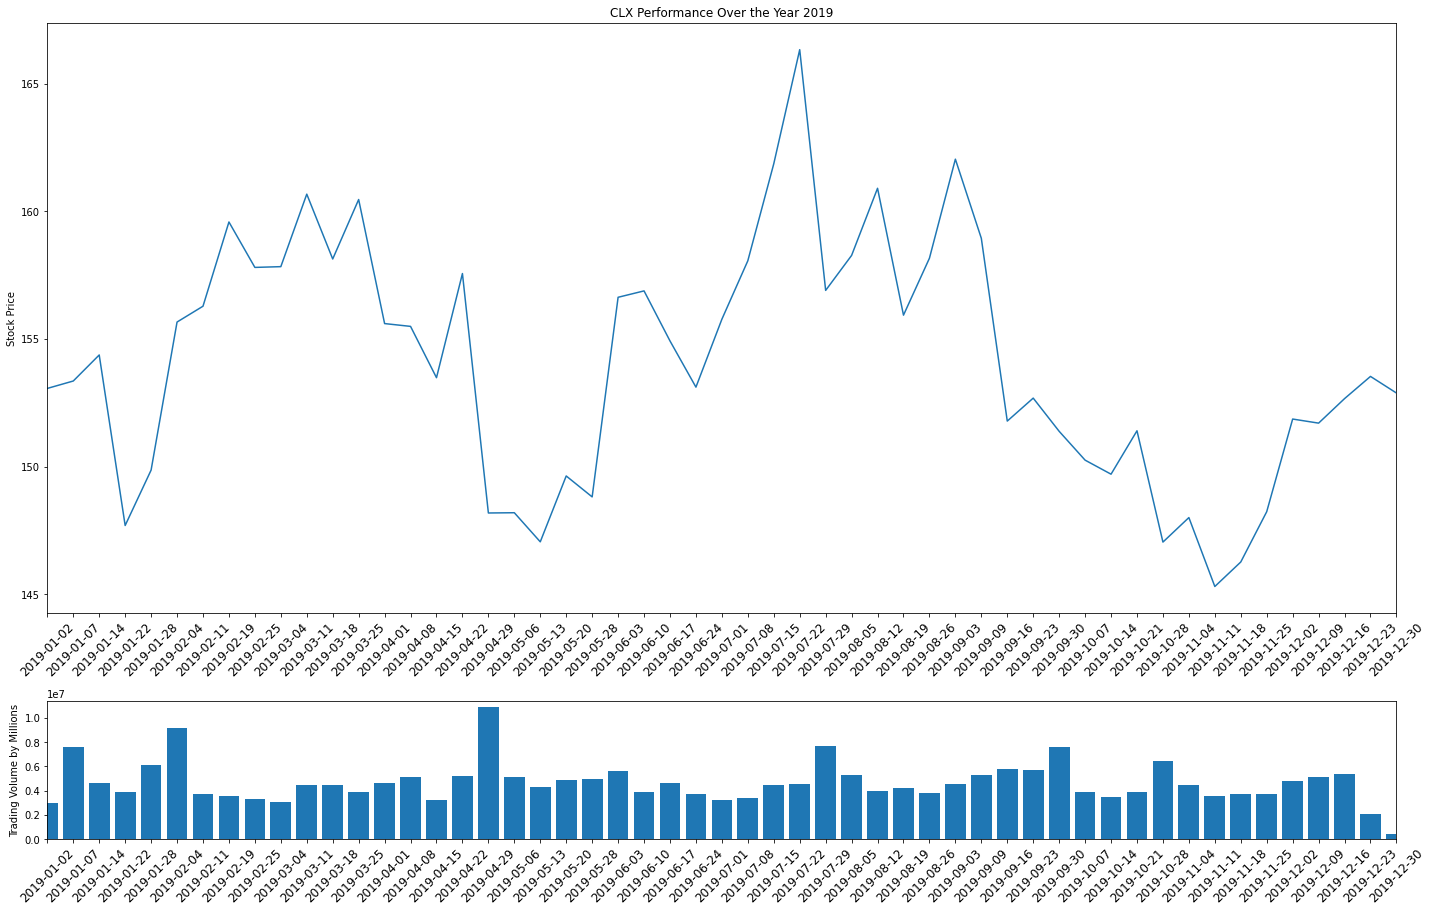

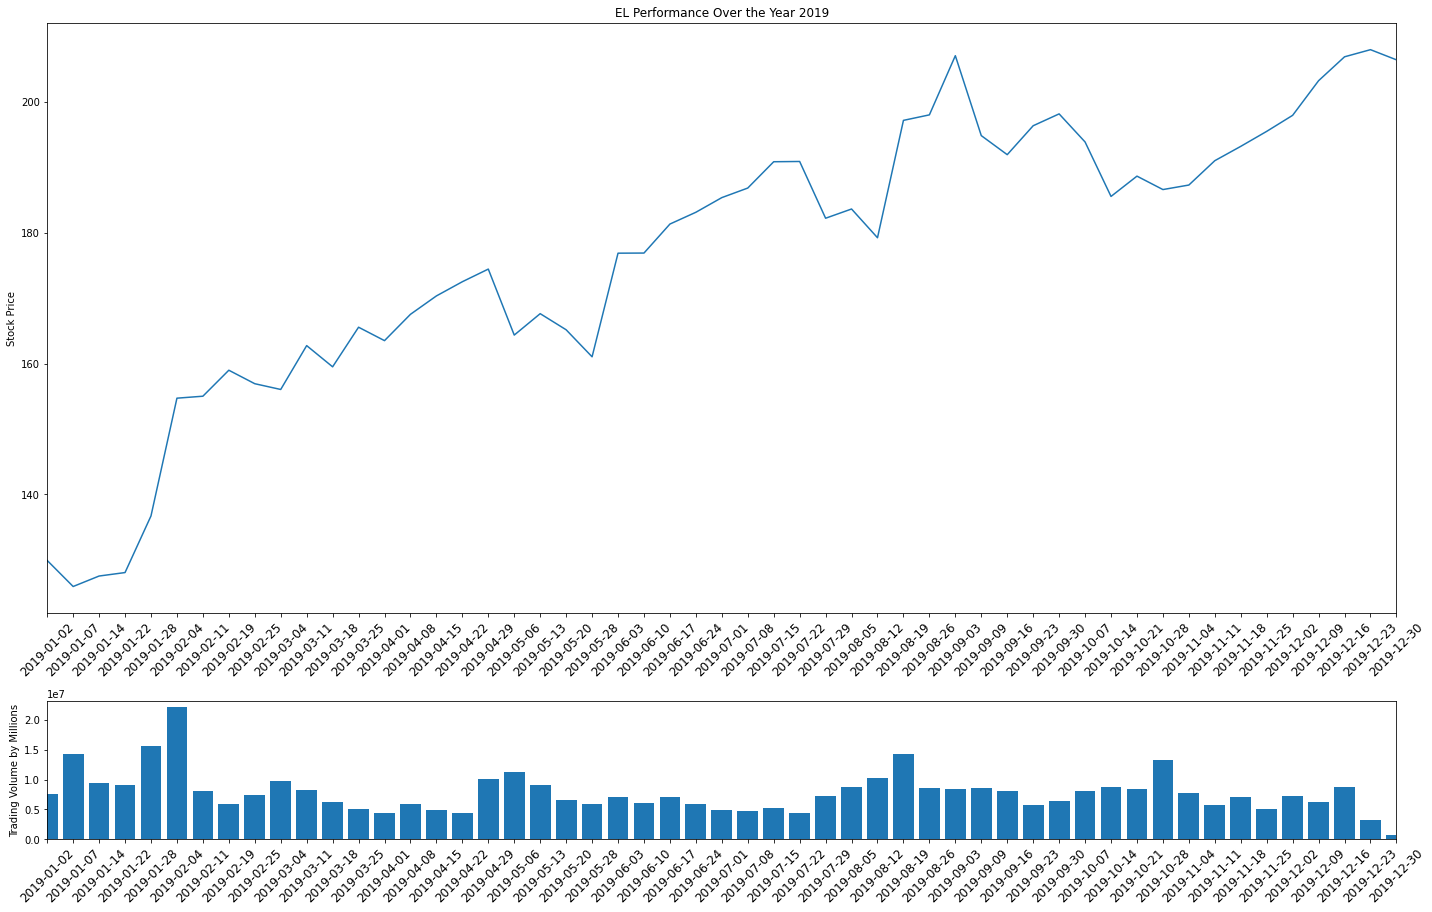

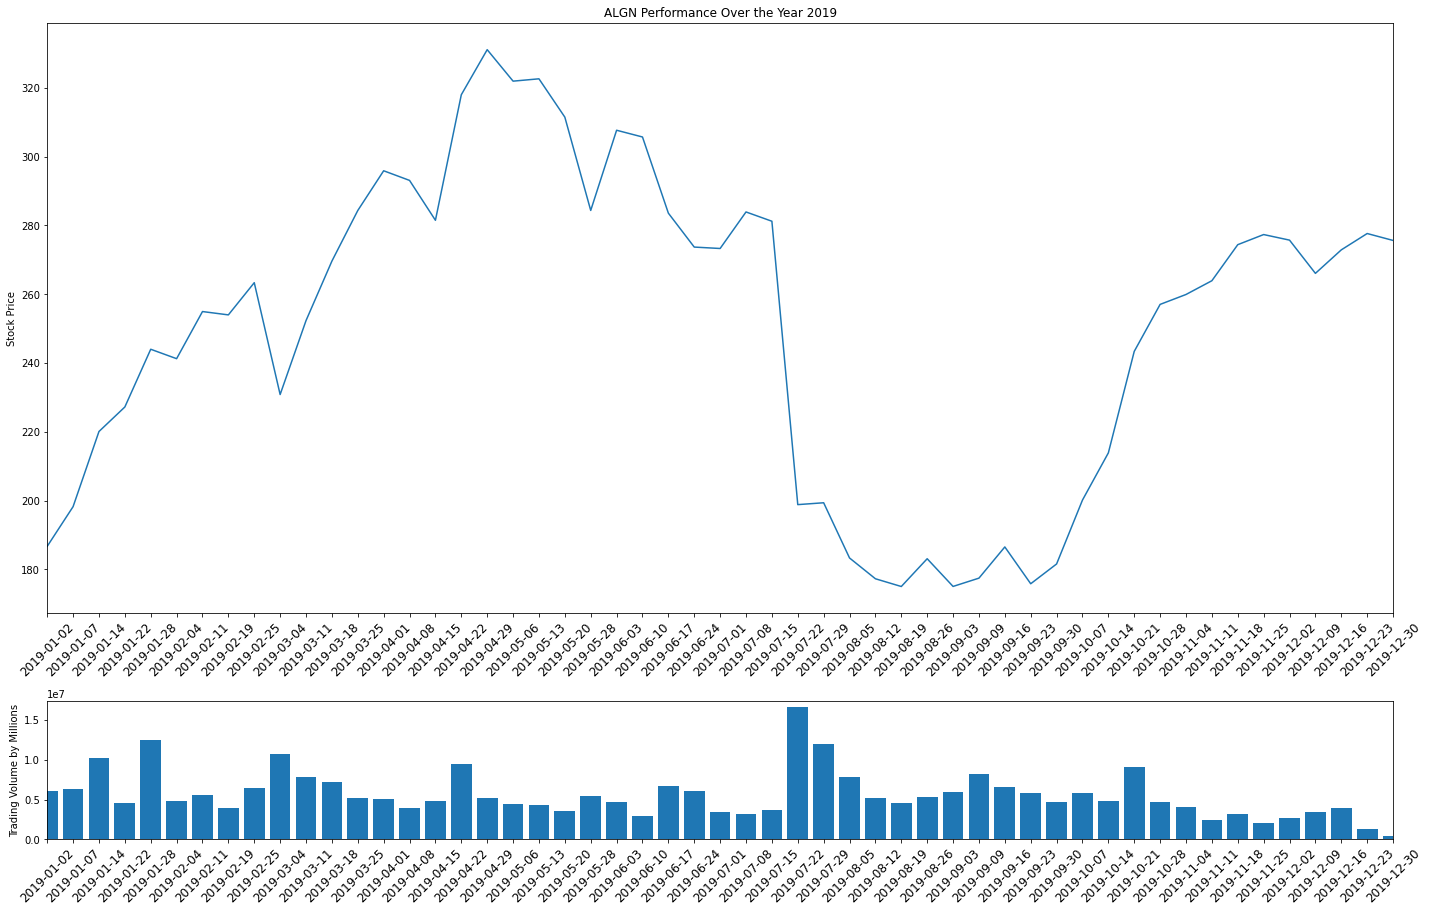

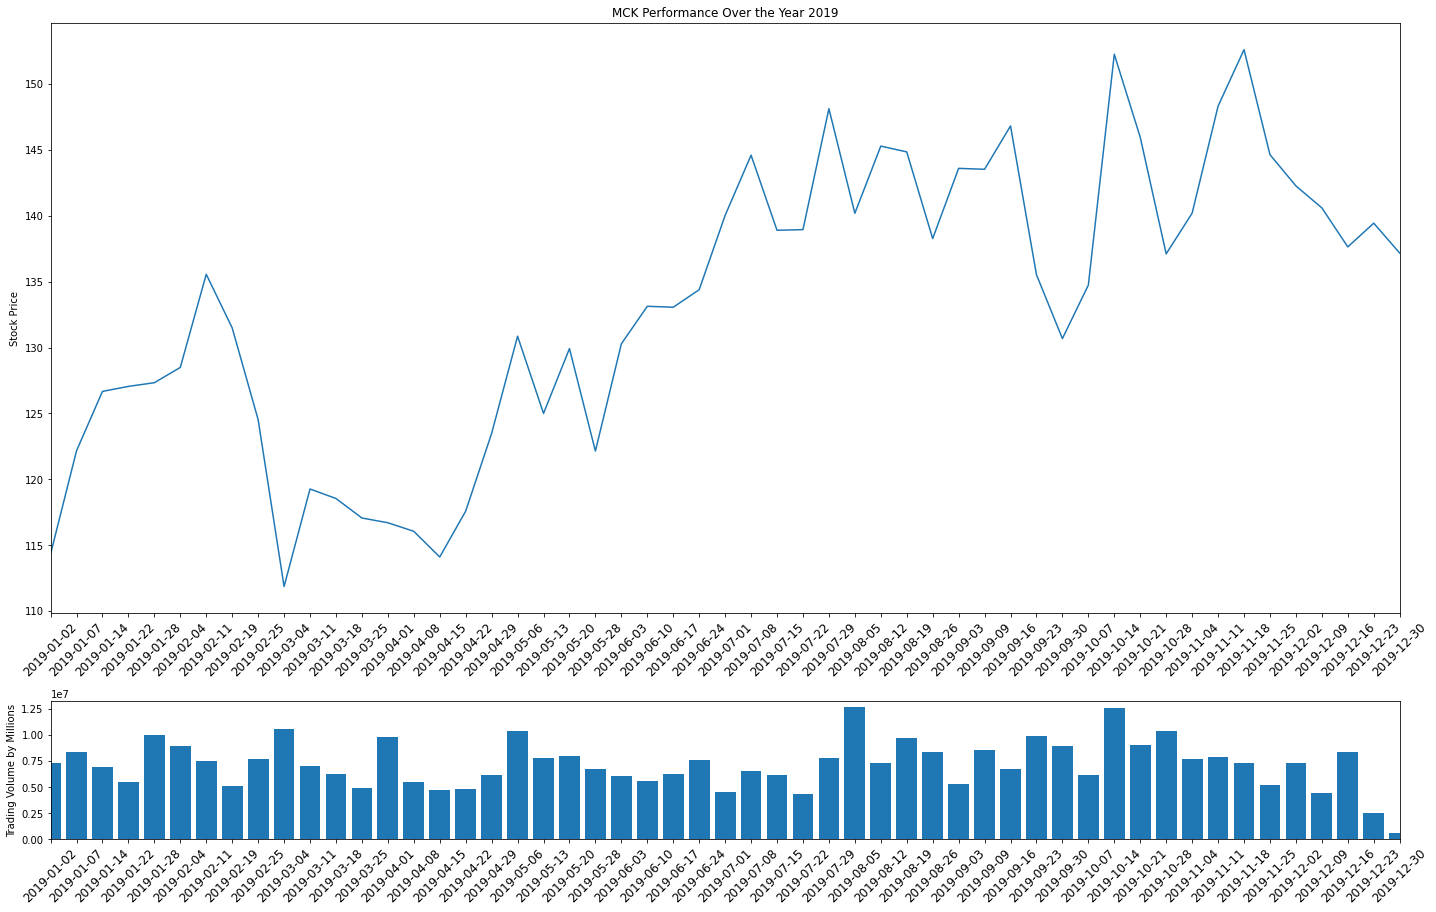

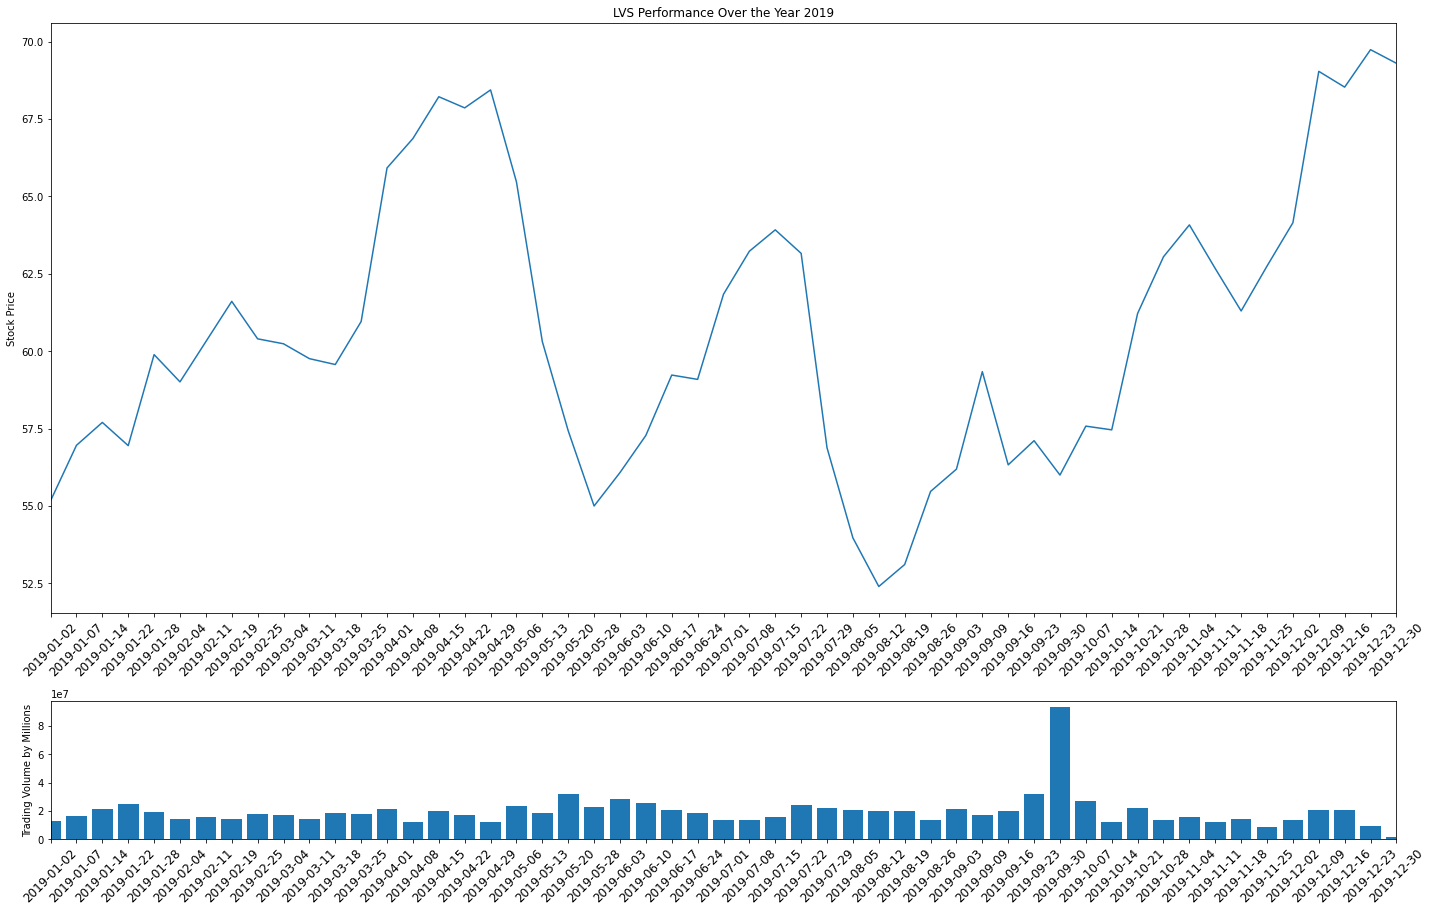

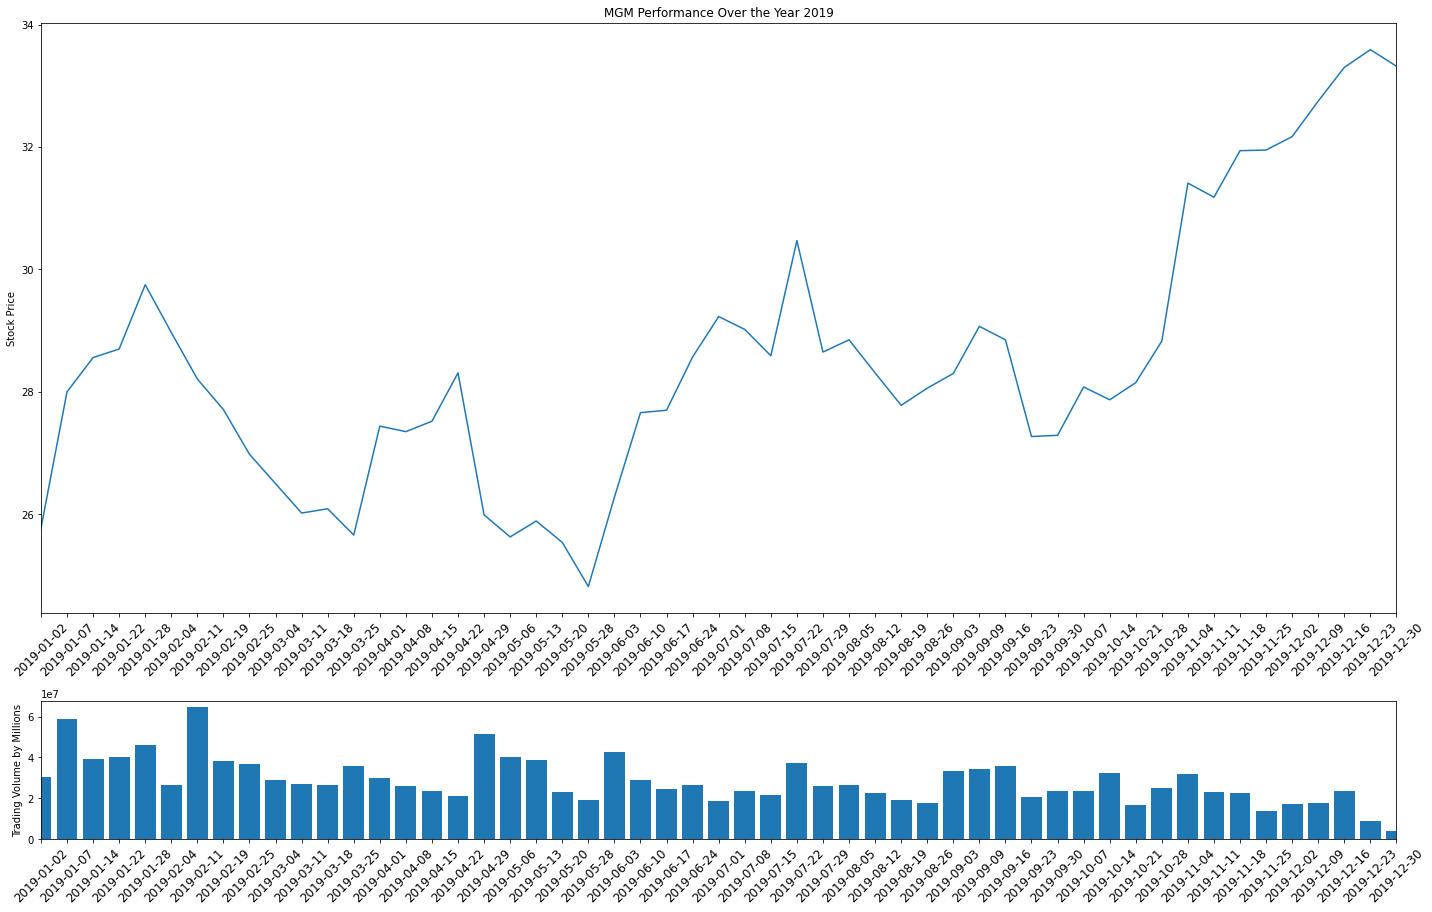

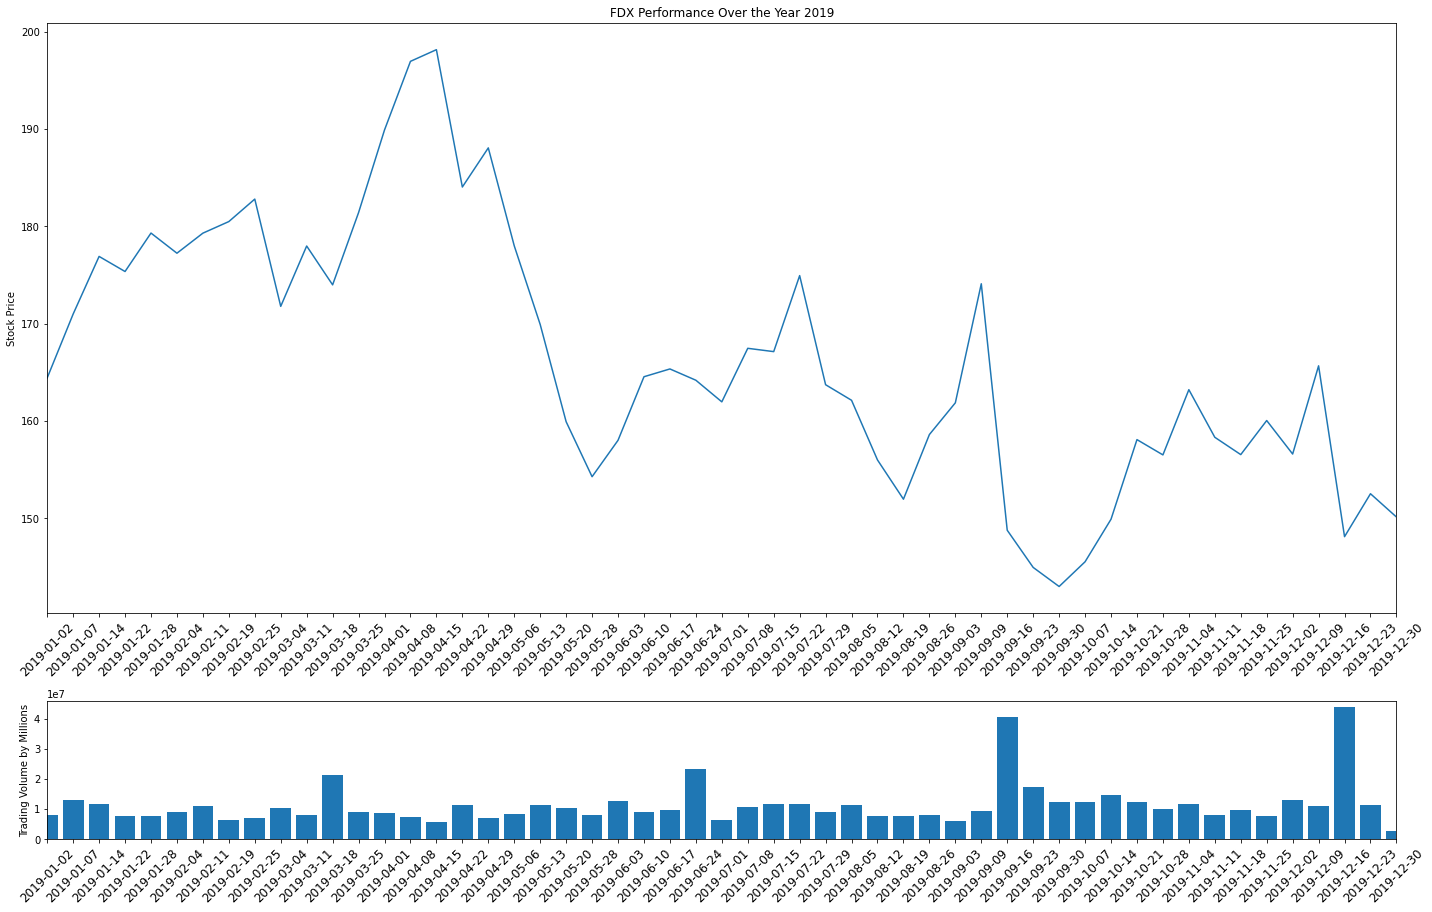

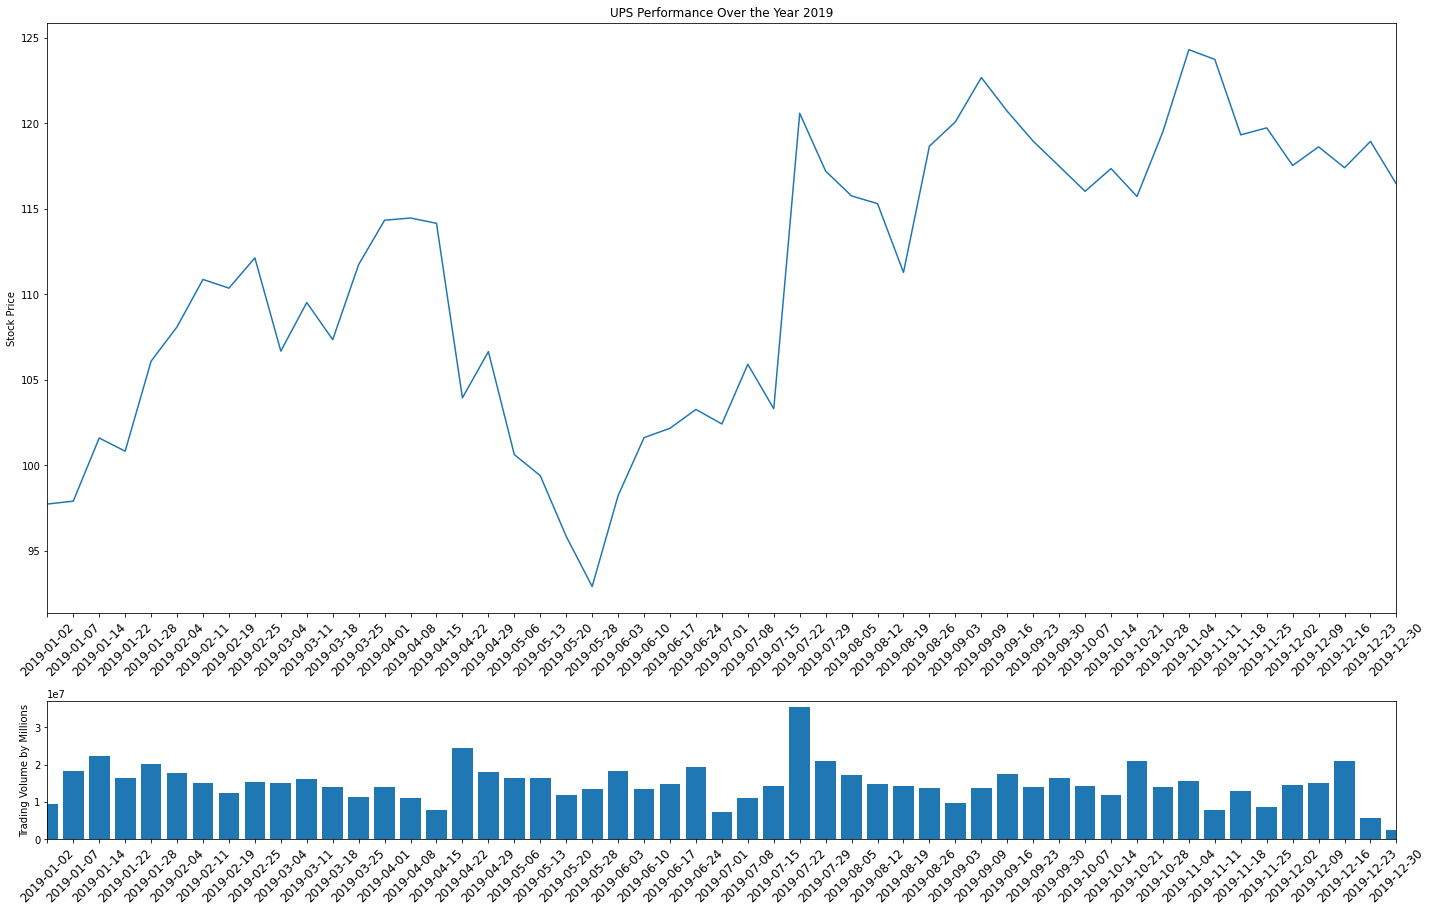

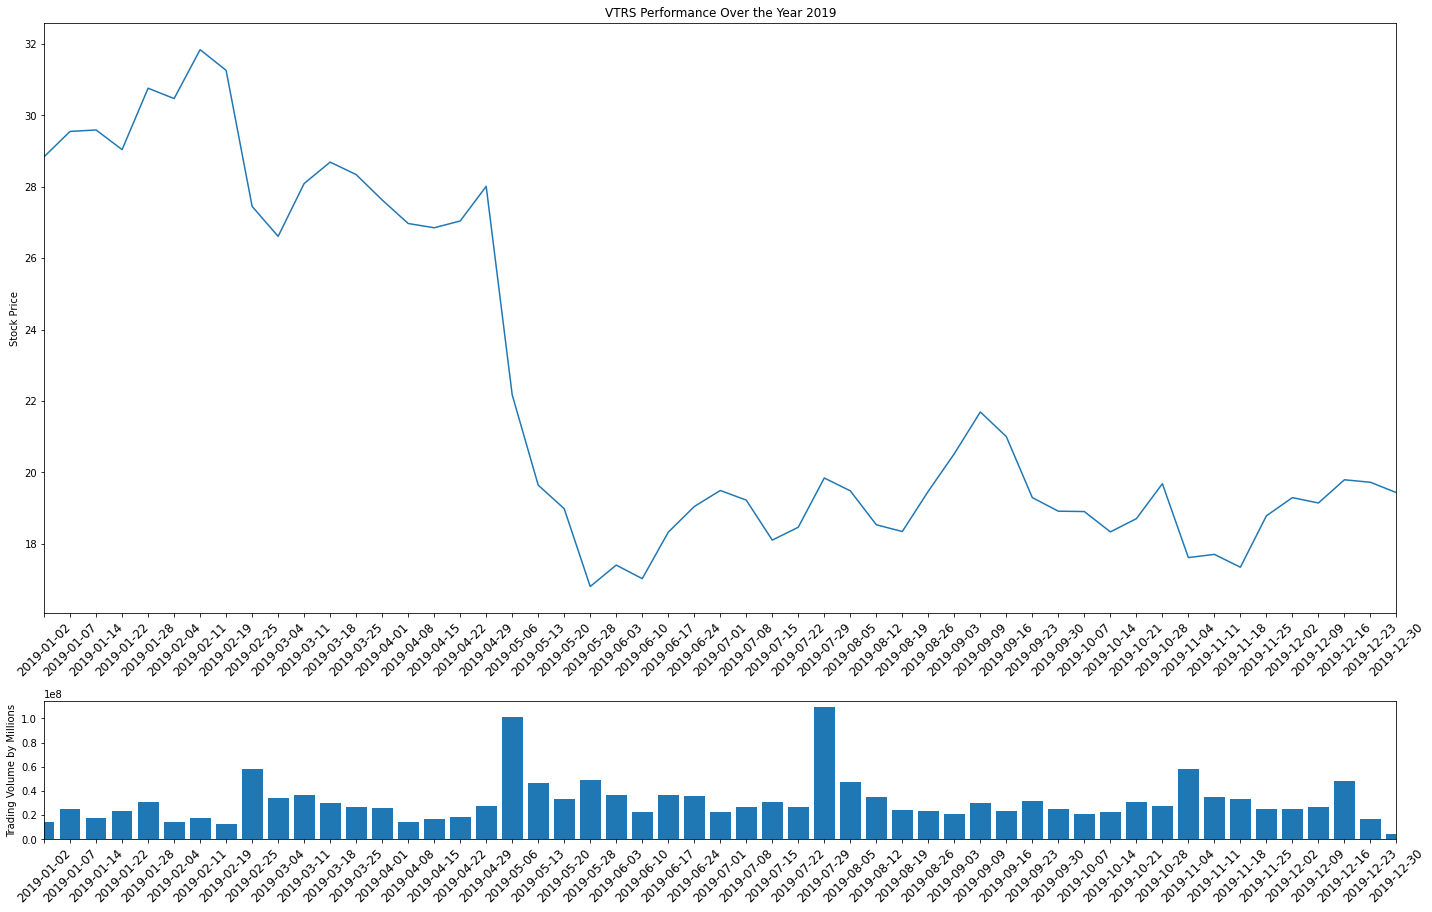

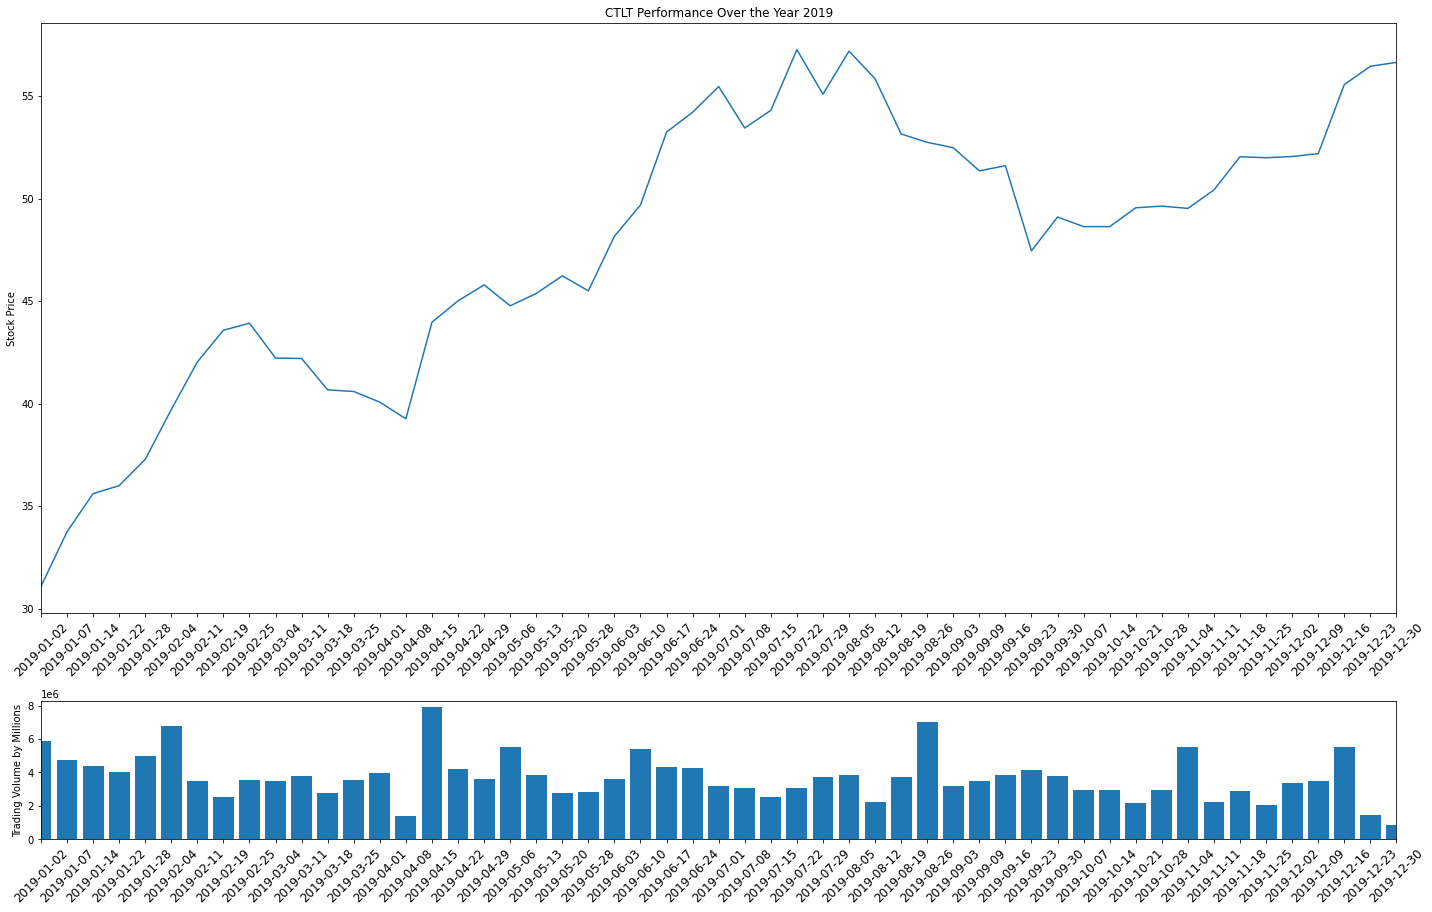

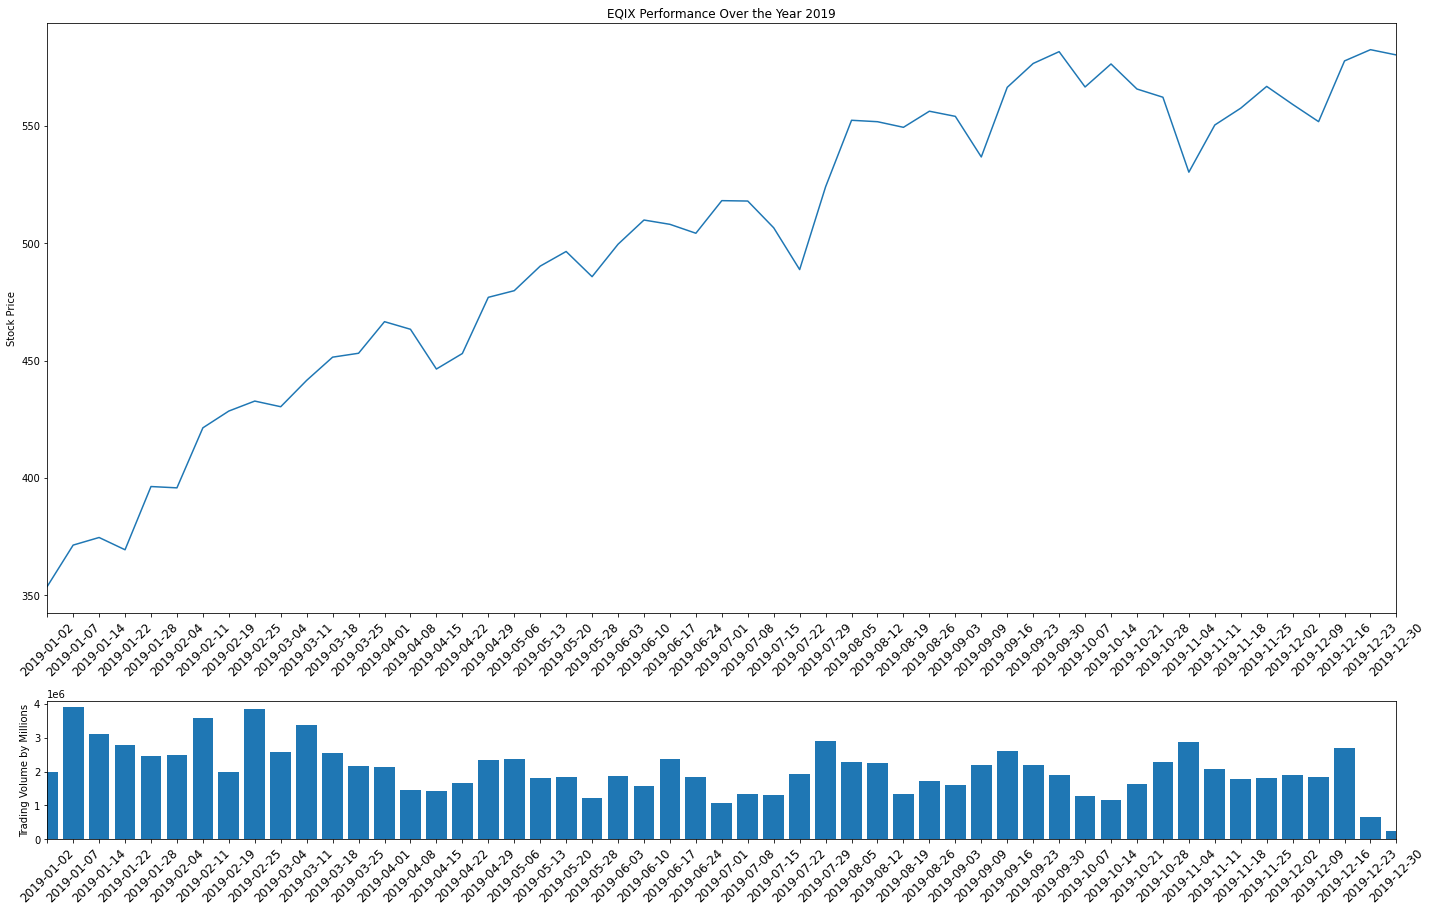

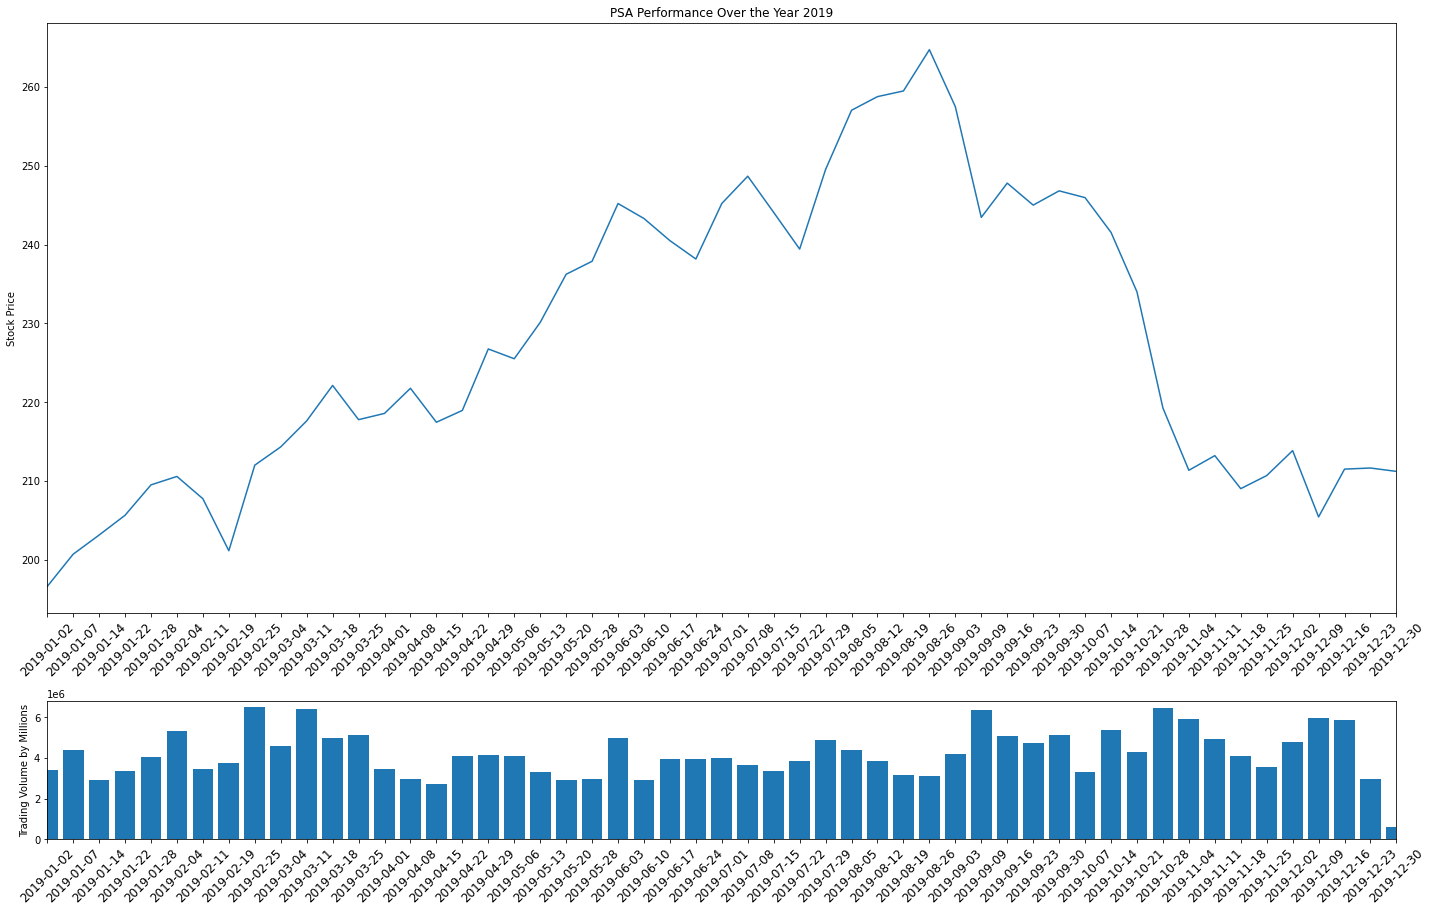

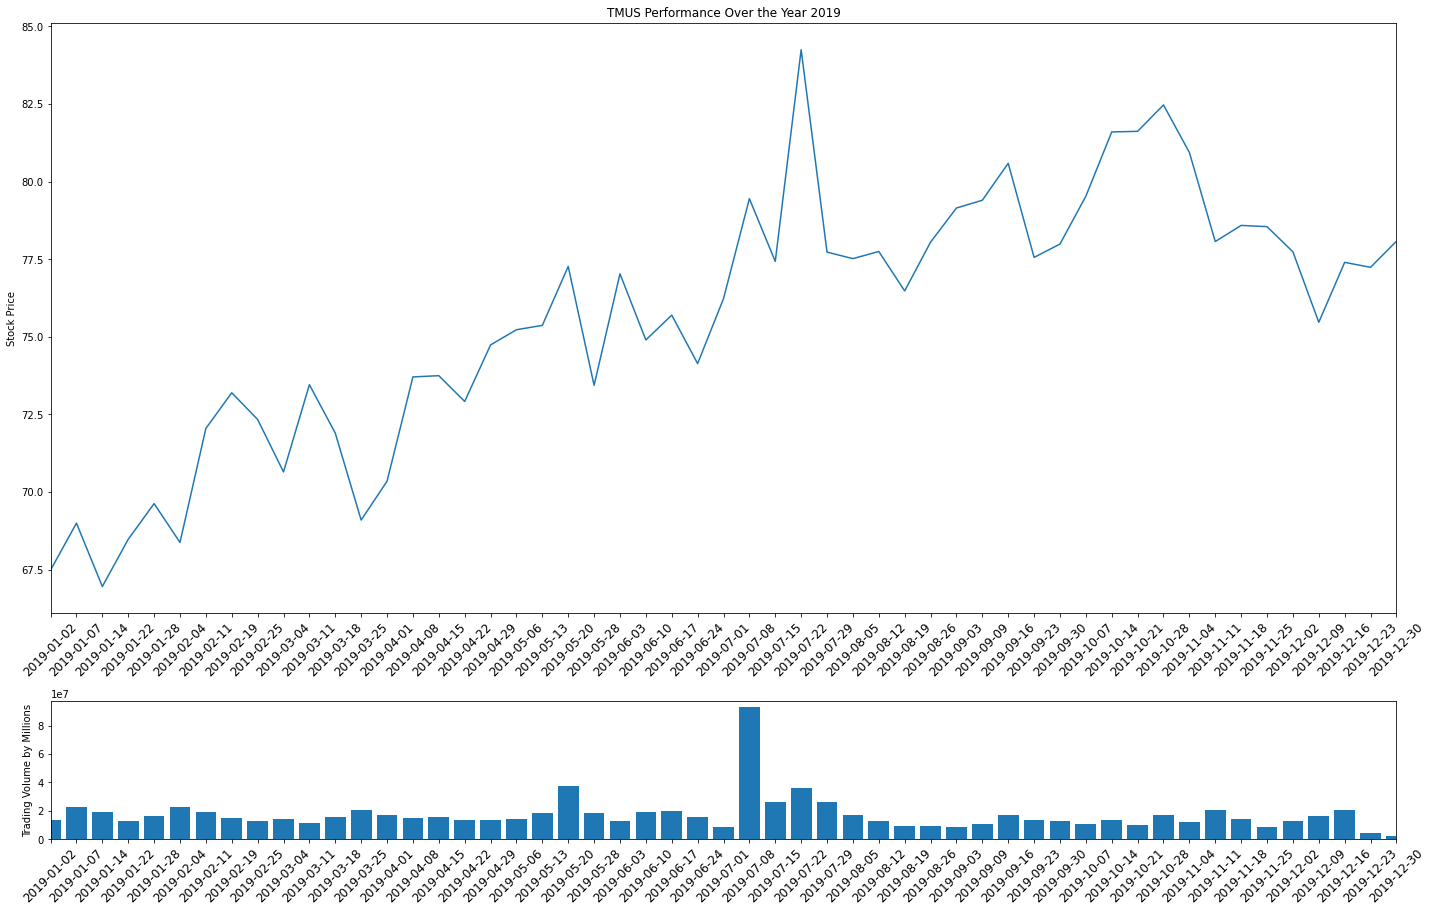

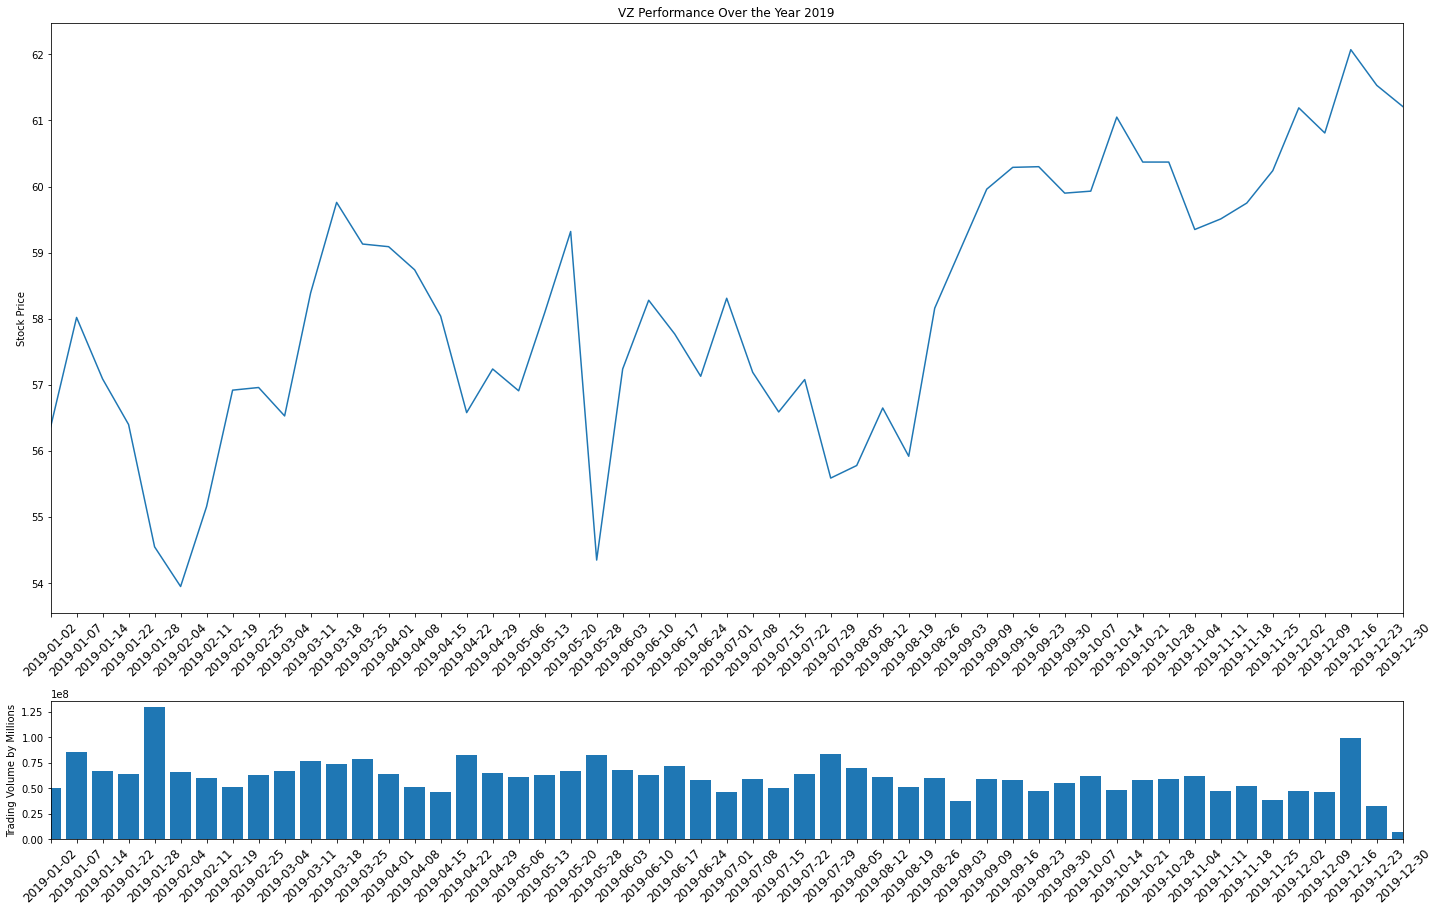

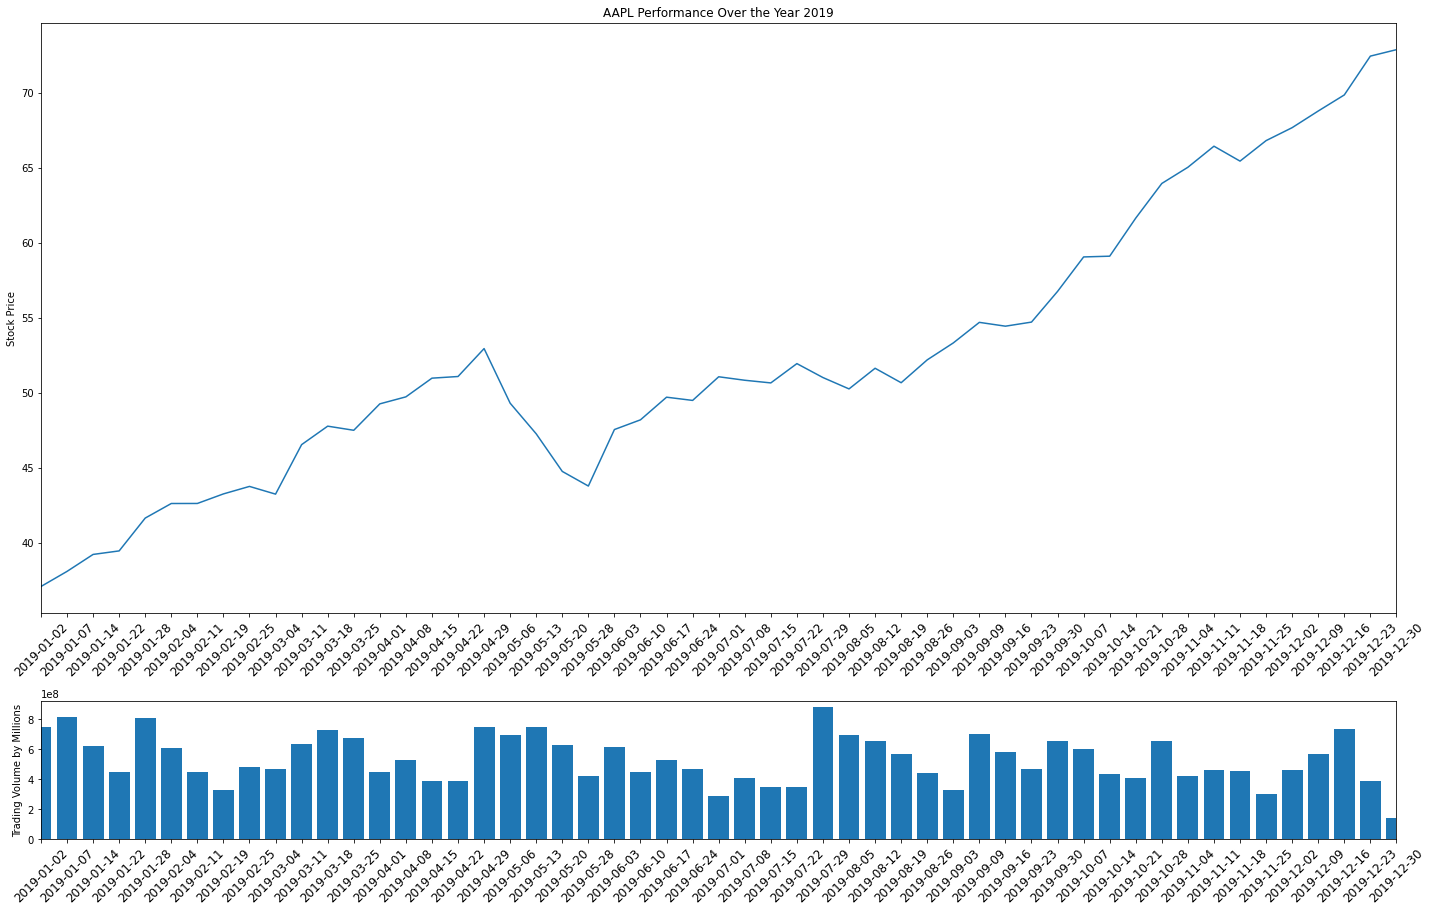

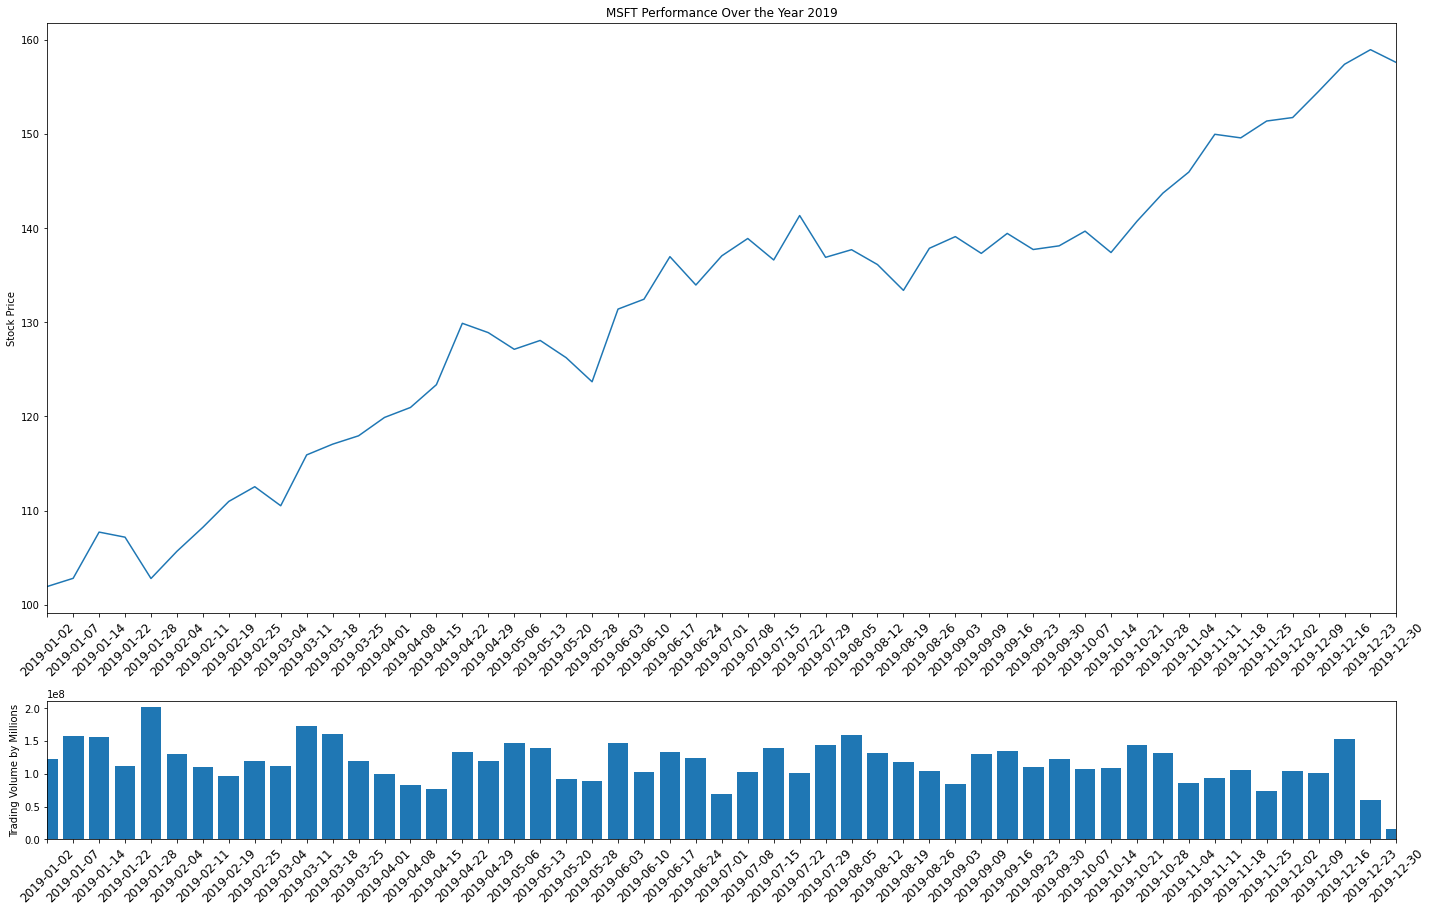

In [70]:
#plotting each ticker and saving it to files
#2019
plot_chart(UAL_2019, 'UAL', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/UAL_2019')
plot_chart(DAL_2019, 'DAL', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/DAL_2019')
plot_chart(TSLA_2019, 'TSLA', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/TSLA_2019')
plot_chart(GM_2019, 'GM', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/GM_2019')
plot_chart(CLX_2019, 'CLX', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/CLX_2019')
plot_chart(EL_2019, 'EL', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/EL_2019')
plot_chart(ALGN_2019, 'ALGN', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/ALGN_2019')
plot_chart(MCK_2019, 'MCK', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/MCK_2019')
plot_chart(LVS_2019, 'LVS', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/LVS_2019')
plot_chart(MGM_2019, 'MGM', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/MGM_2019')
plot_chart(FDX_2019, 'FDX', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/FDX_2019')
plot_chart(UPS_2019, 'UPS', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/UPS_2019')
plot_chart(VTRS_2019, 'VTRS', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/VTRS_2019')
plot_chart(CTLT_2019, 'CTLT', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/CTLT_2019')
plot_chart(EQIX_2019, 'EQIX', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/EQIX_2019')
plot_chart(PSA_2019, 'PSA', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/PSA_2019')
plot_chart(TMUS_2019, 'TMUS', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/TMUS_2019')
plot_chart(VZ_2019, 'VZ', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/VZ_2019')
plot_chart(AAPL_2019, 'AAPL', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/AAPL_2019')
plot_chart(MSFT_2019, 'MSFT', 2019)
plt.savefig('Plotted_Images/2019_ticker_performance/MSFT_2019')

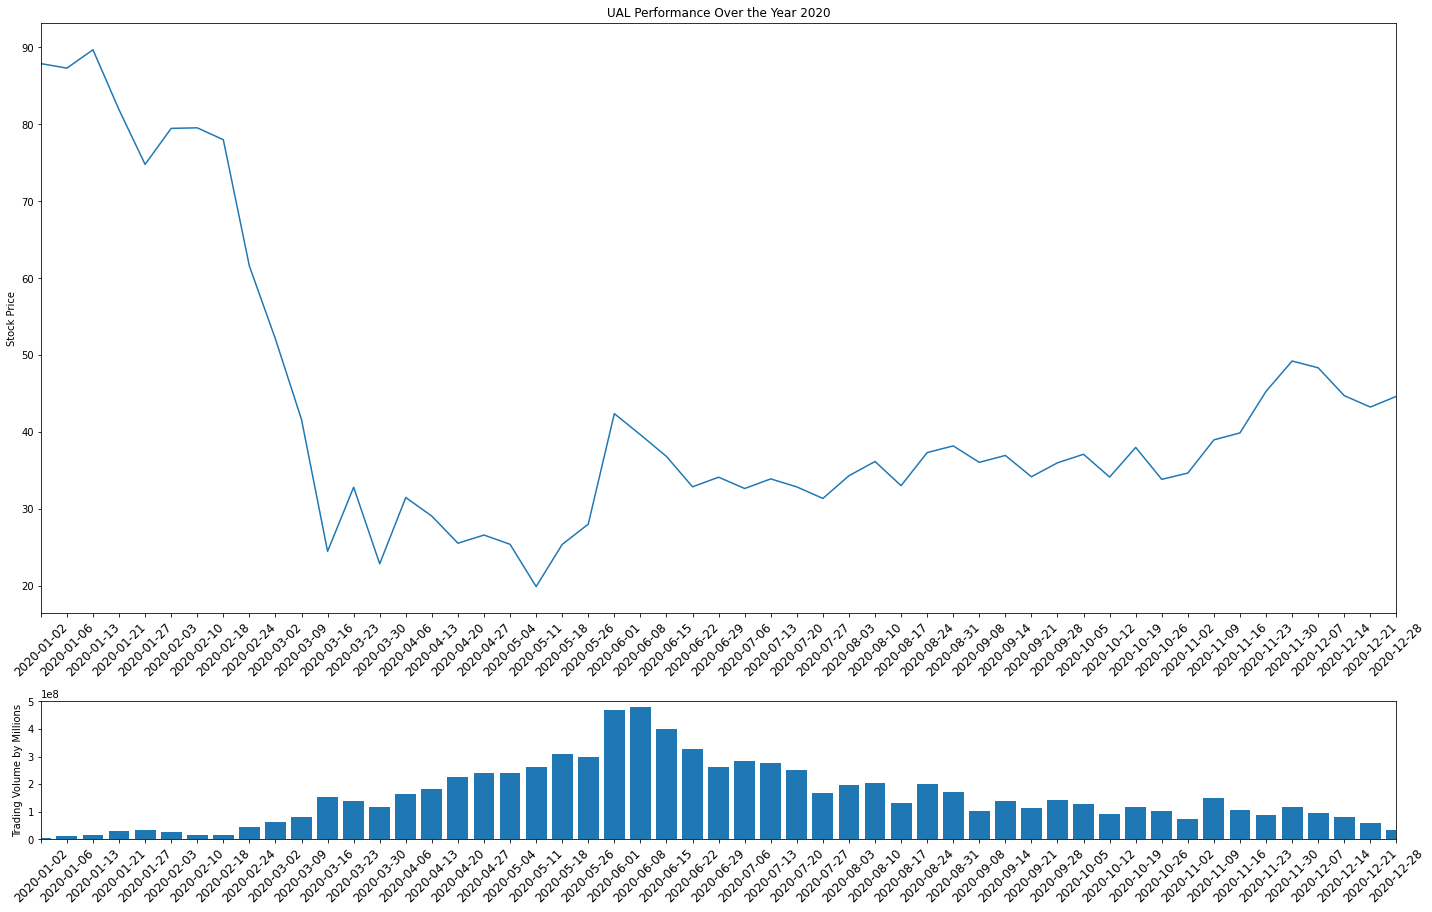

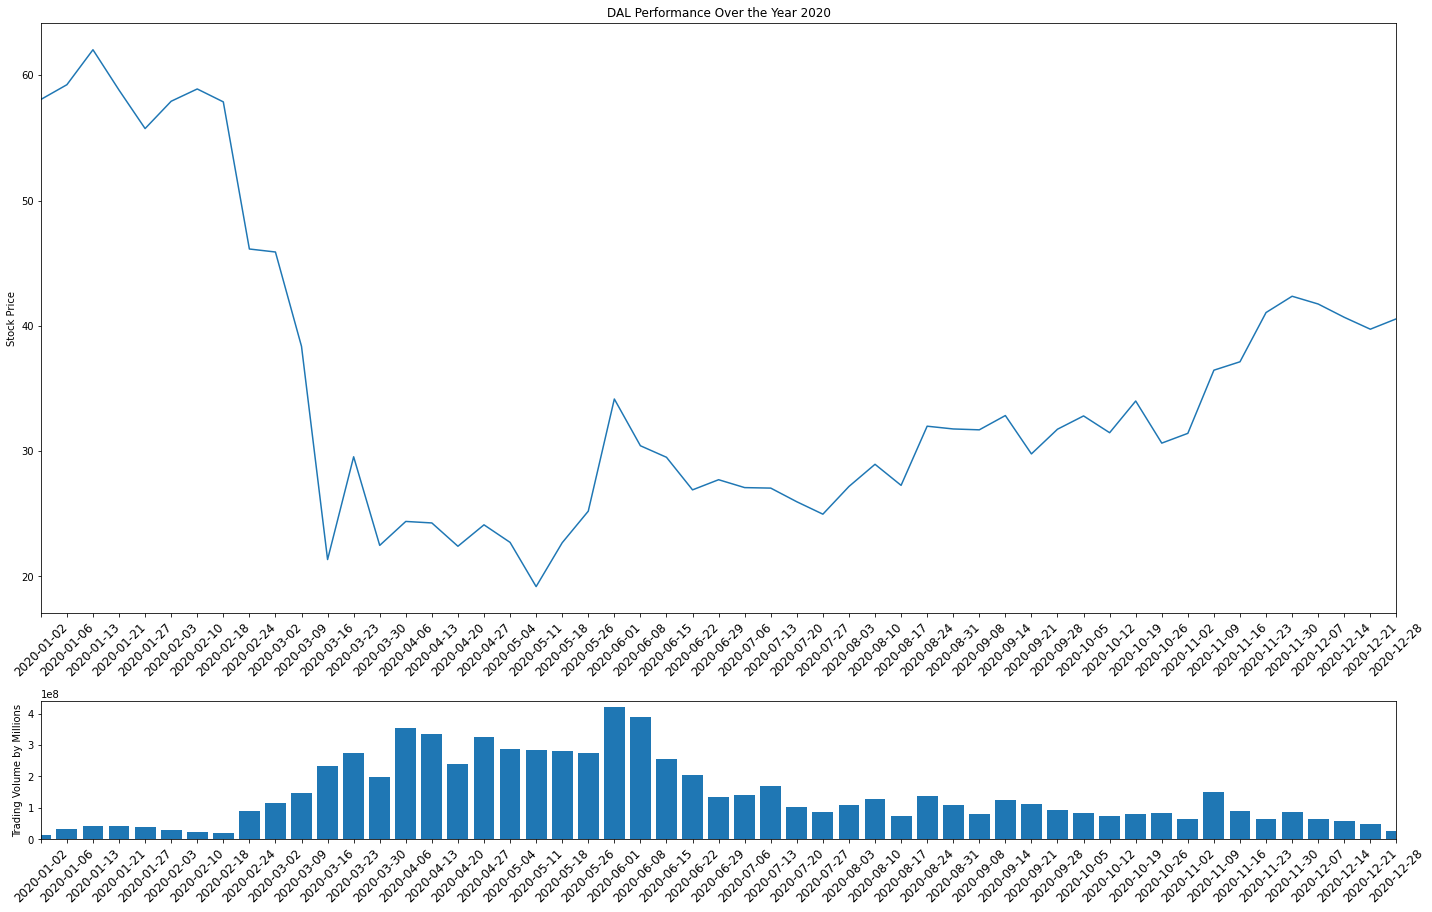

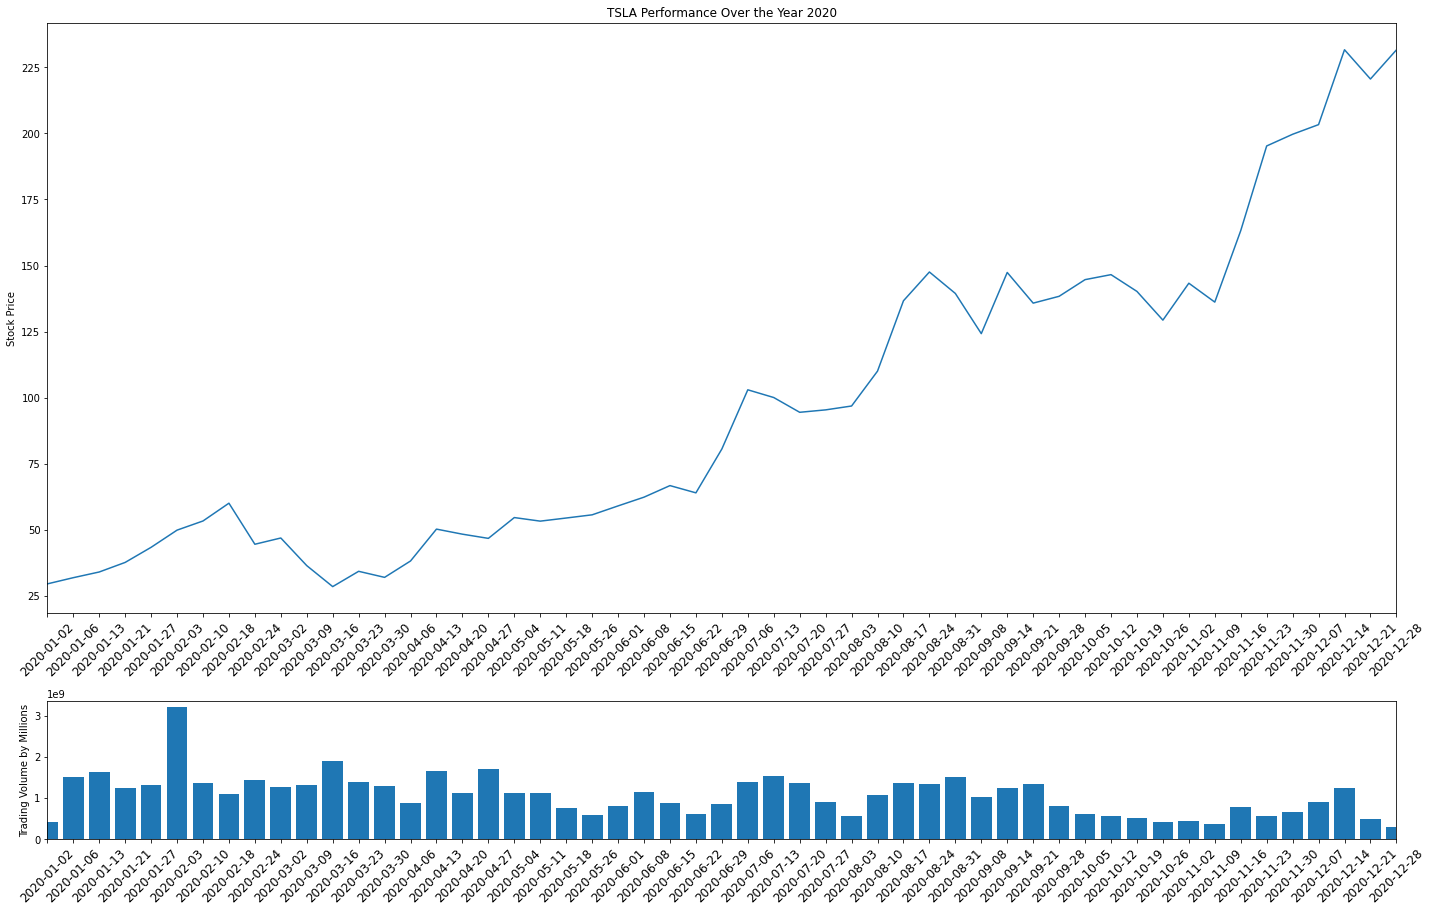

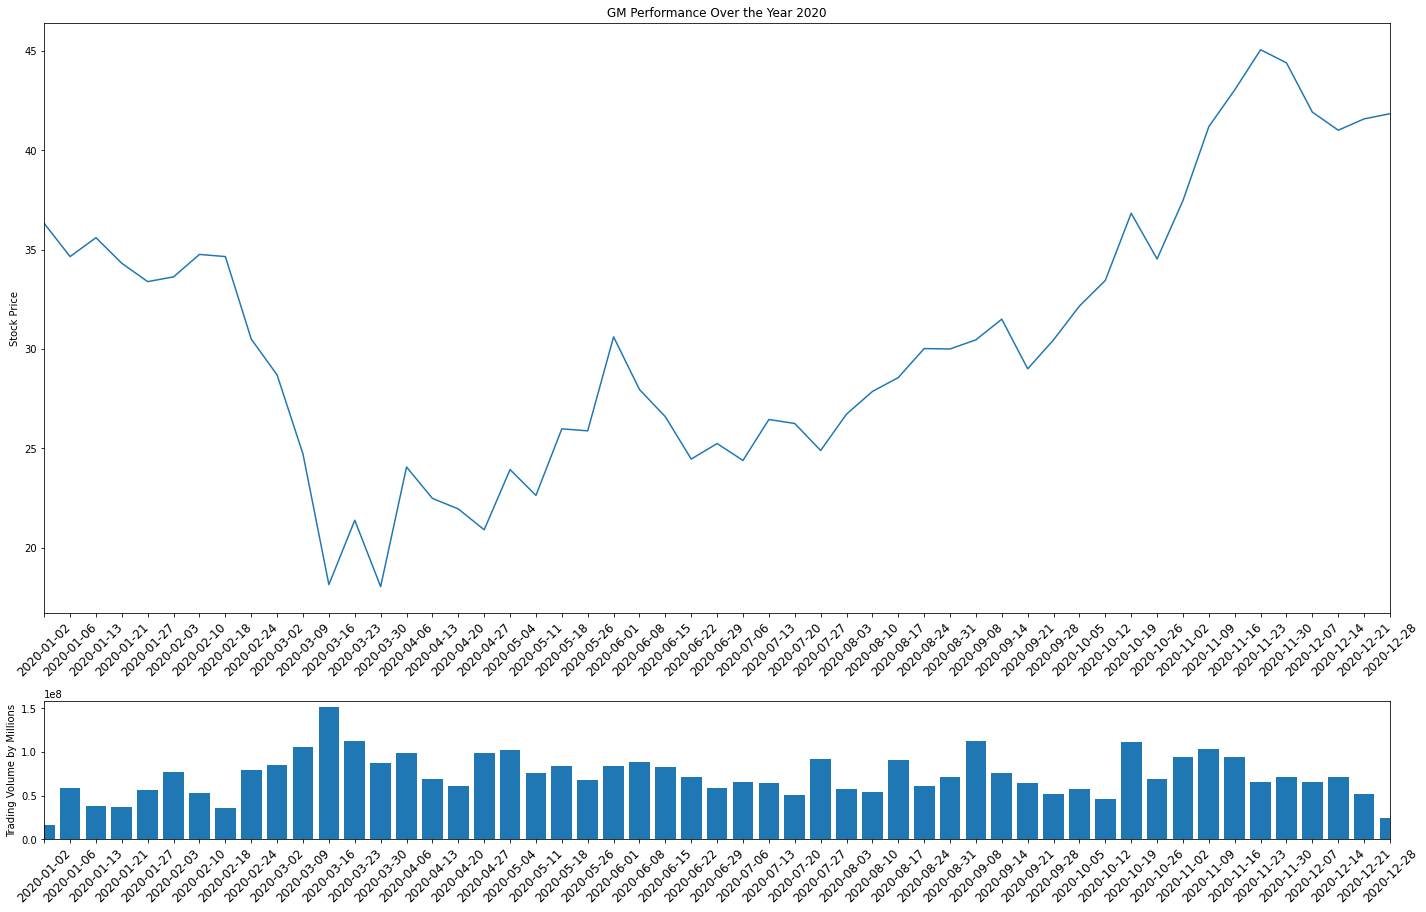

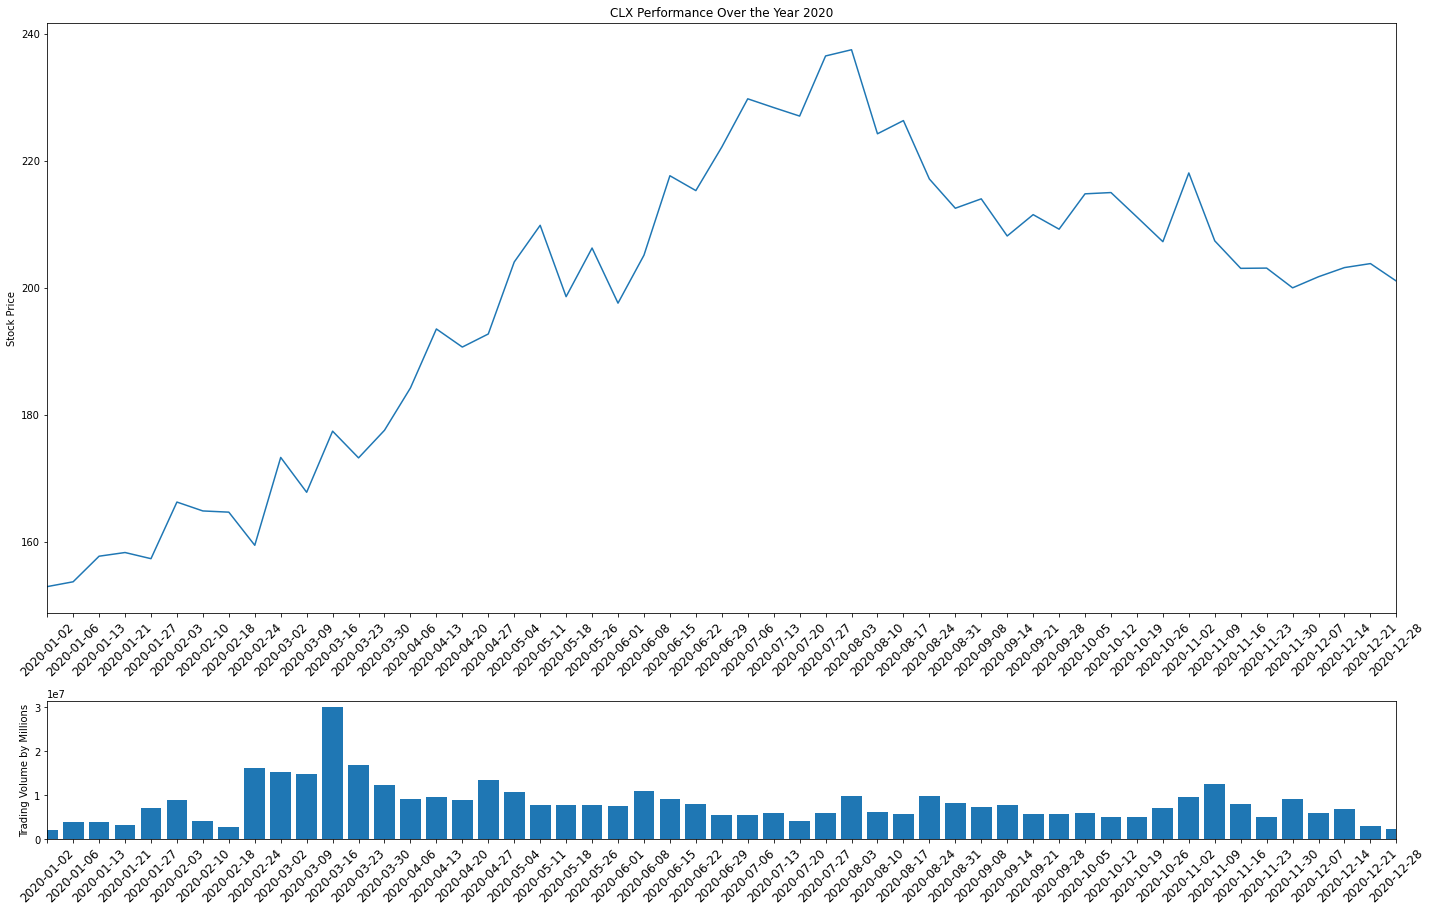

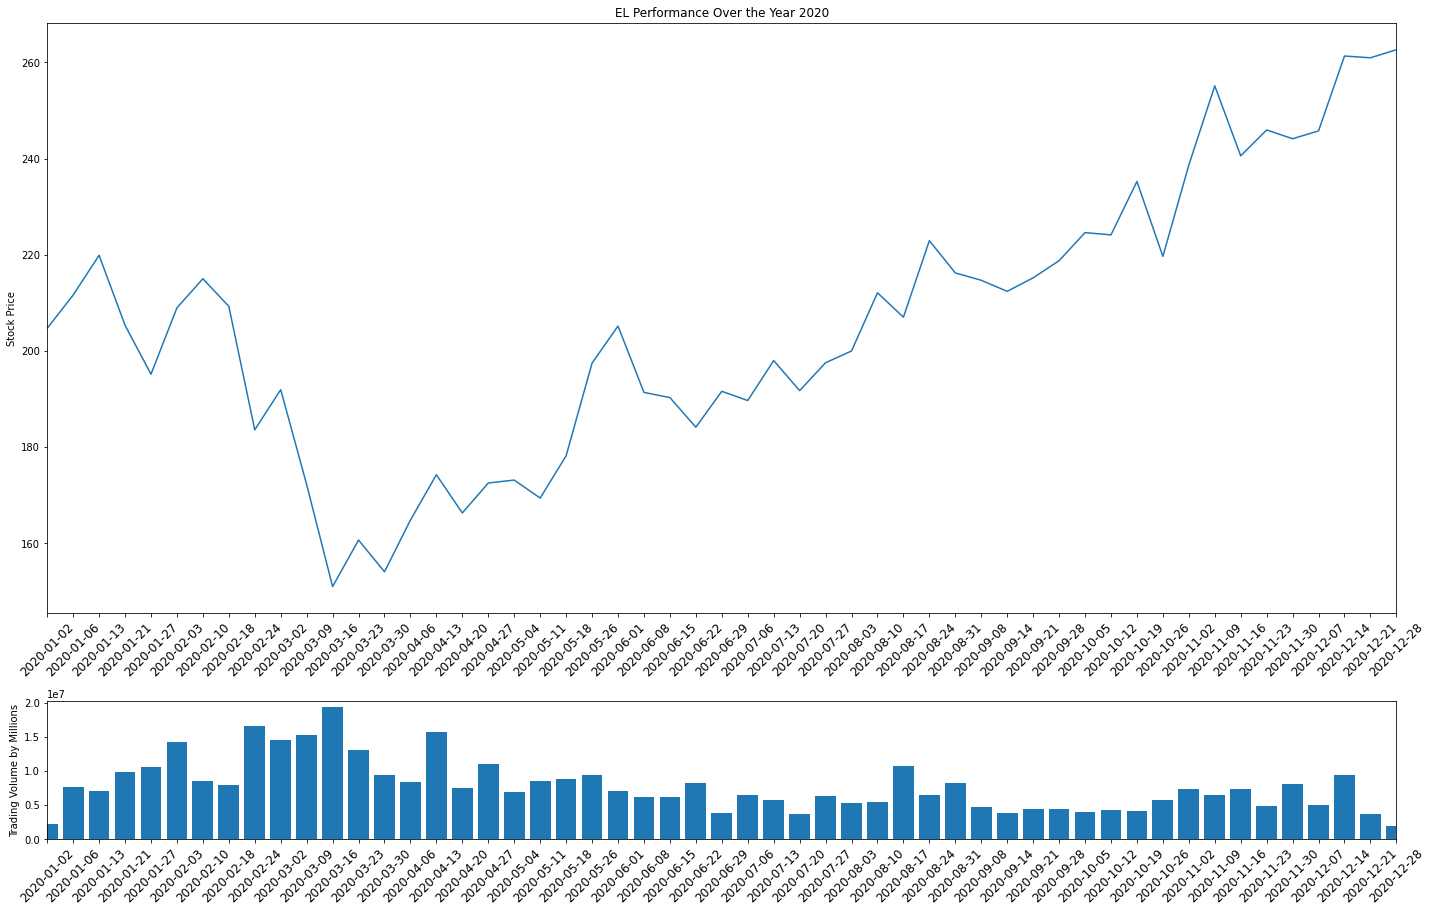

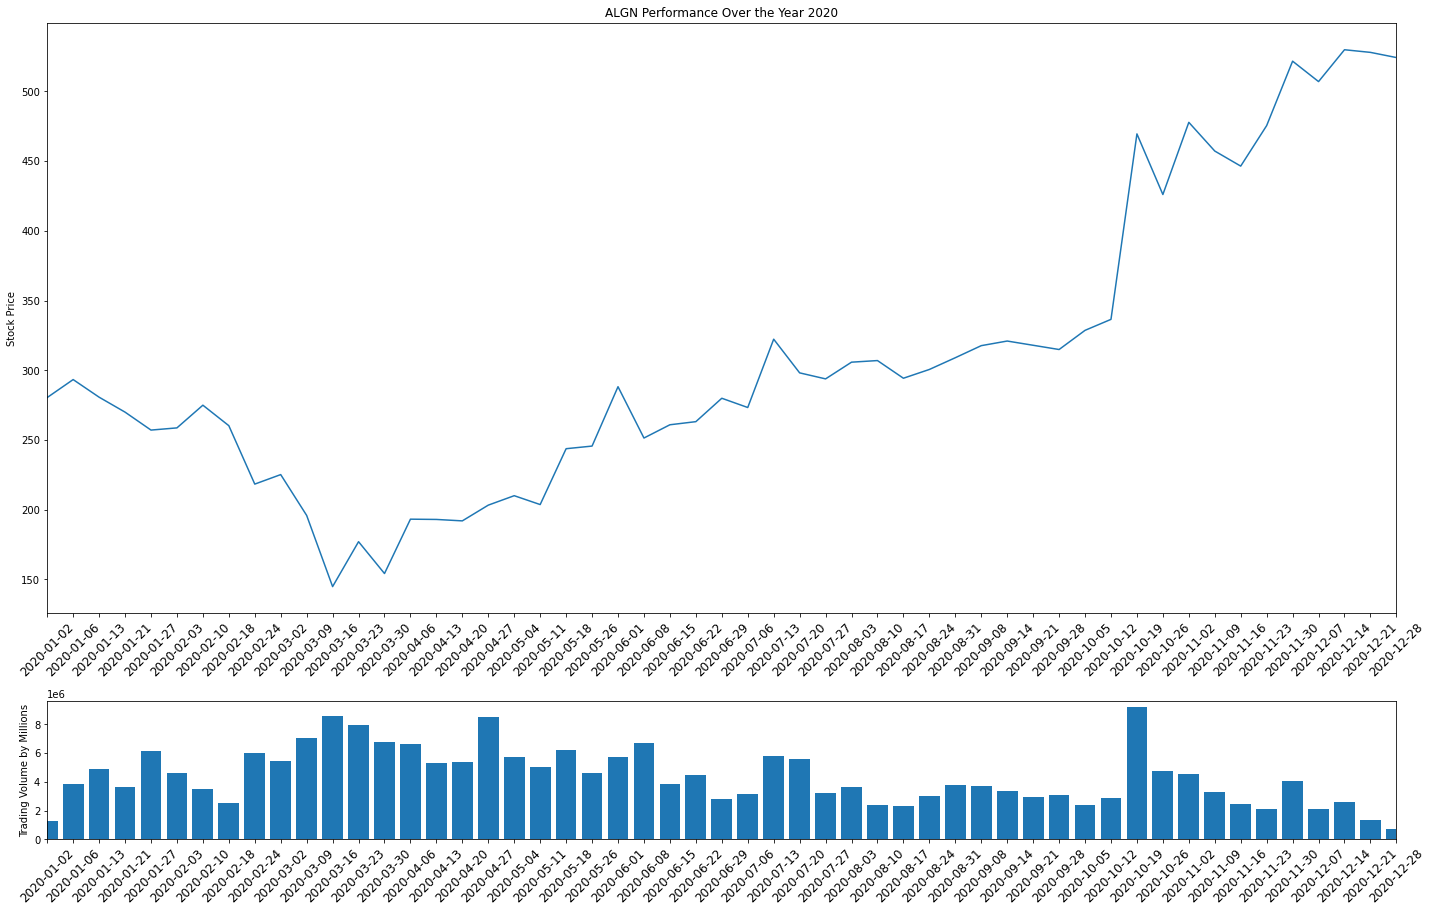

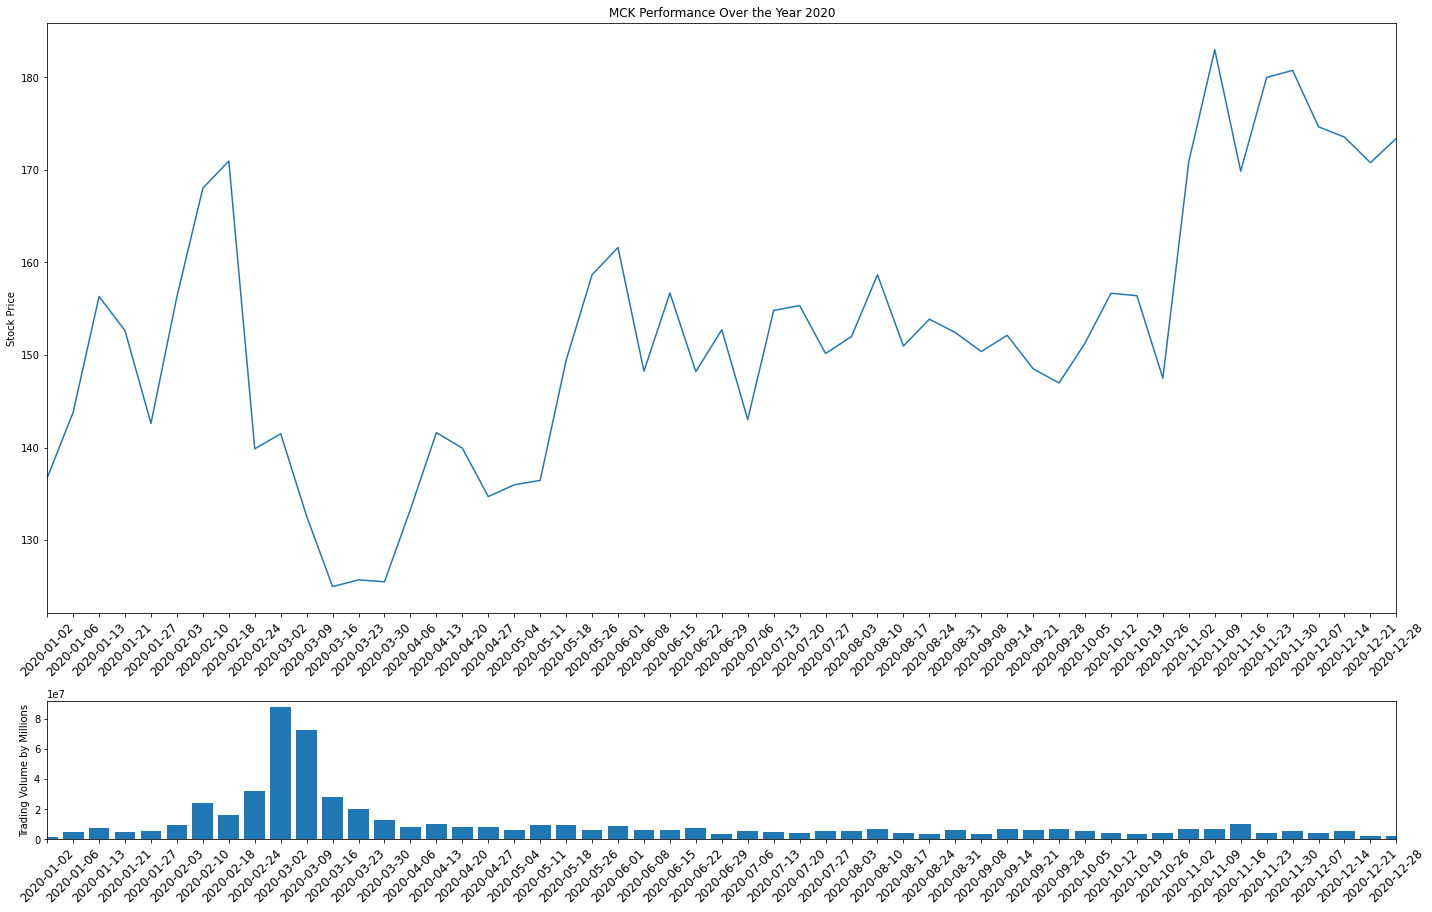

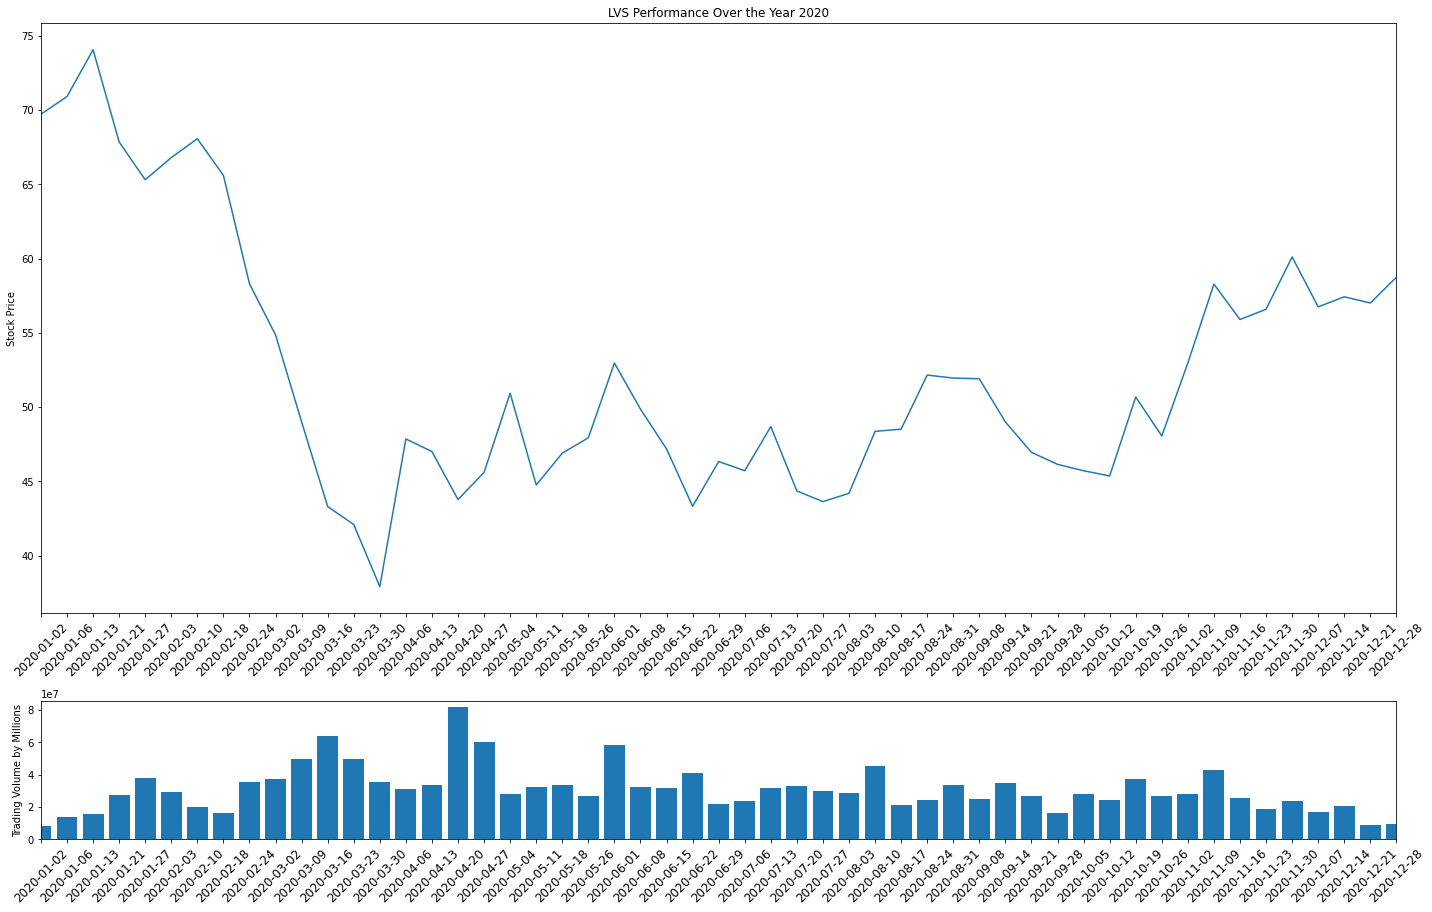

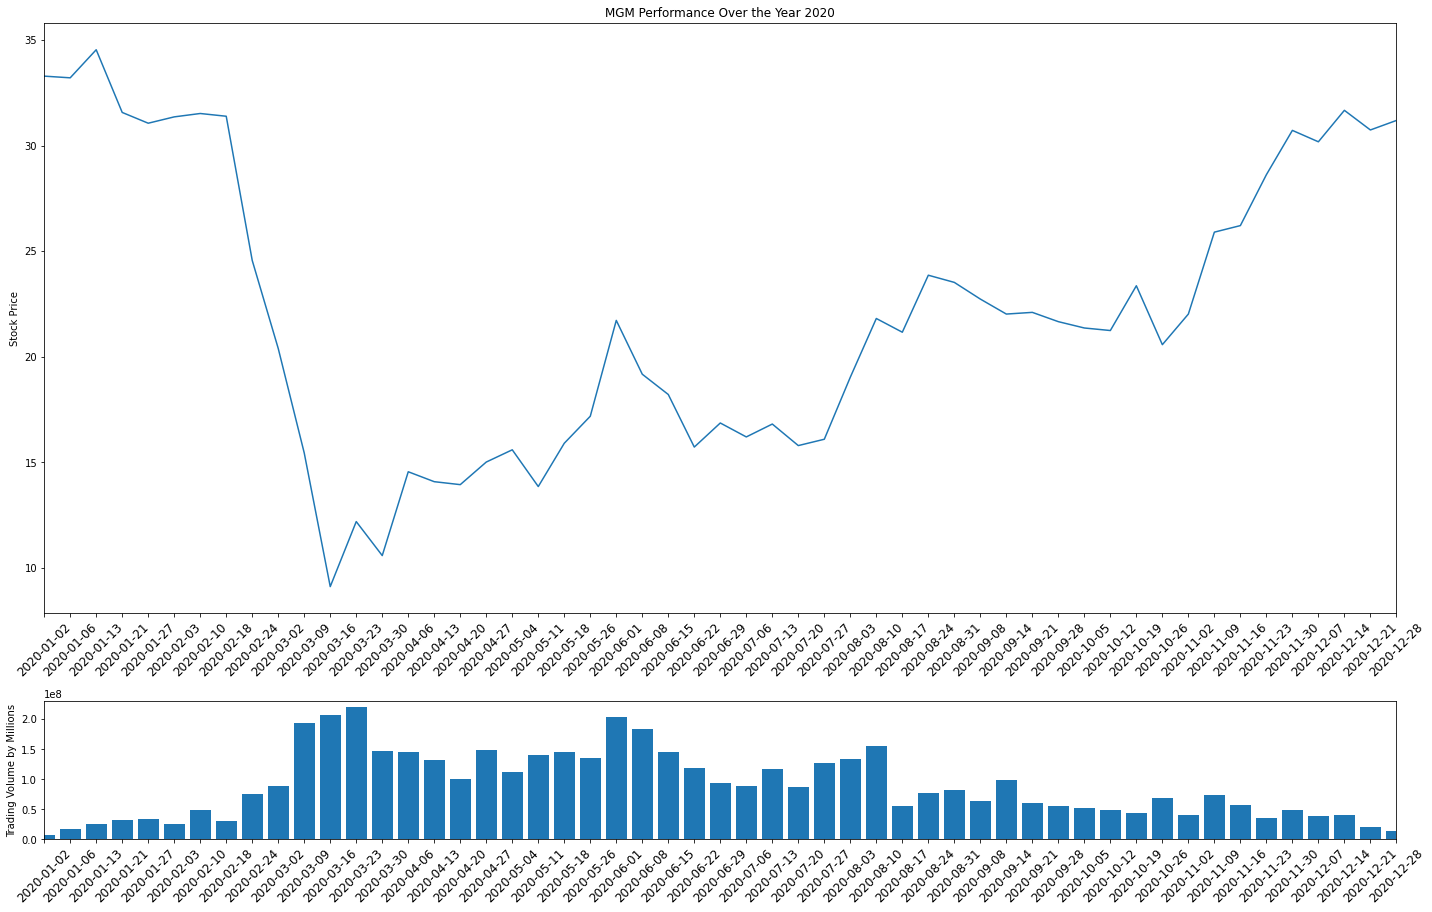

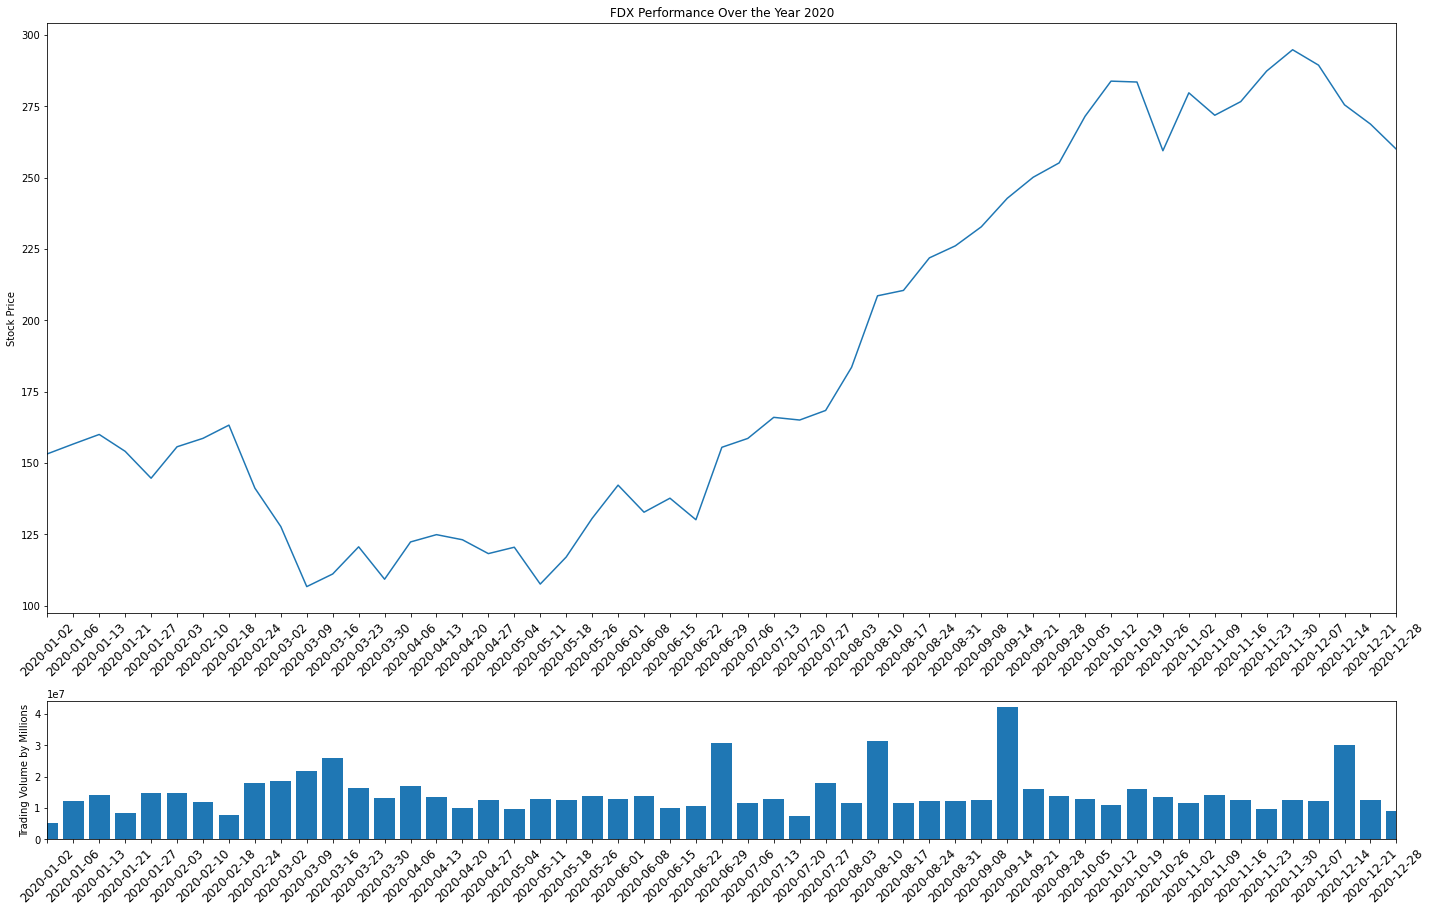

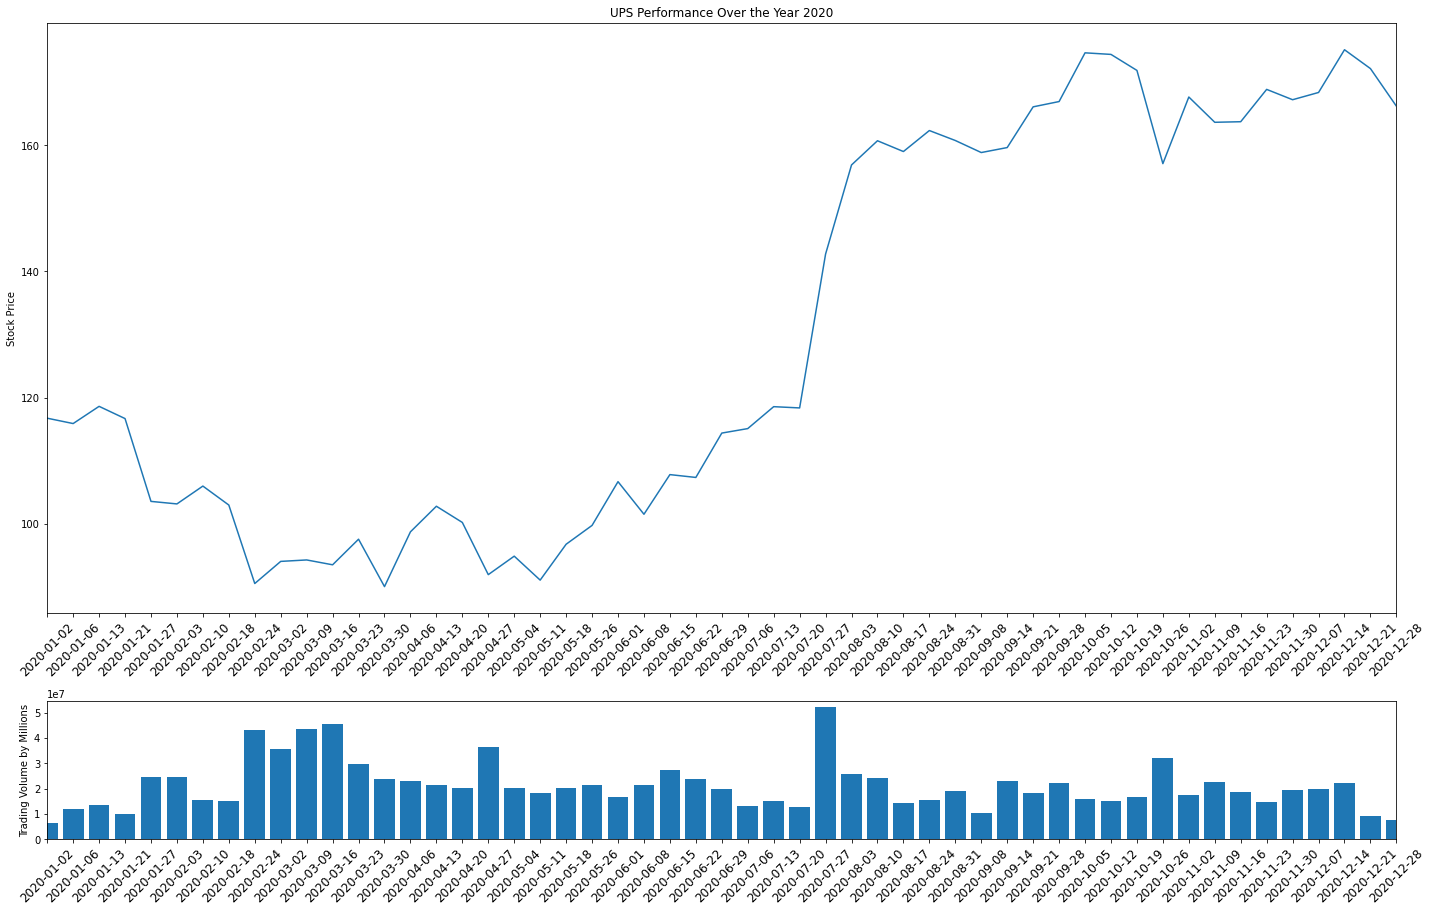

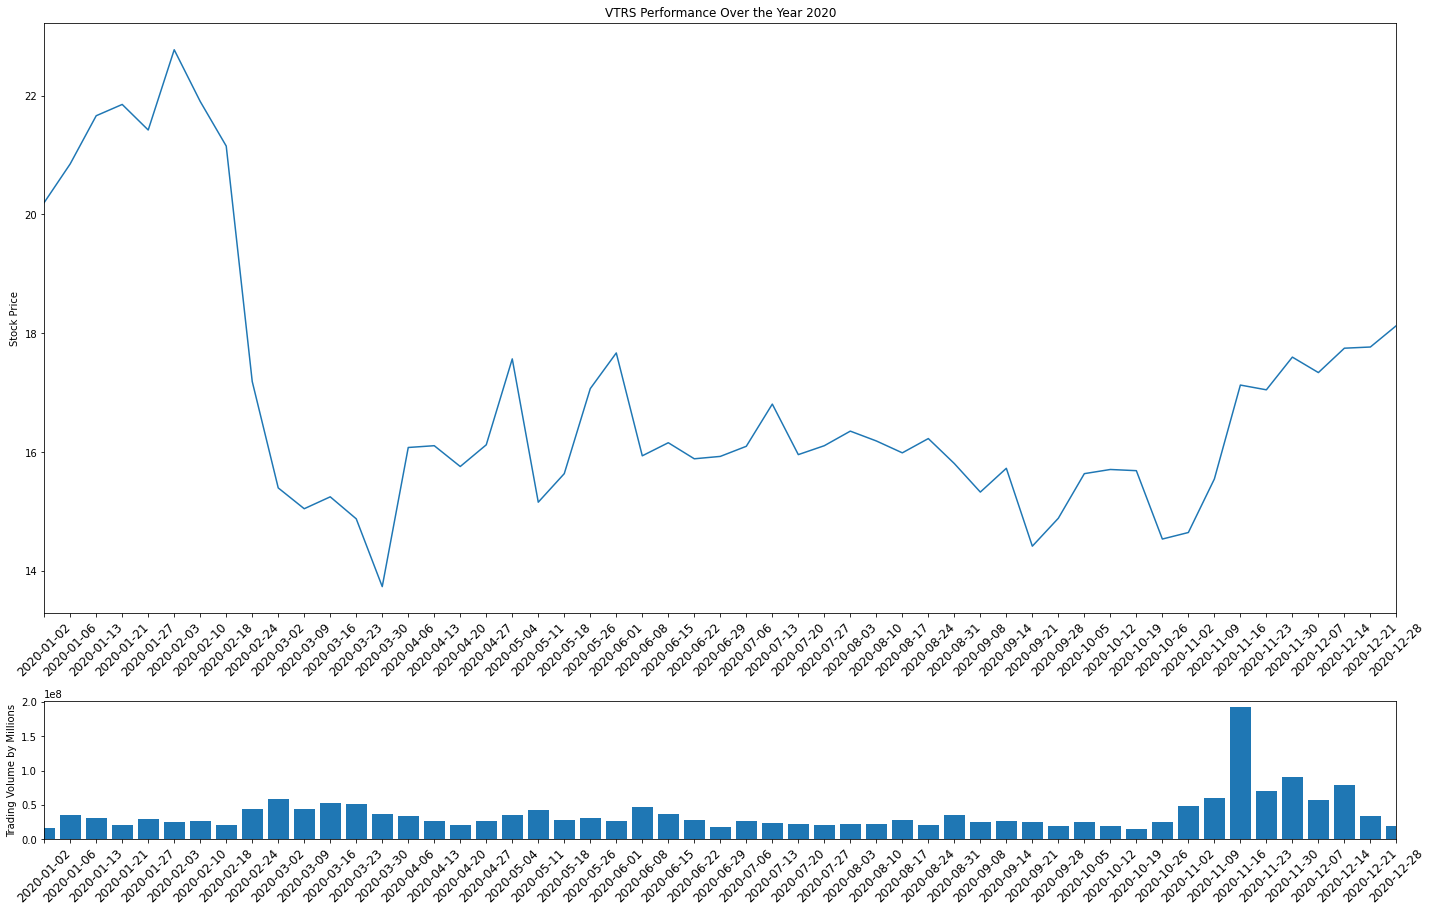

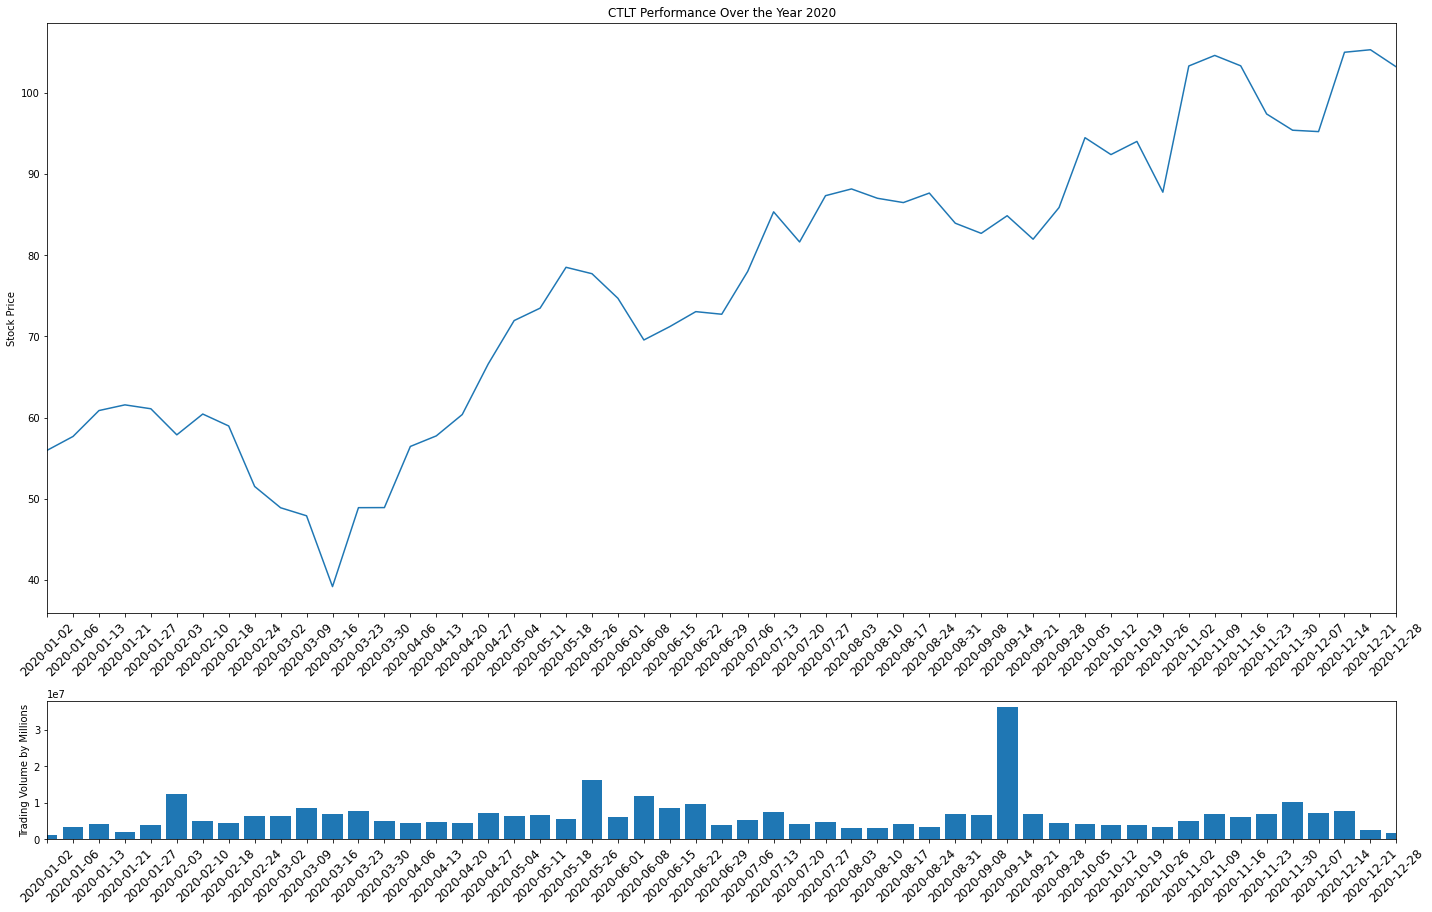

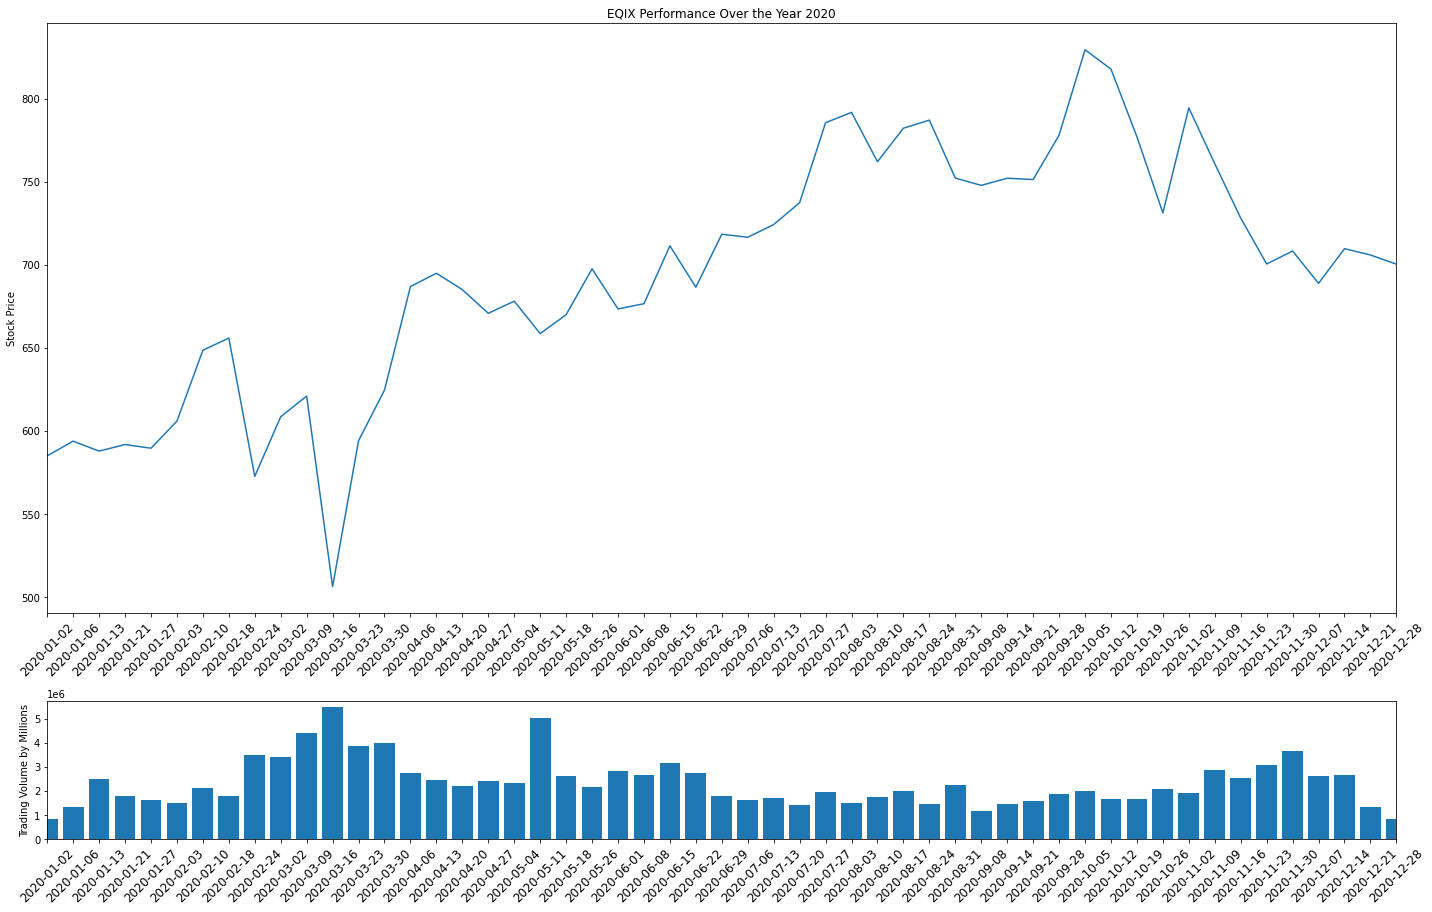

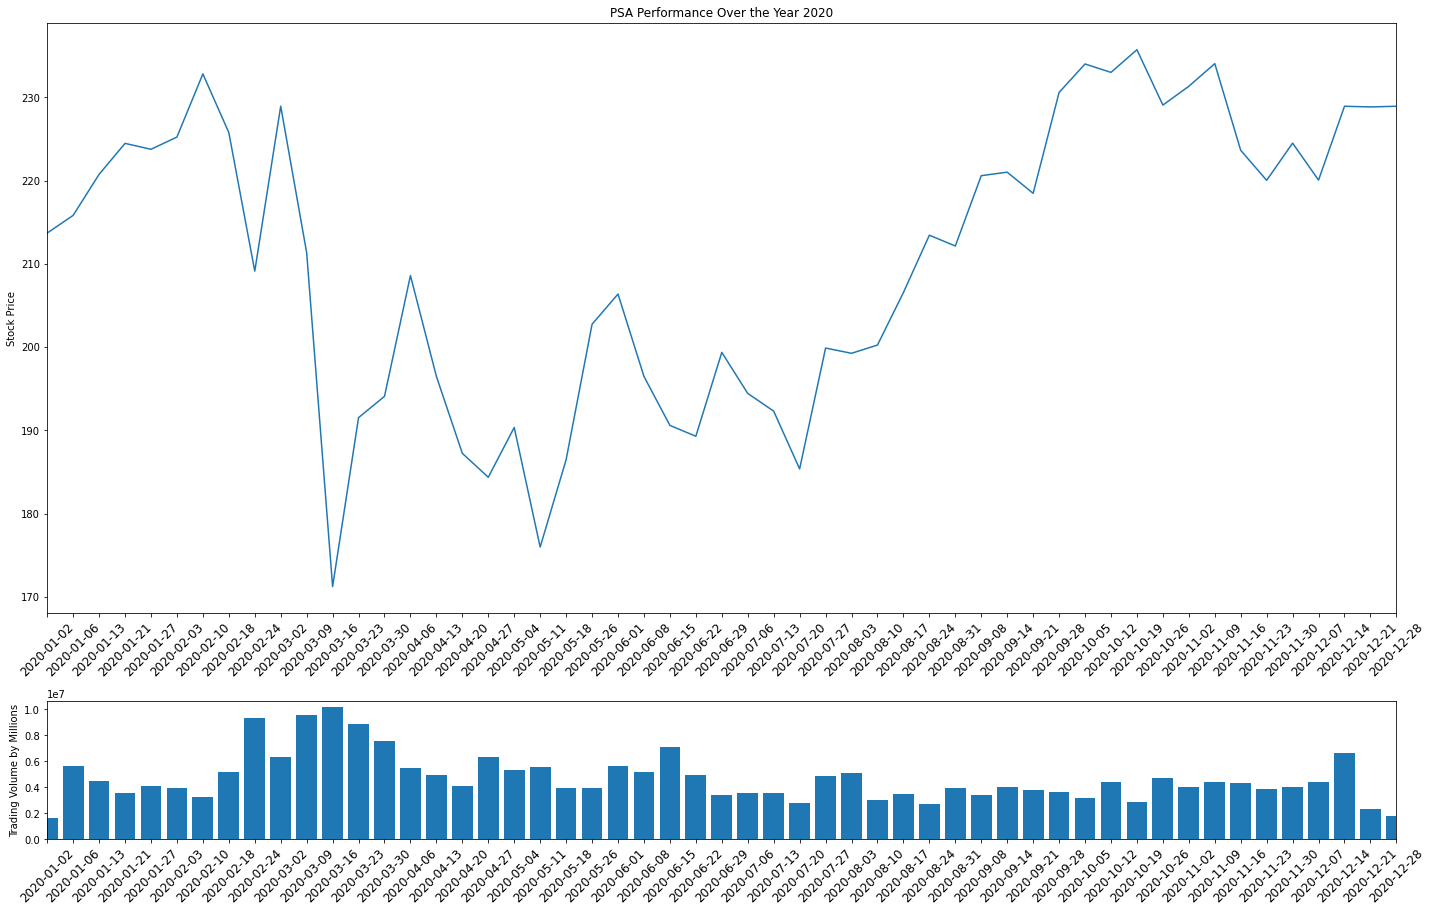

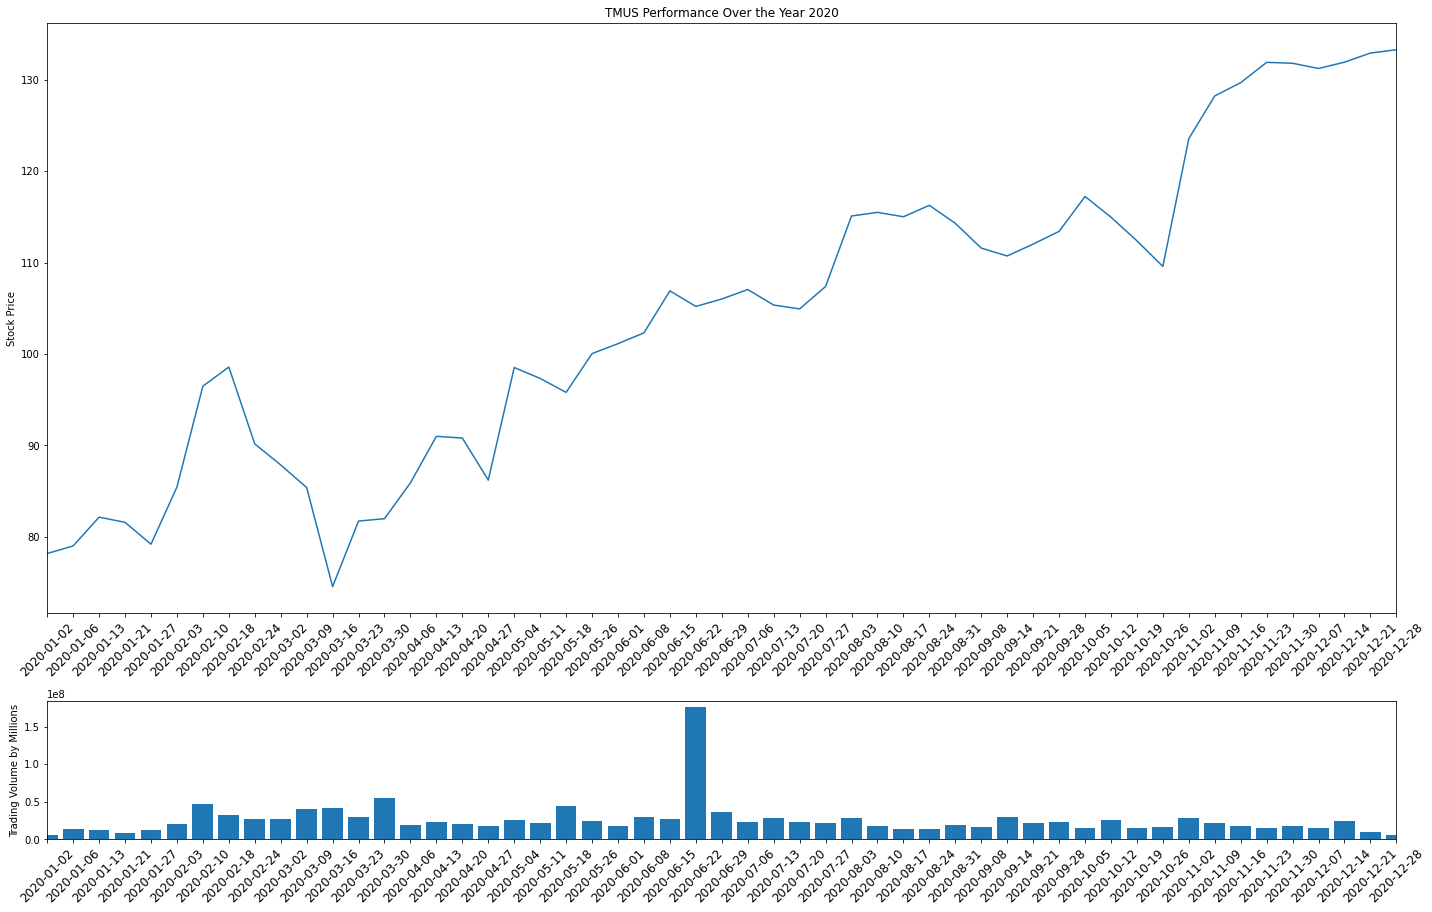

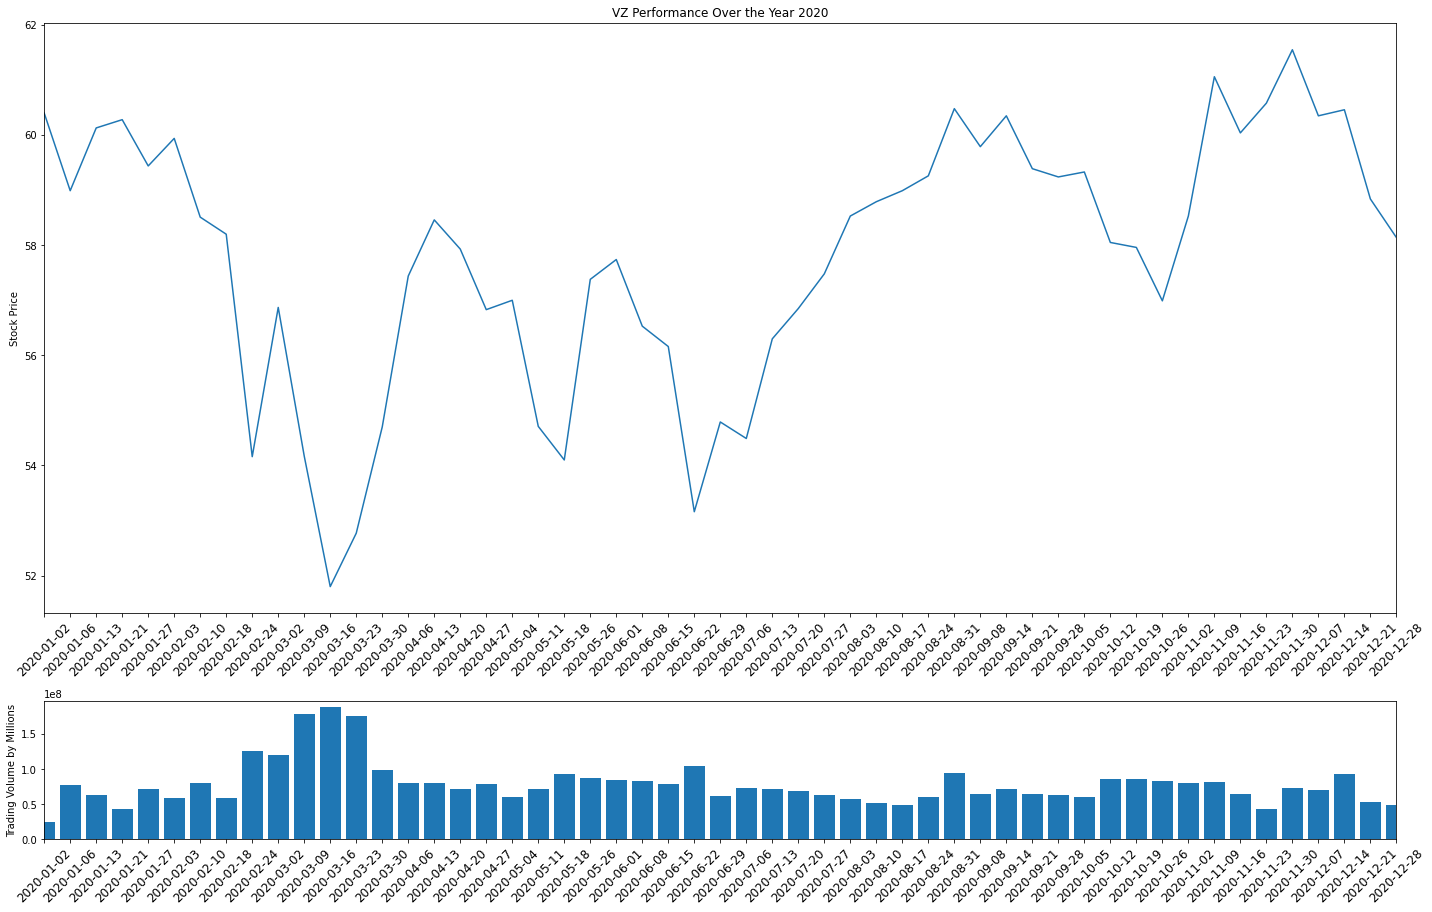

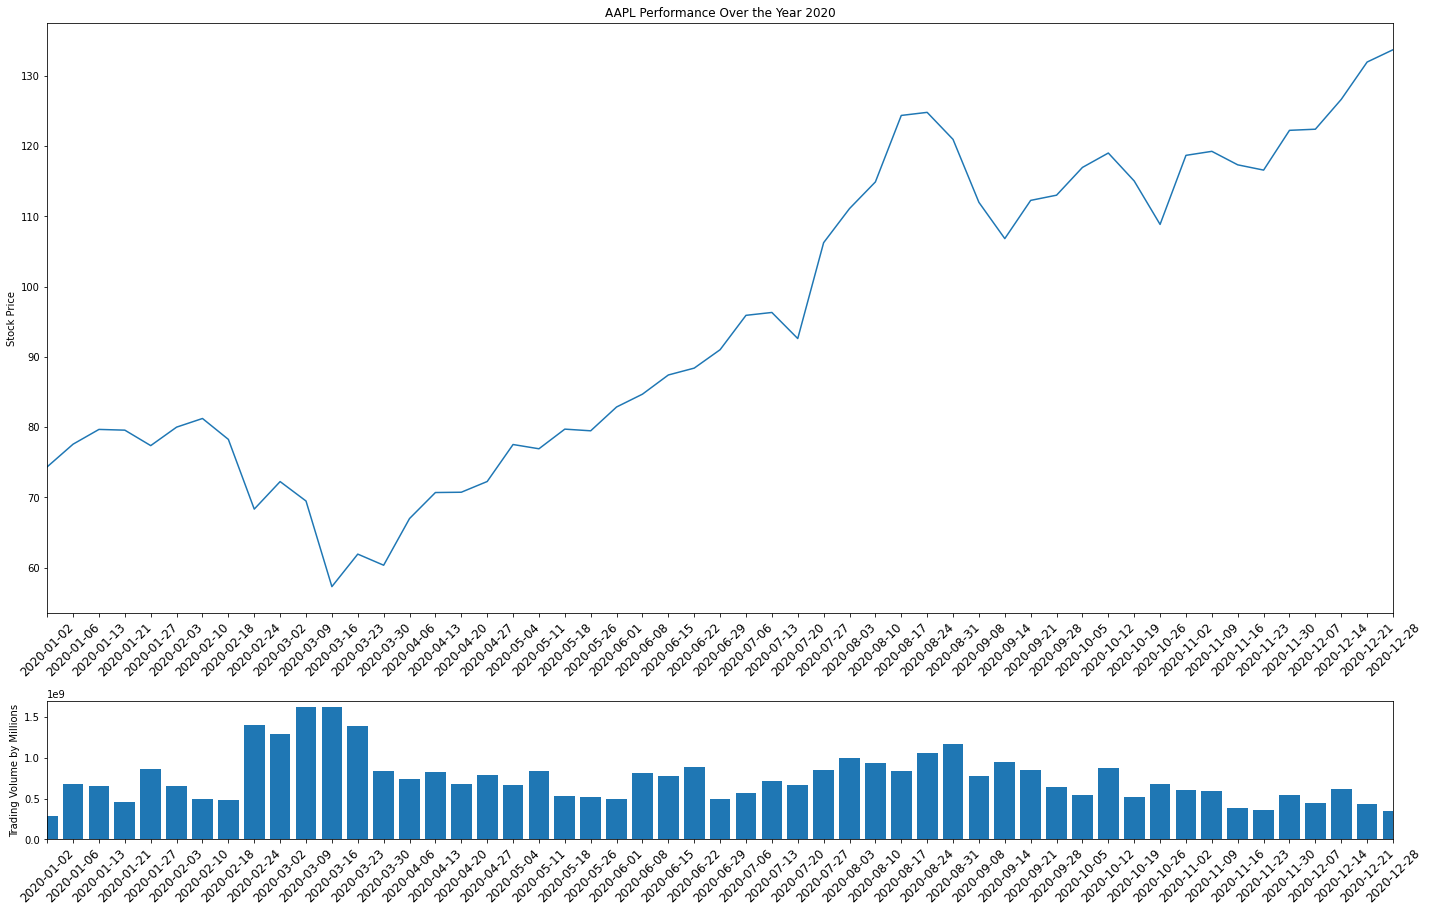

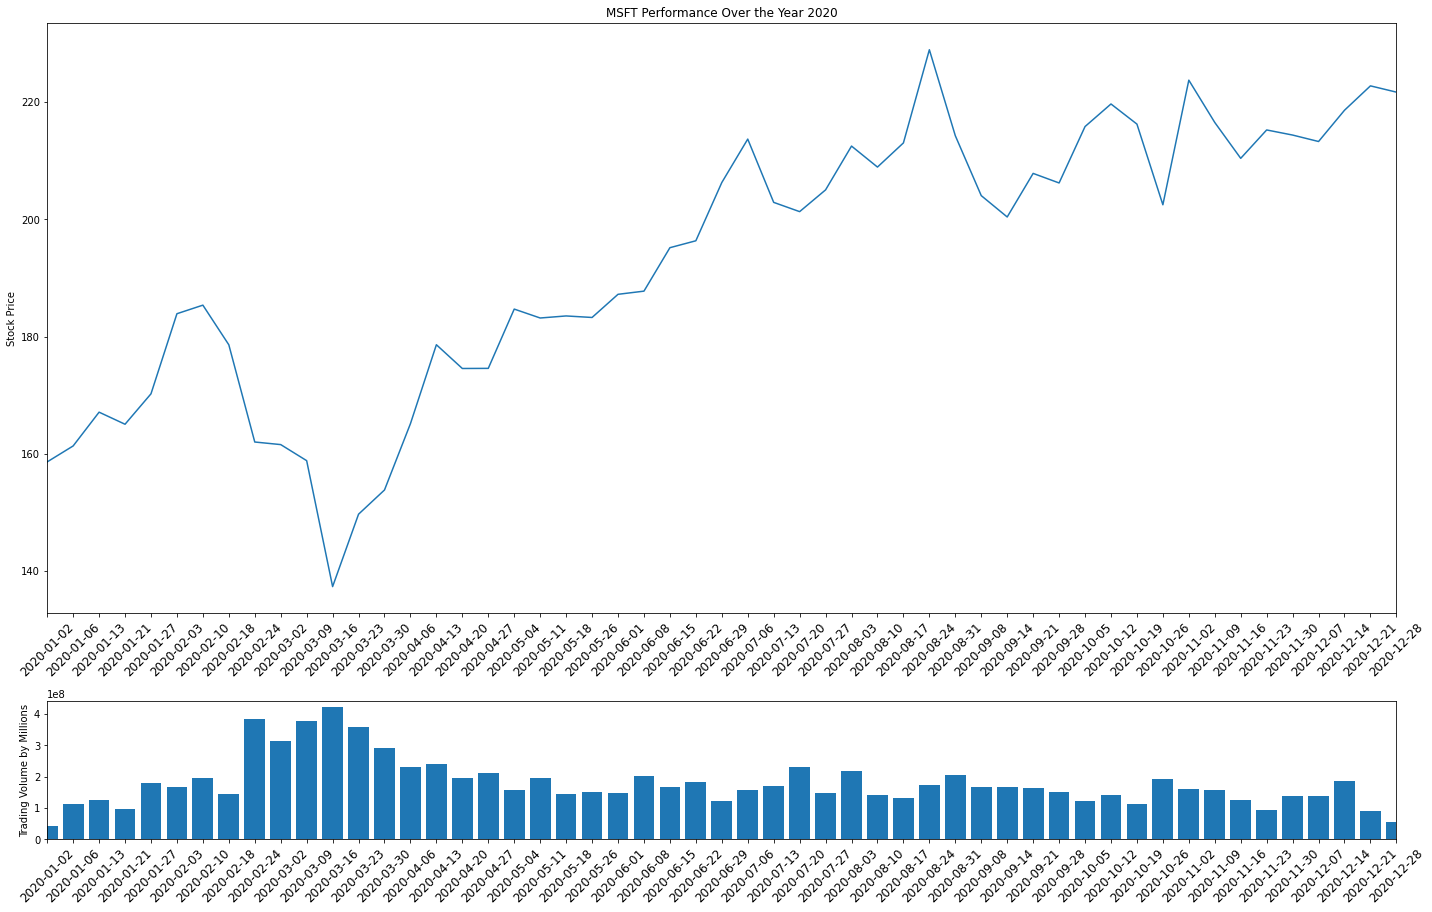

In [7]:
#2020
plot_chart(UAL_2020, 'UAL', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/UAL_2020')
plot_chart(DAL_2020, 'DAL', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/DAL_2020')
plot_chart(TSLA_2020, 'TSLA', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/TSLA_2020')
plot_chart(GM_2020, 'GM', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/GM_2020')
plot_chart(CLX_2020, 'CLX', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/CLX_2020')
plot_chart(EL_2020, 'EL', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/EL_2020')
plot_chart(ALGN_2020, 'ALGN', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/ALGN_2020')
plot_chart(MCK_2020, 'MCK', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/MCK_2020')
plot_chart(LVS_2020, 'LVS', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/LVS_2020')
plot_chart(MGM_2020, 'MGM', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/MGM_2020')
plot_chart(FDX_2020, 'FDX', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/FDX_2020')
plot_chart(UPS_2020, 'UPS', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/UPS_2020')
plot_chart(VTRS_2020, 'VTRS', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/VTRS_2020')
plot_chart(CTLT_2020, 'CTLT', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/CTLT_2020')
plot_chart(EQIX_2020, 'EQIX', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/EQIX_2020')
plot_chart(PSA_2020, 'PSA', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/PSA_2020')
plot_chart(TMUS_2020, 'TMUS', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/TMUS_2020')
plot_chart(VZ_2020, 'VZ', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/VZ_2020')
plot_chart(AAPL_2020, 'AAPL', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/AAPL_2020')
plot_chart(MSFT_2020, 'MSFT', 2020)
plt.savefig('Plotted_Images/2020_ticker_performance/MSFT_2020')

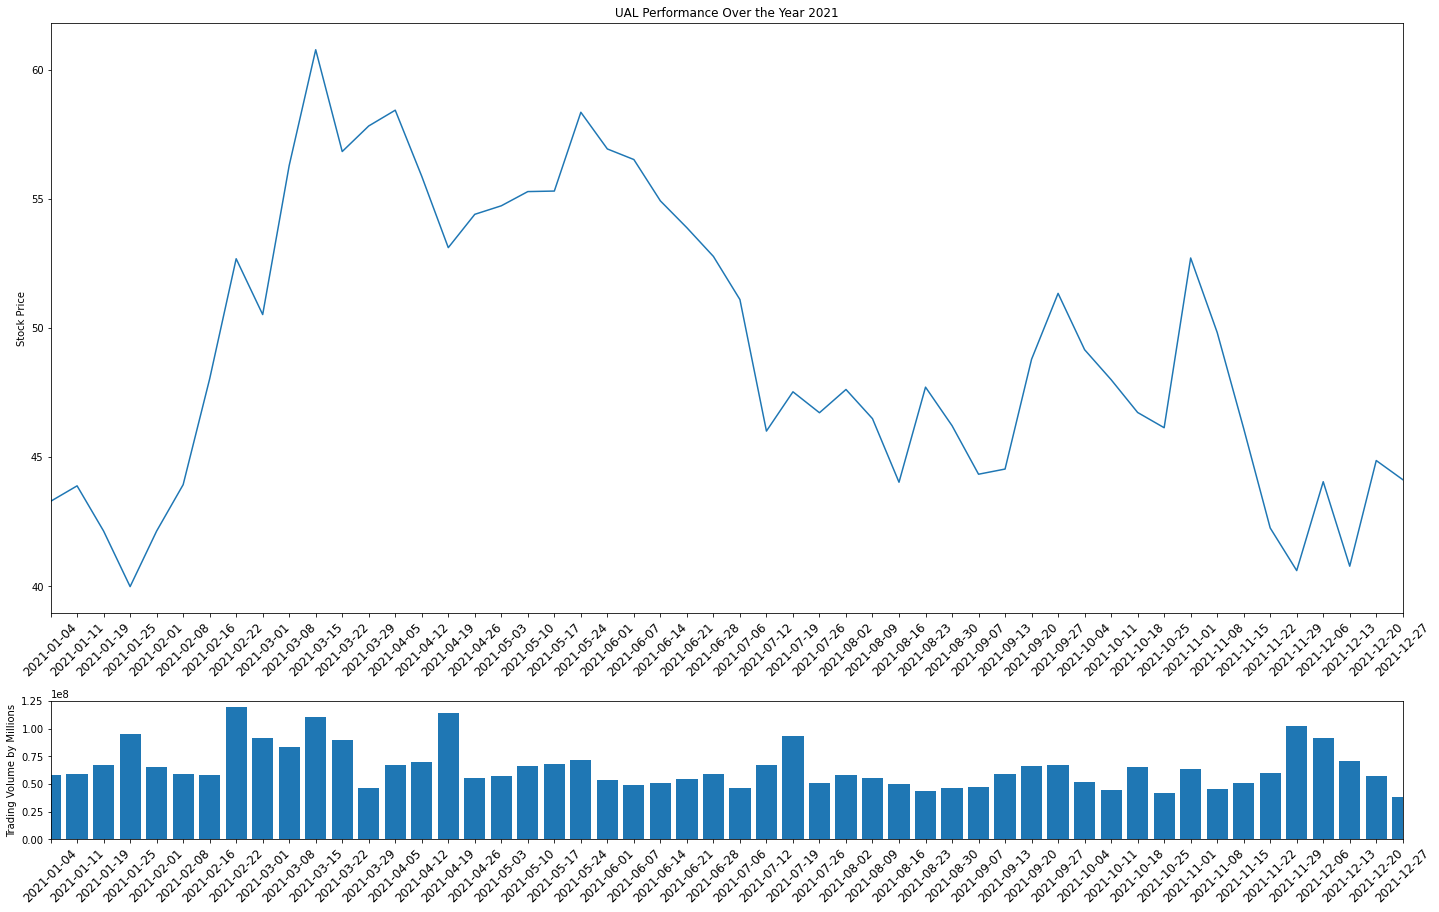

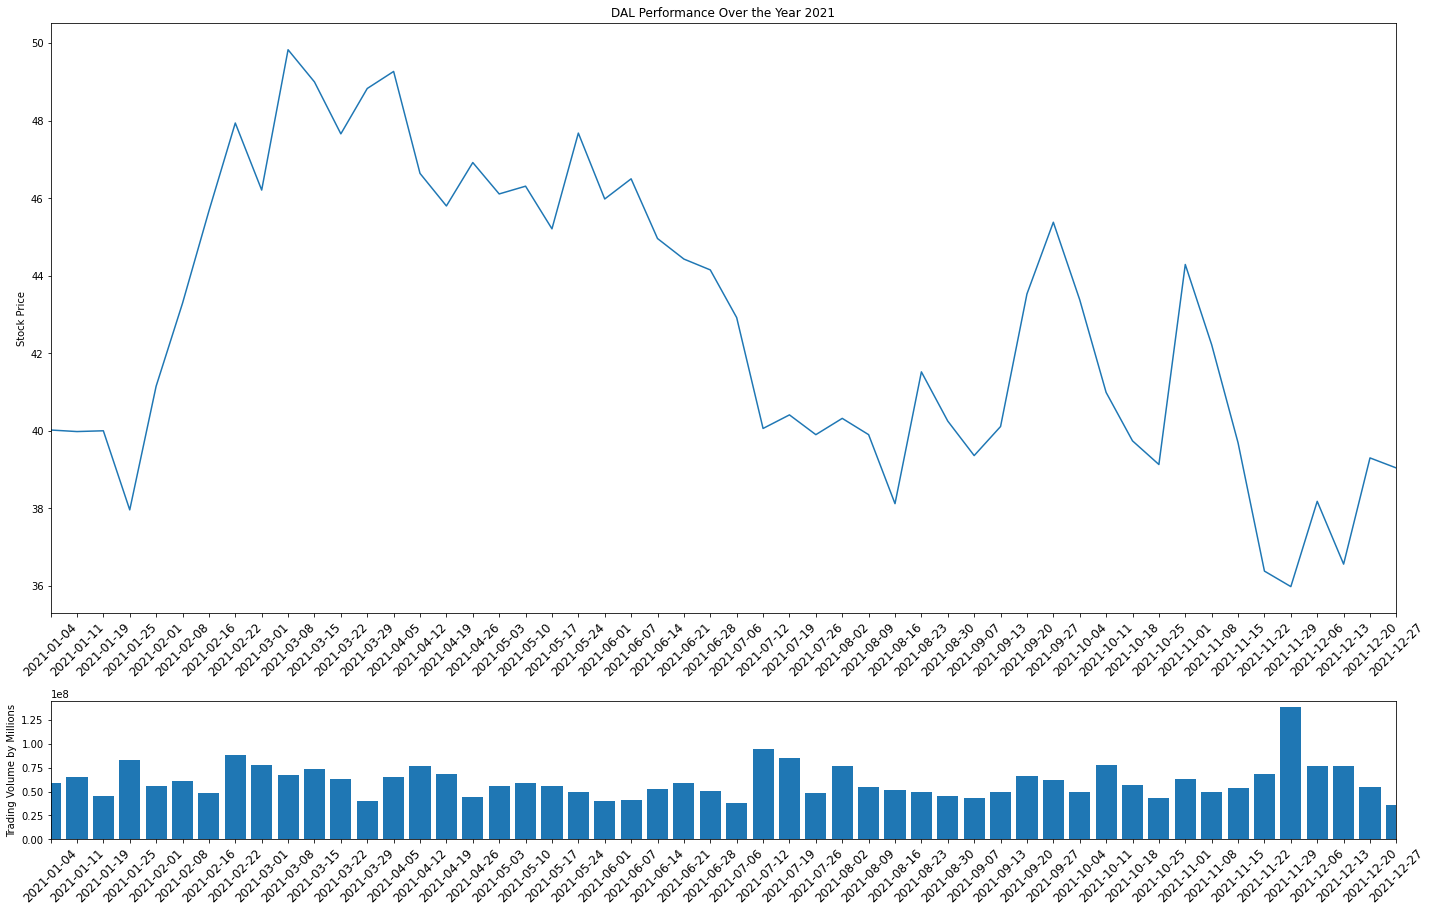

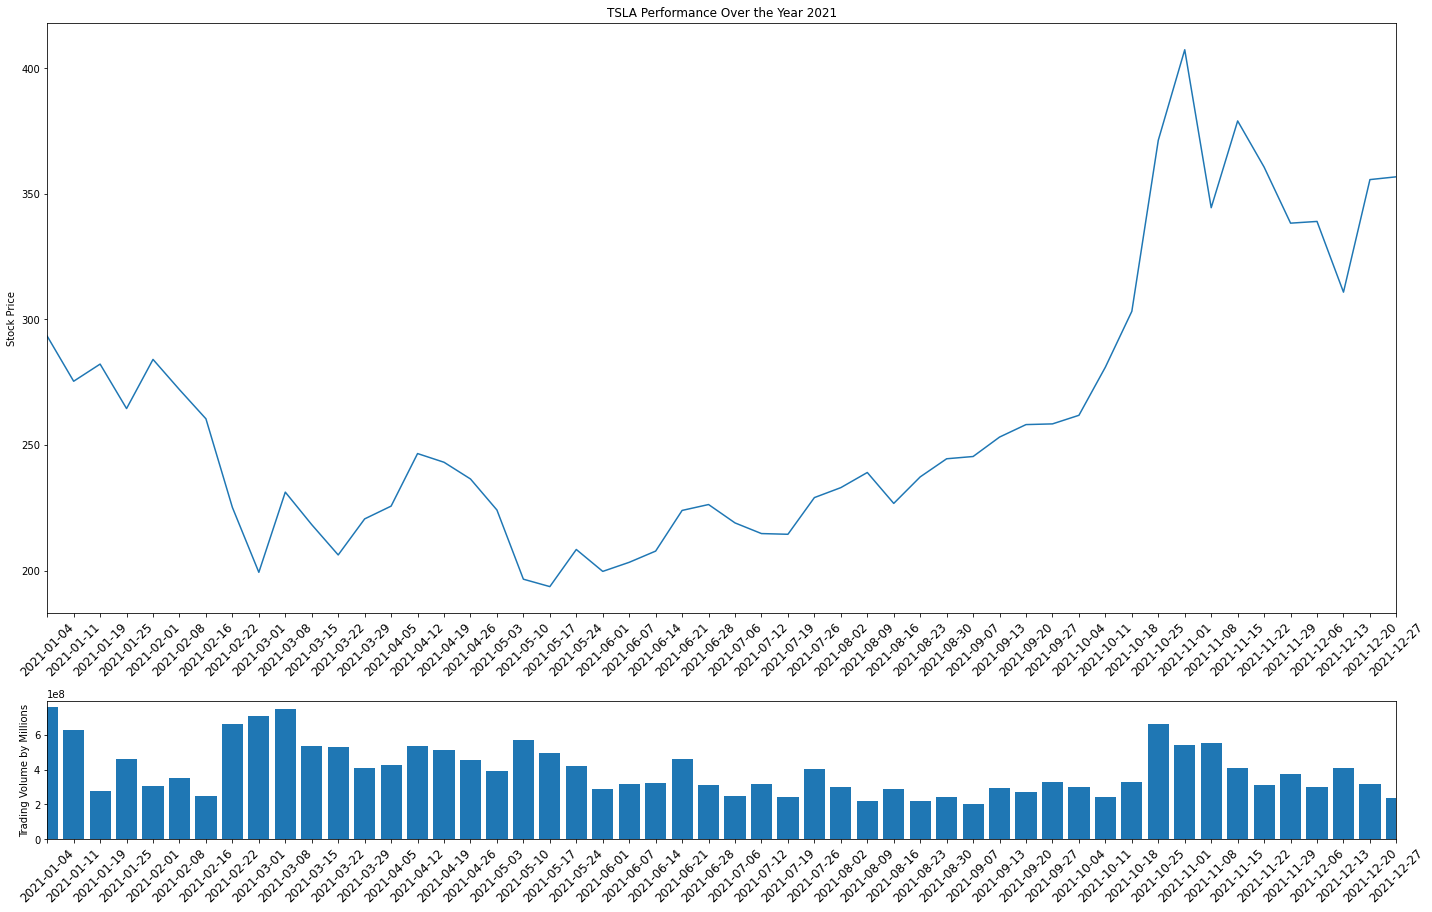

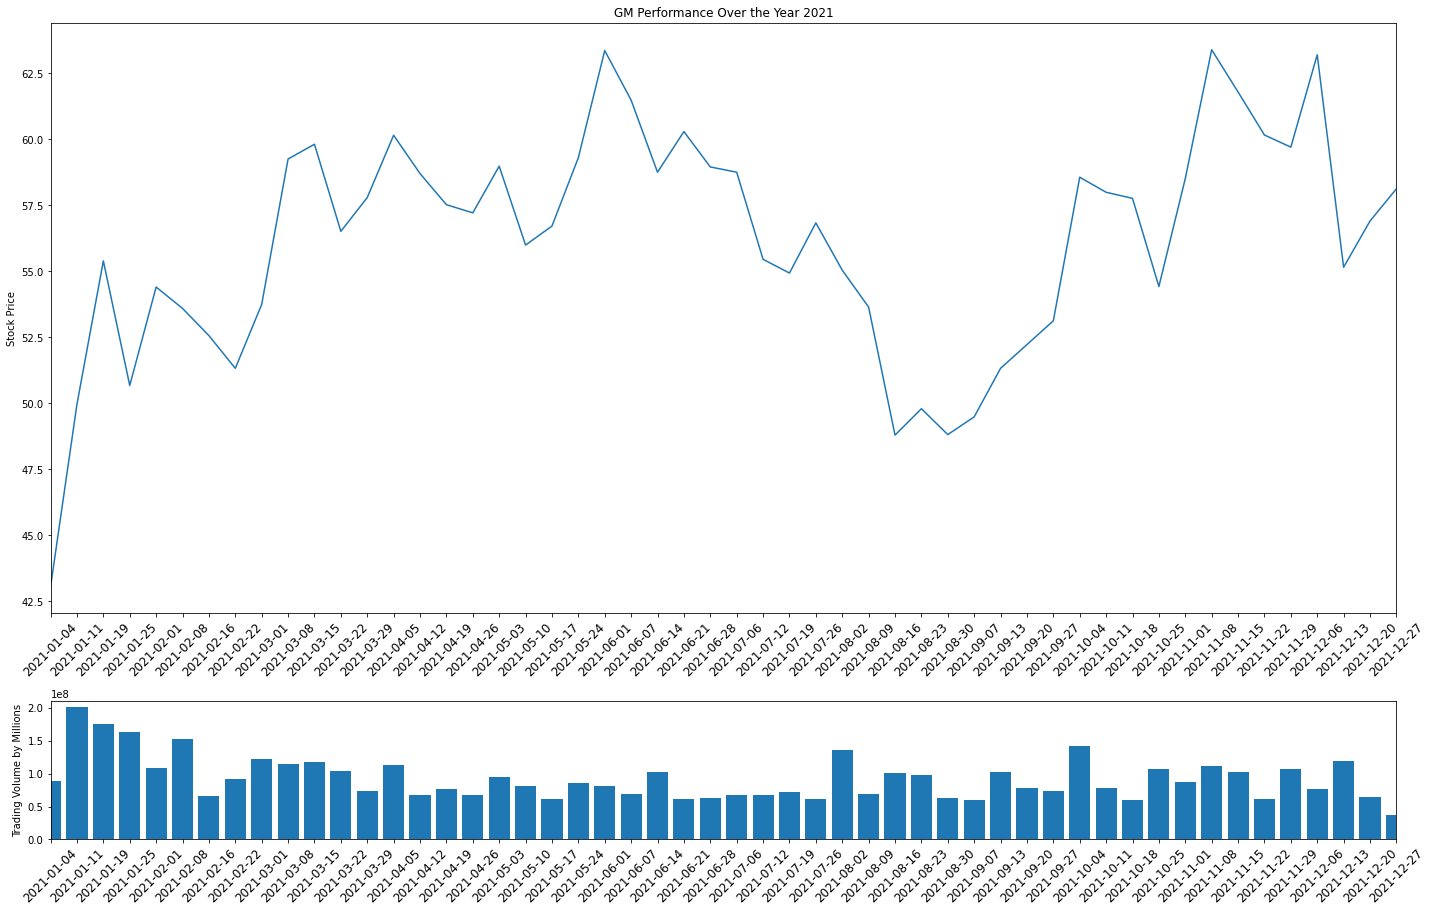

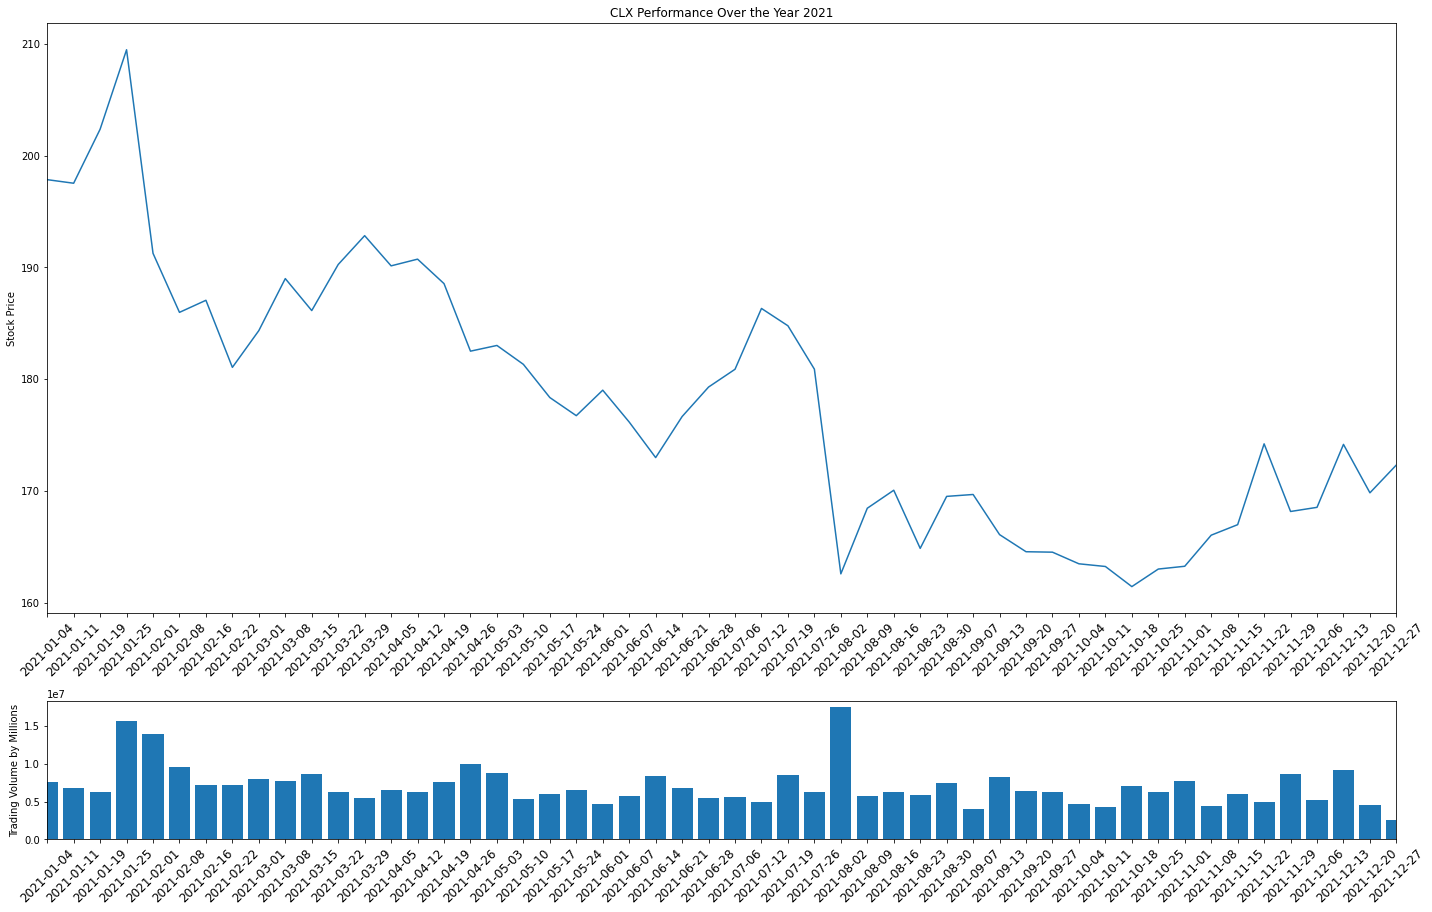

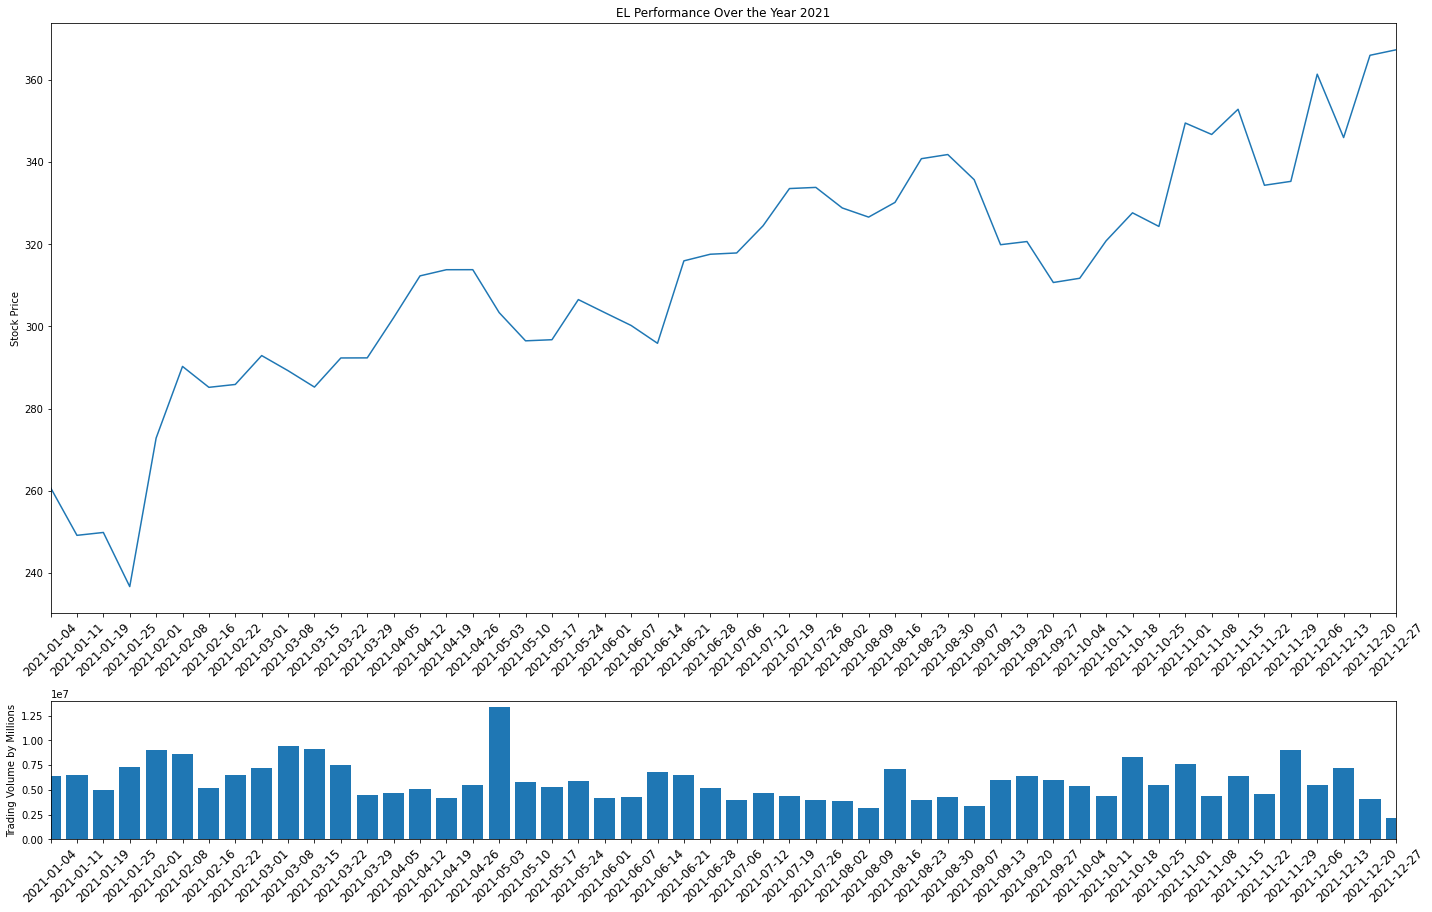

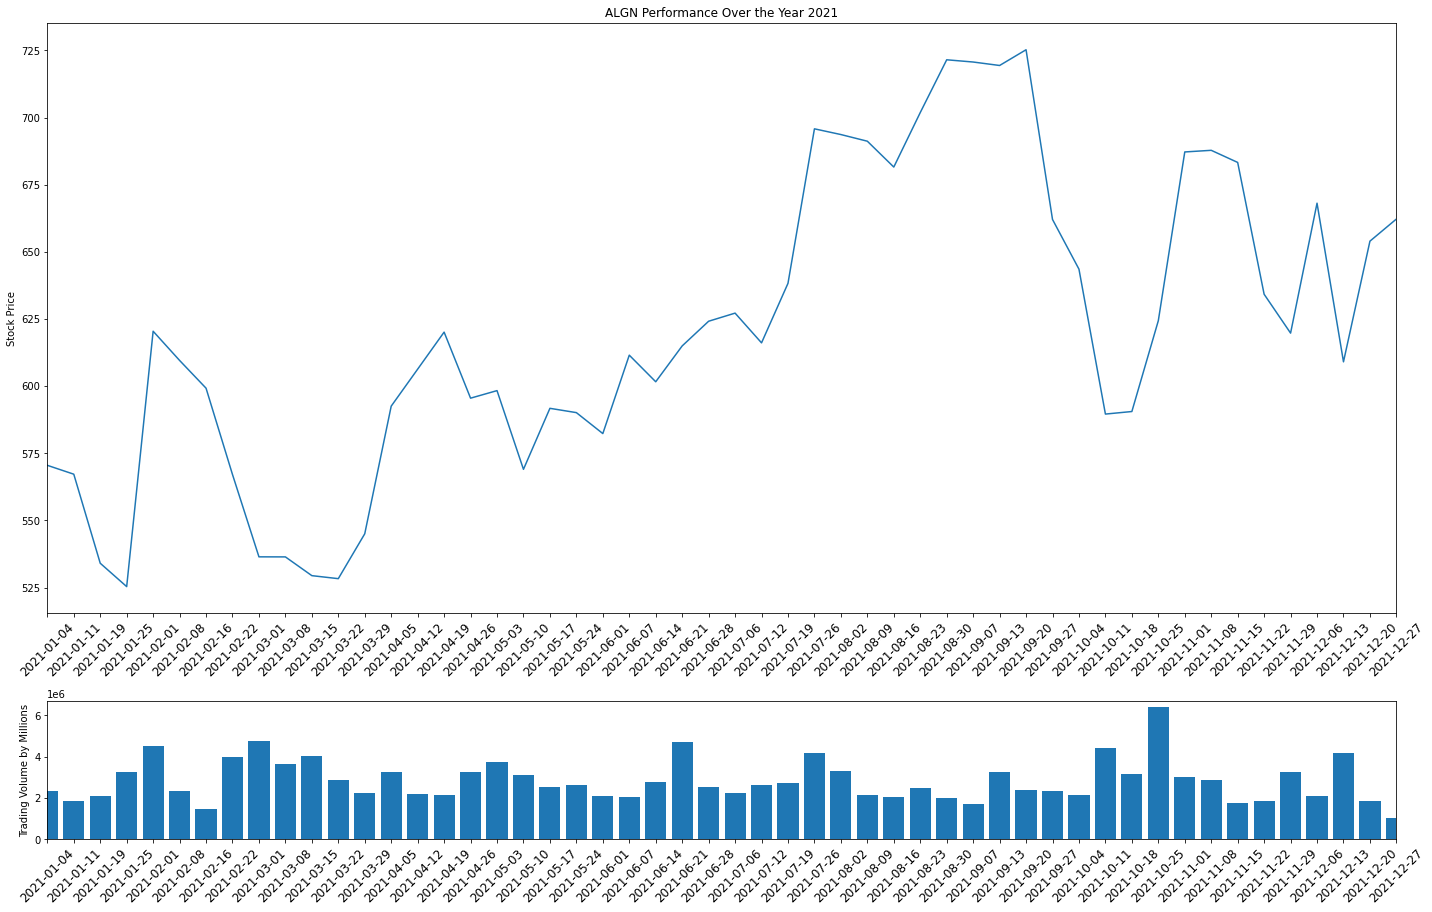

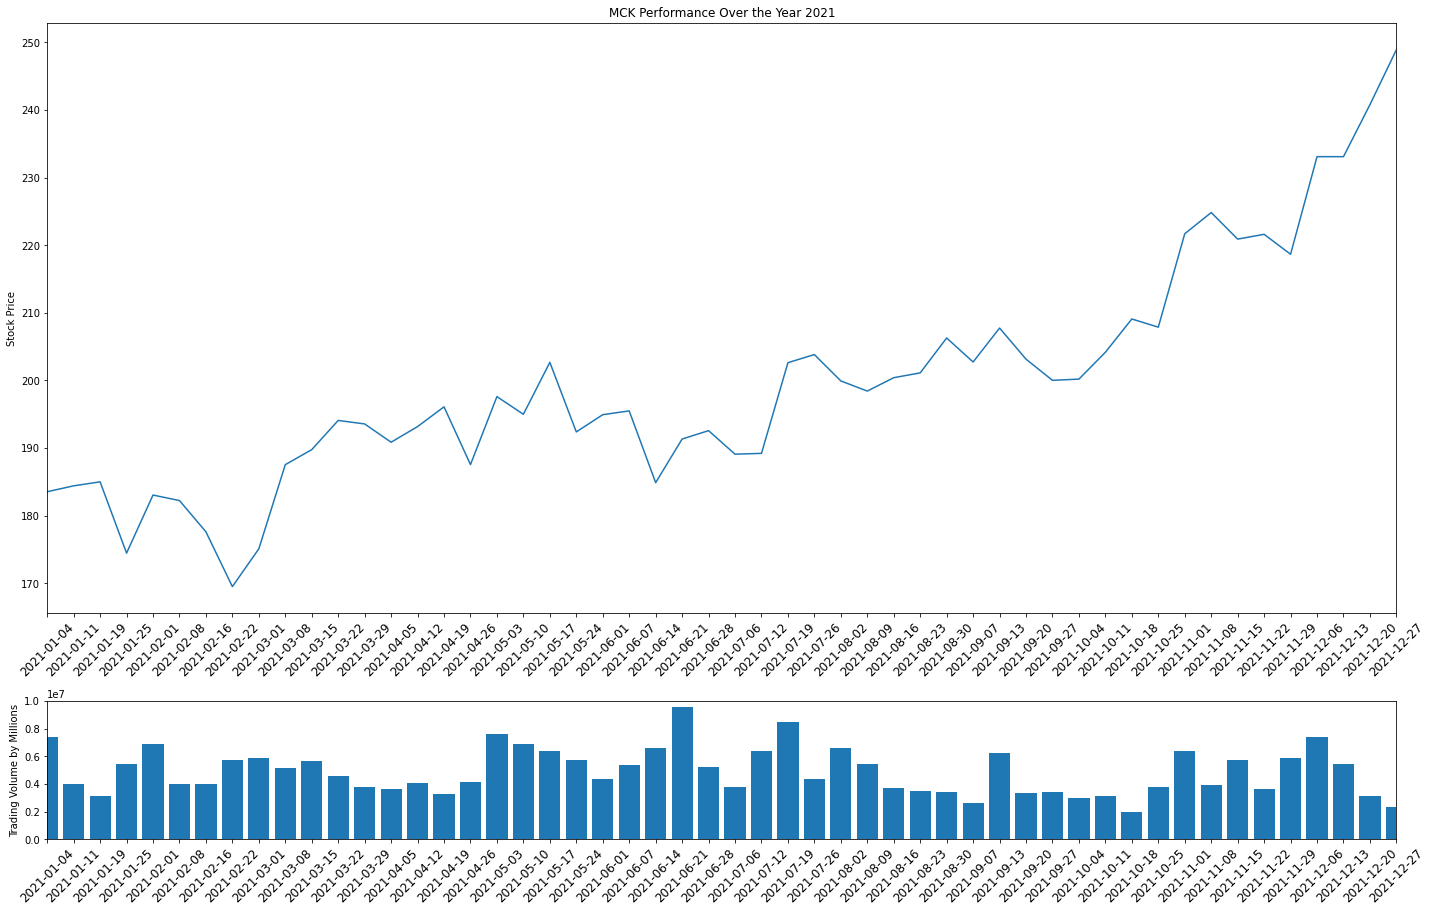

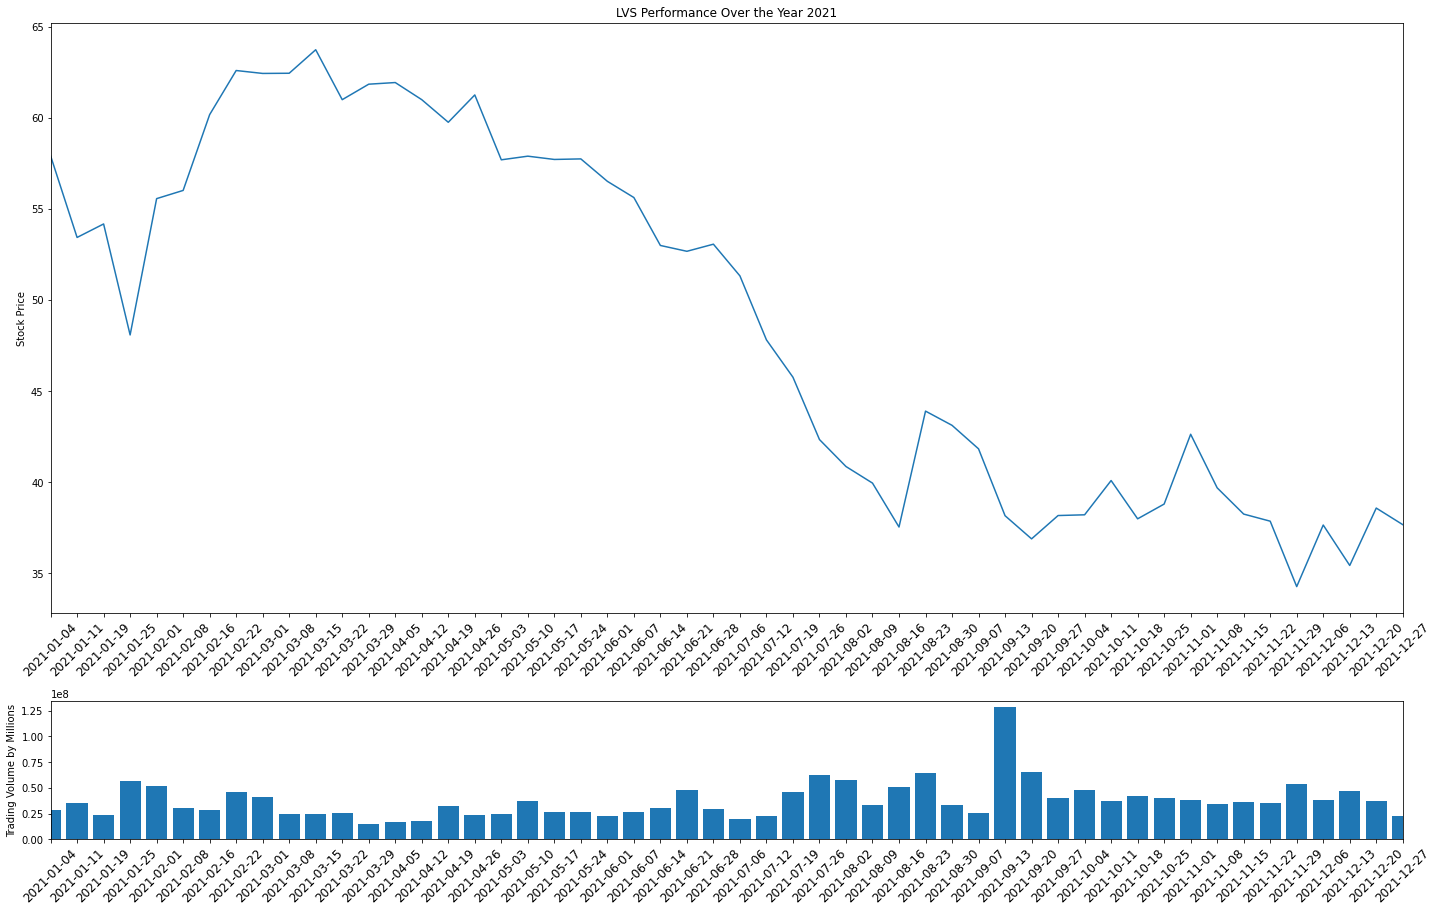

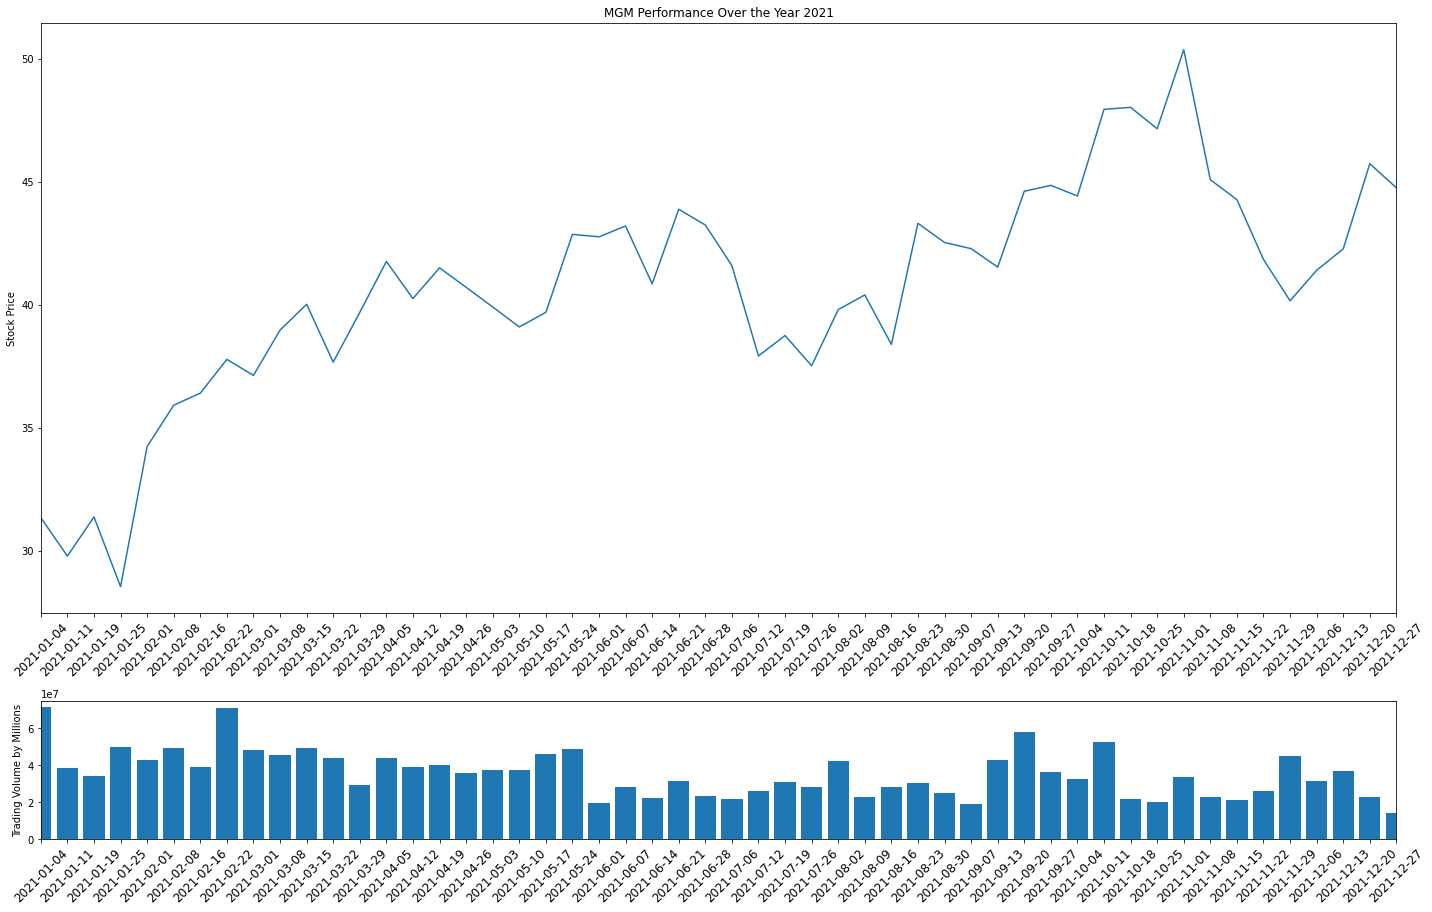

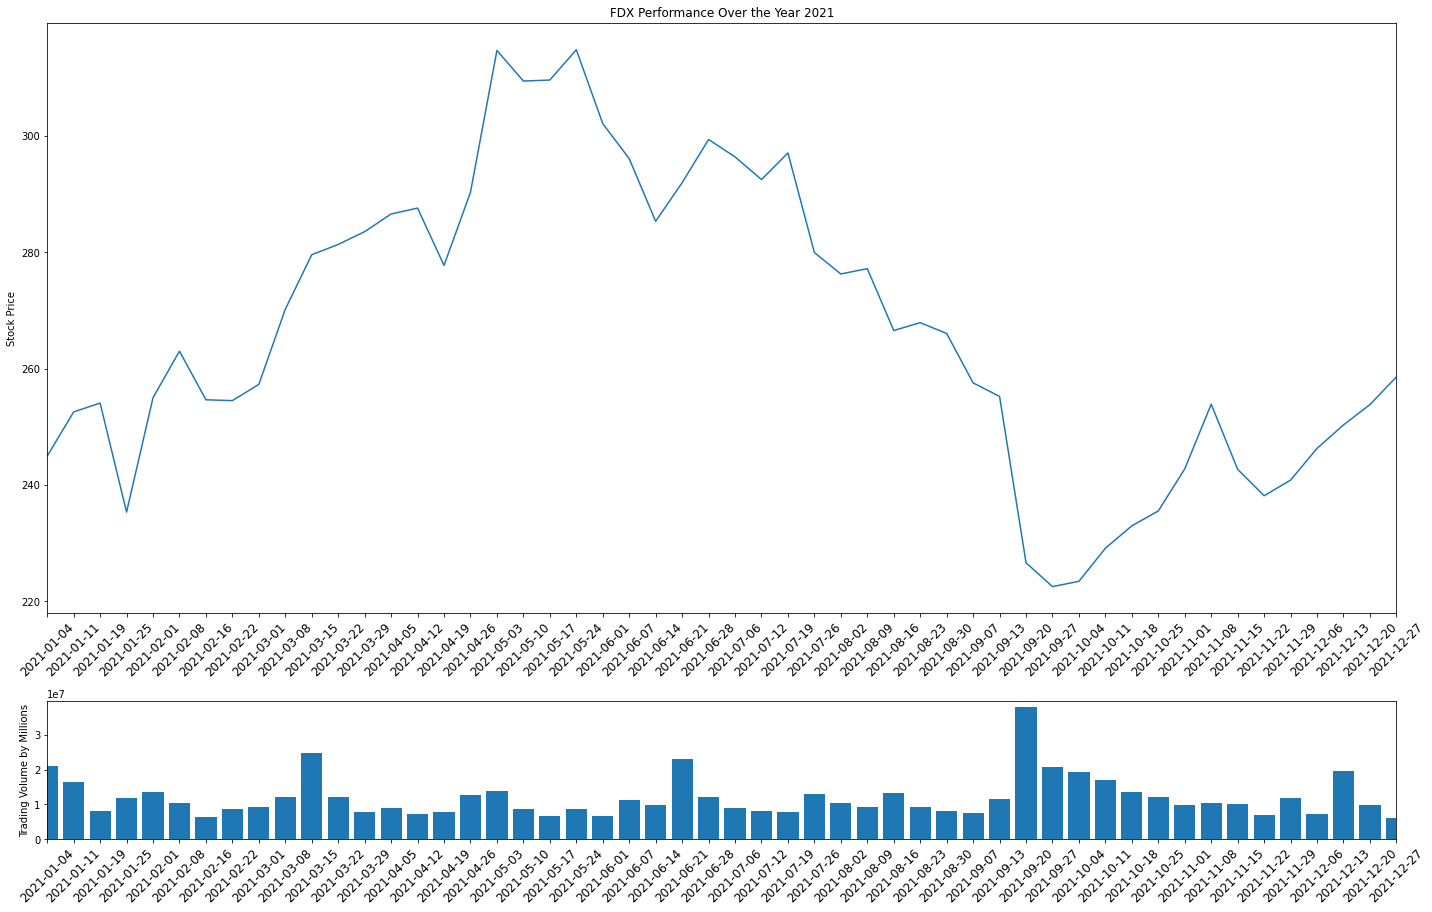

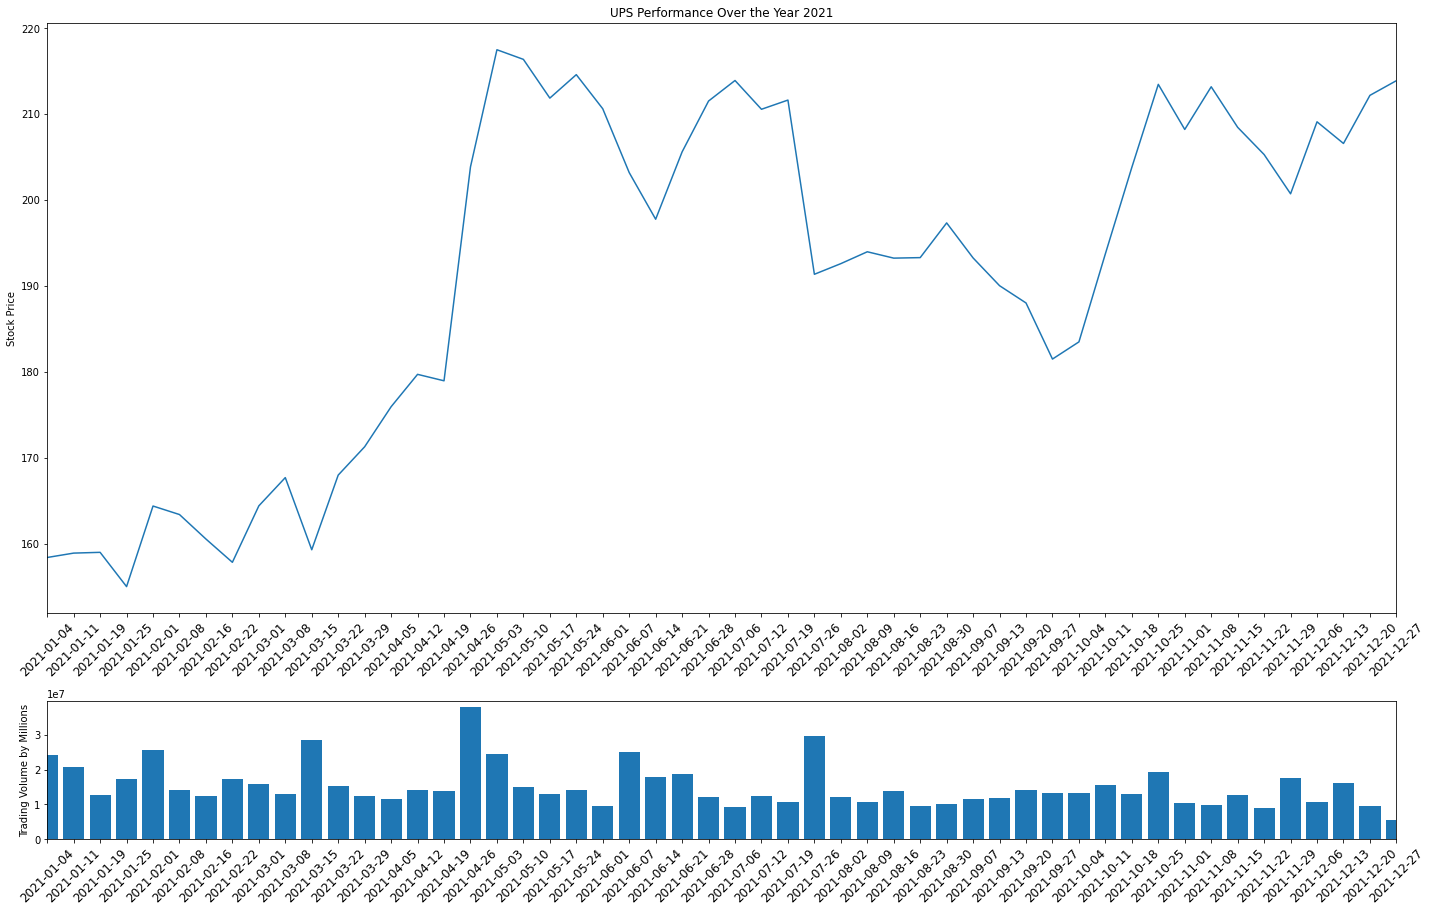

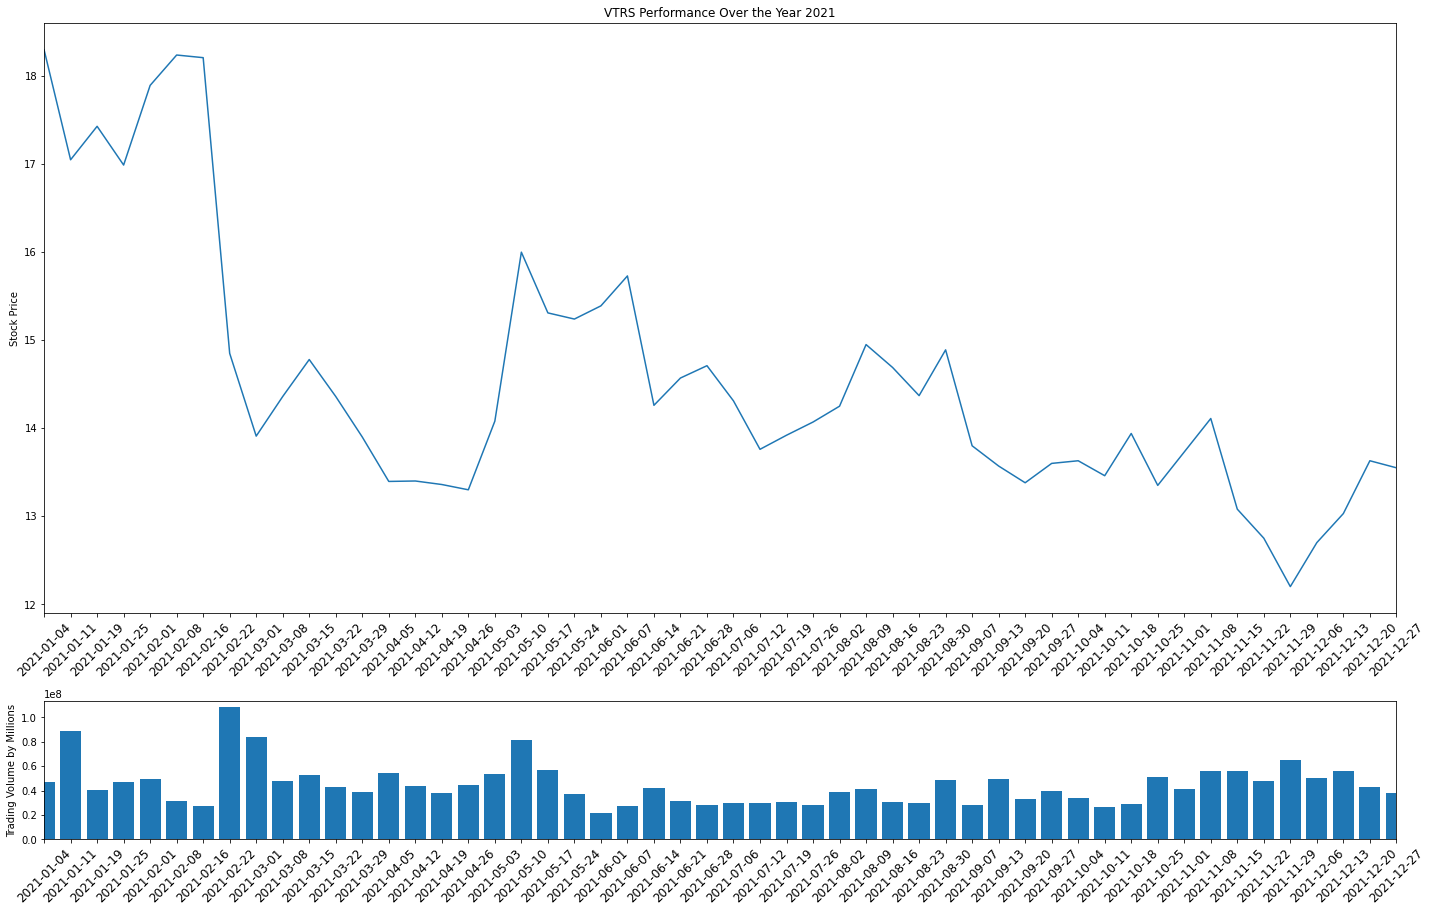

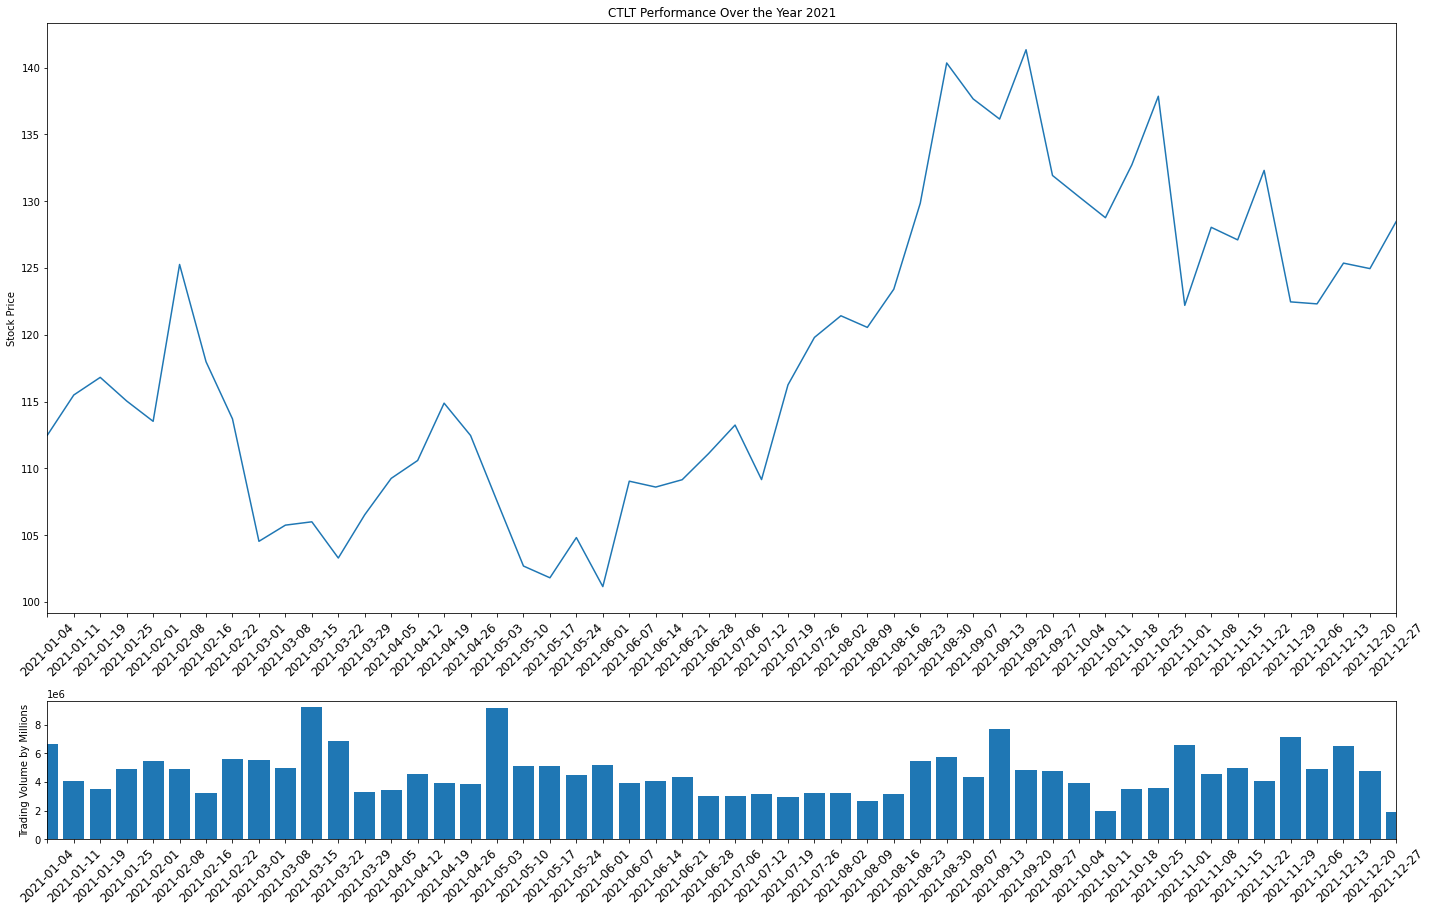

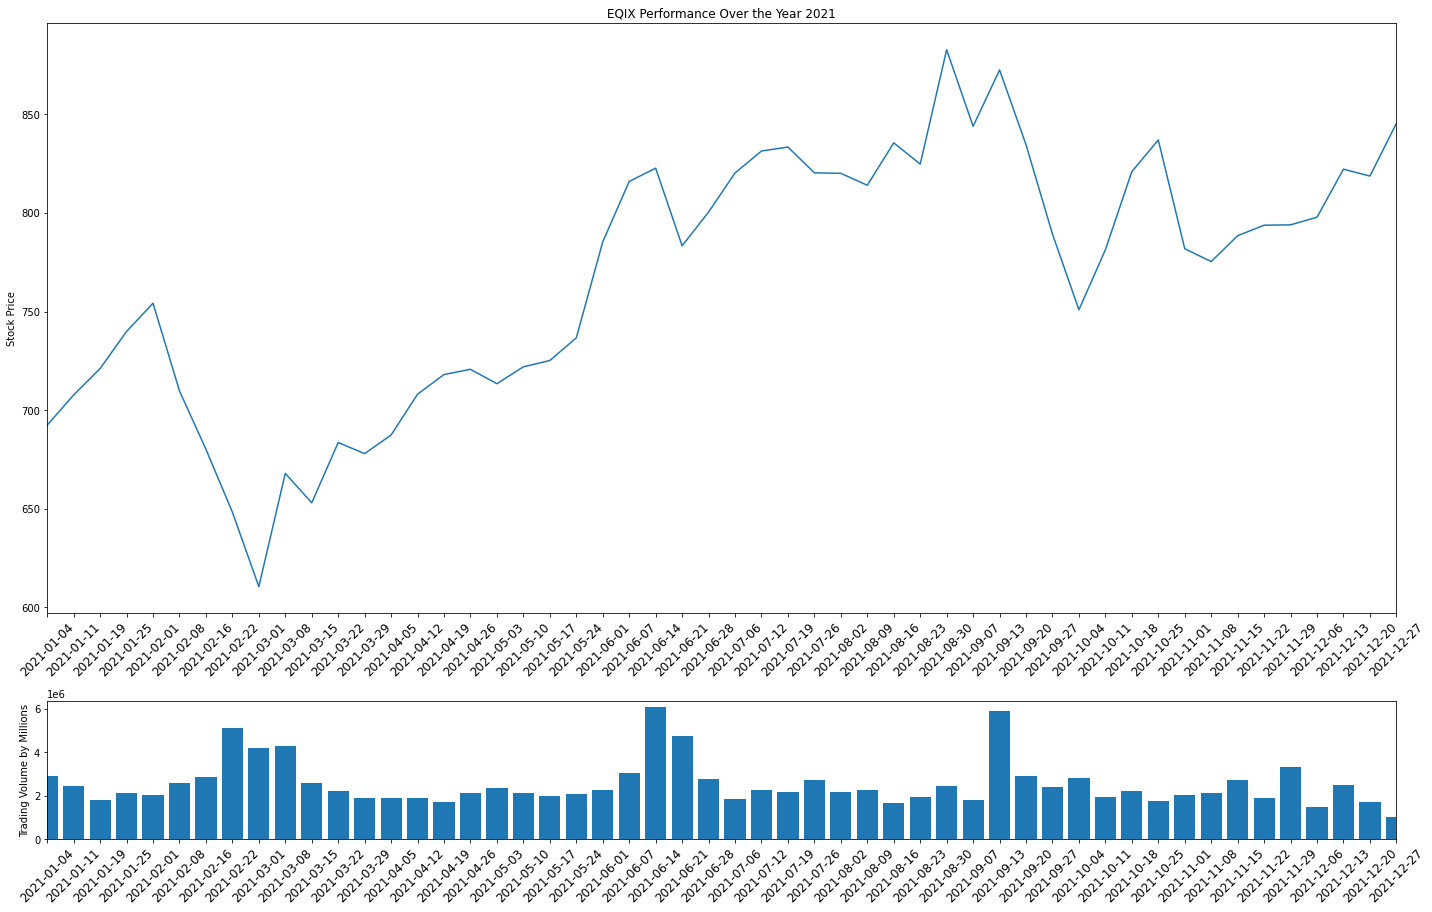

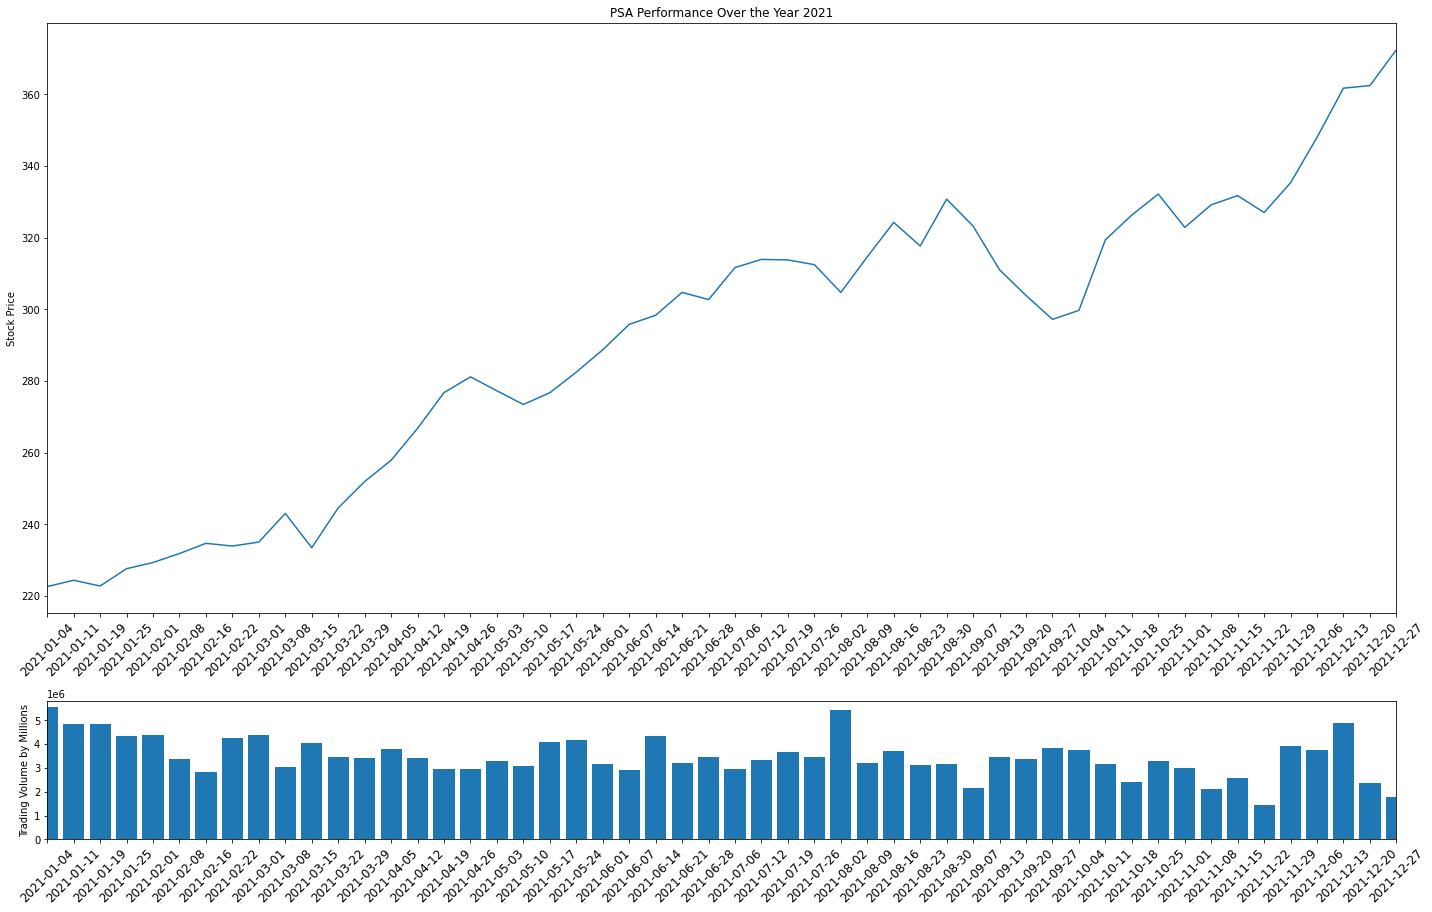

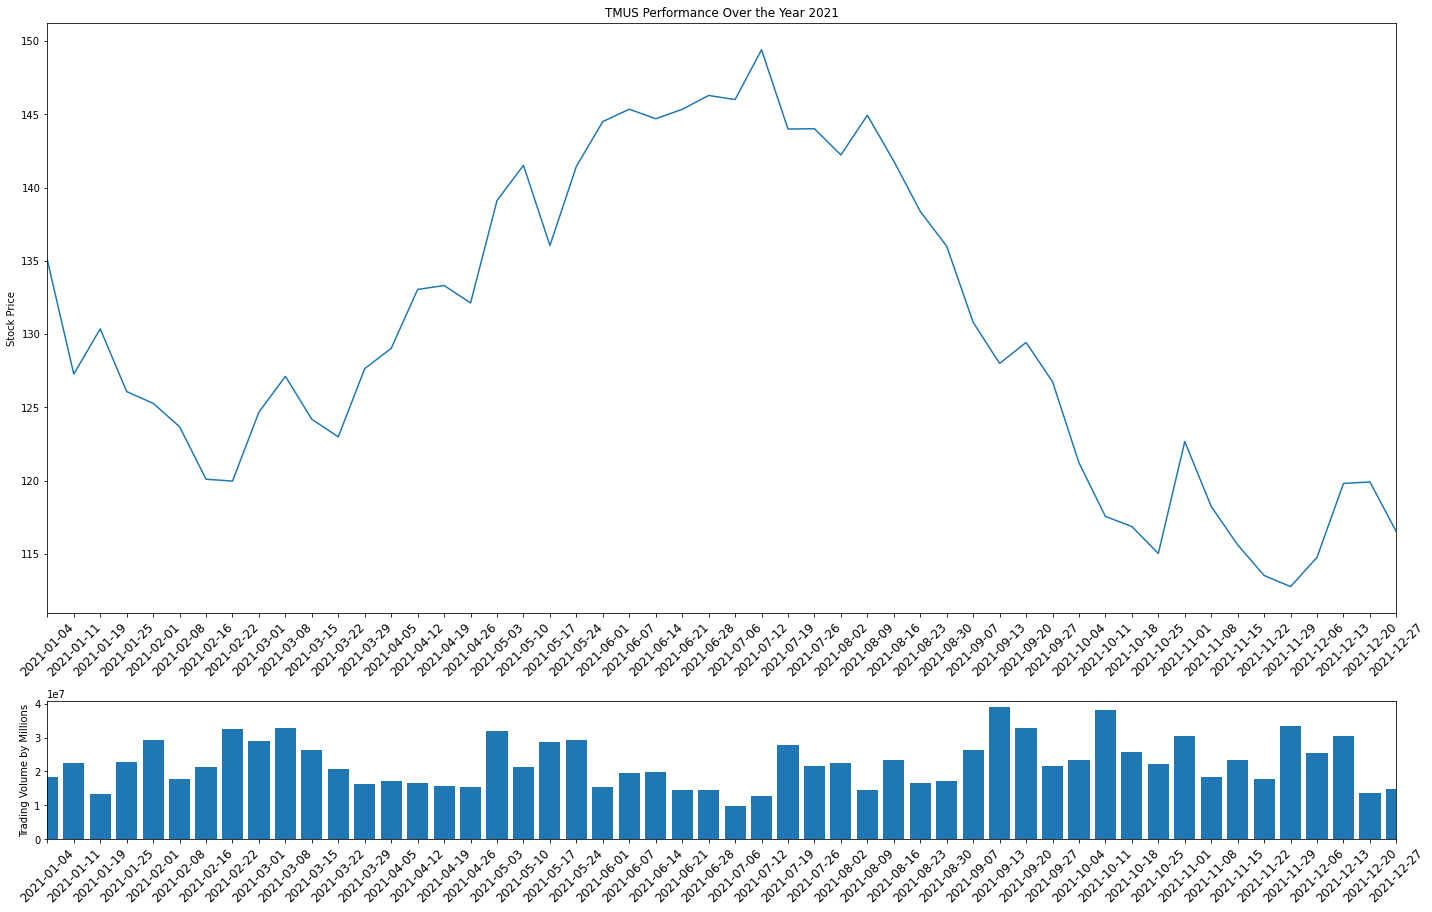

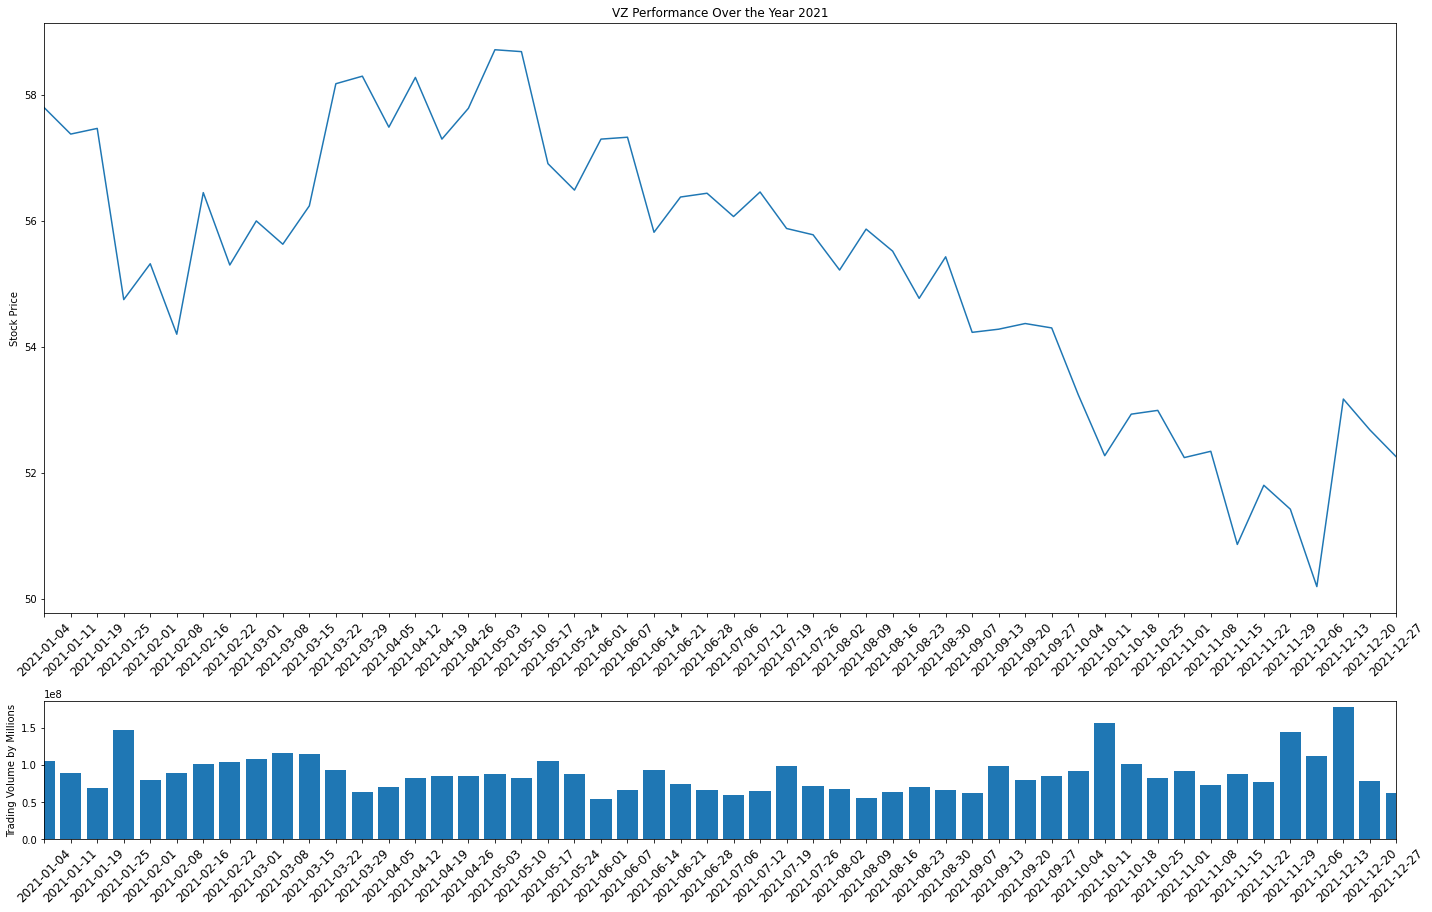

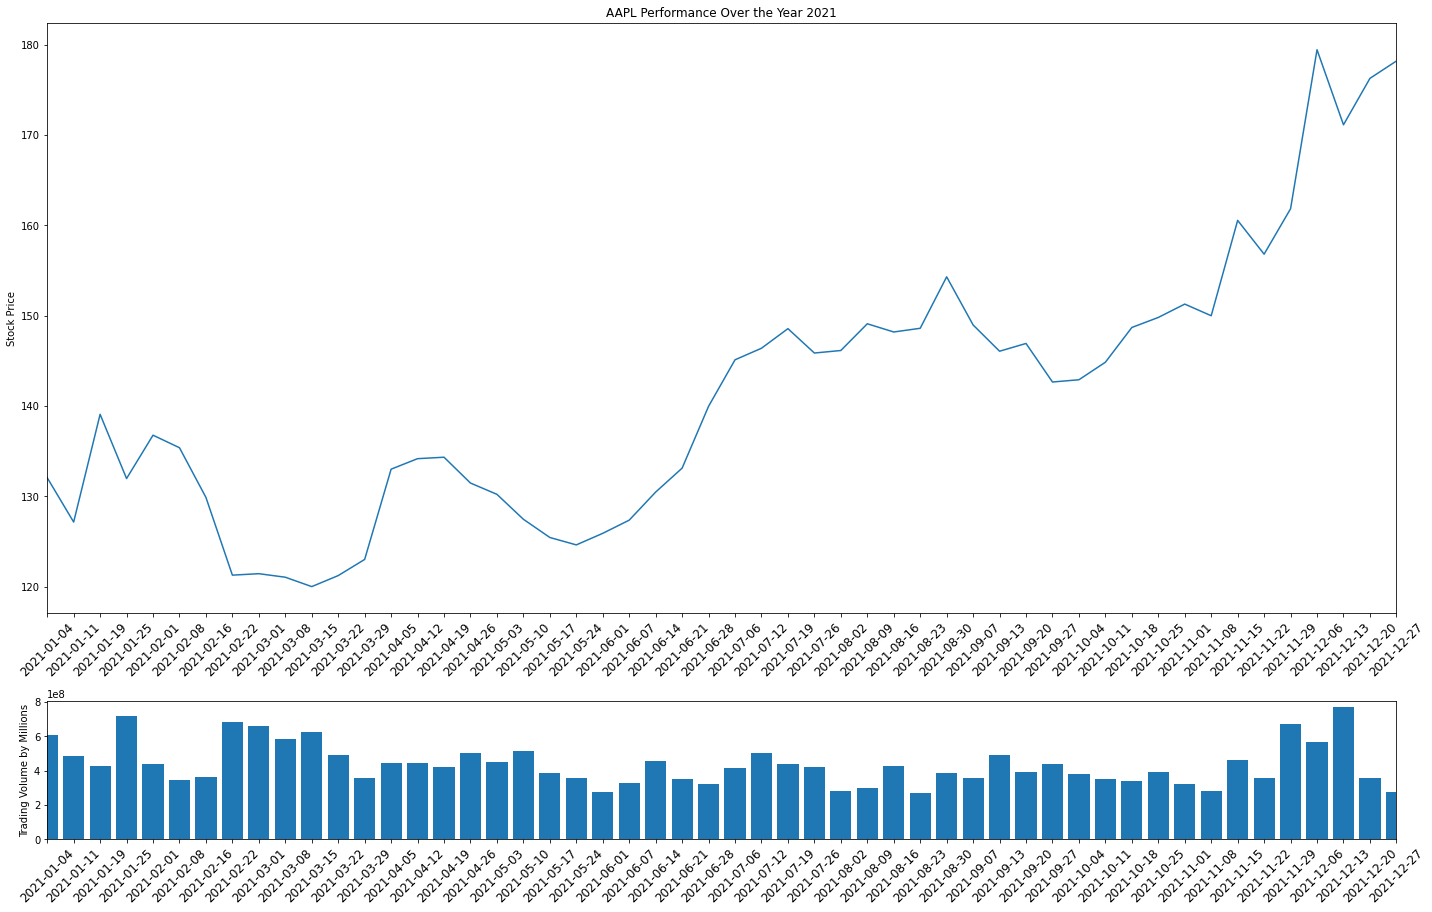

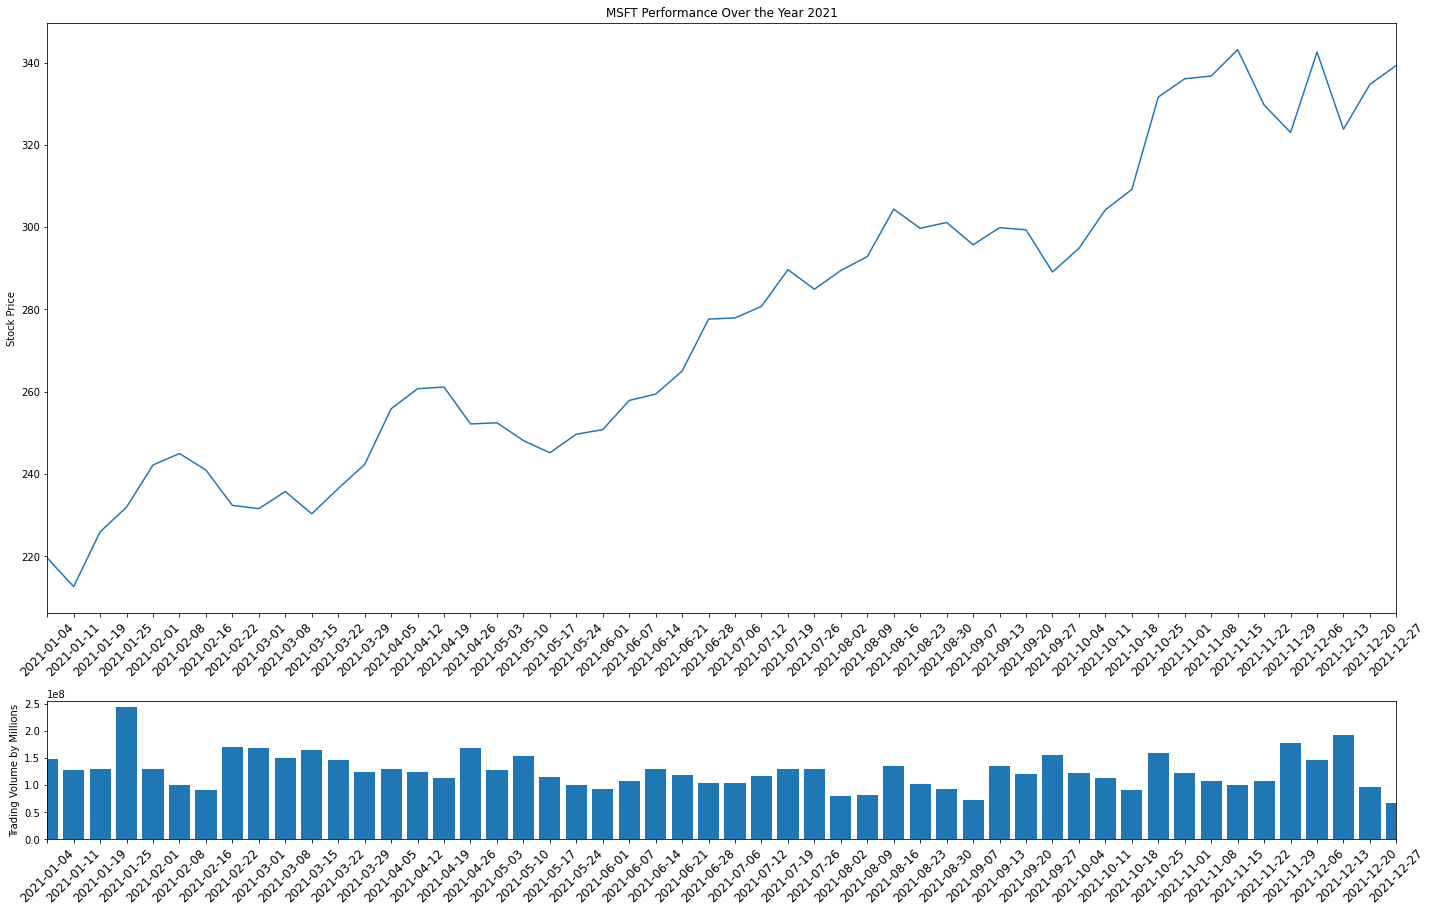

In [8]:
#2021
plot_chart(UAL_2021, 'UAL', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/UAL_2021')
plot_chart(DAL_2021, 'DAL', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/DAL_2021')
plot_chart(TSLA_2021, 'TSLA', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/TSLA_2021')
plot_chart(GM_2021, 'GM', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/GM_2021')
plot_chart(CLX_2021, 'CLX', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/CLX_2021')
plot_chart(EL_2021, 'EL', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/EL_2021')
plot_chart(ALGN_2021, 'ALGN', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/ALGN_2021')
plot_chart(MCK_2021, 'MCK', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/MCK_2021')
plot_chart(LVS_2021, 'LVS', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/LVS_2021')
plot_chart(MGM_2021, 'MGM', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/MGM_2021')
plot_chart(FDX_2021, 'FDX', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/FDX_2021')
plot_chart(UPS_2021, 'UPS', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/UPS_2021')
plot_chart(VTRS_2021, 'VTRS', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/VTRS_2021')
plot_chart(CTLT_2021, 'CTLT', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/CTLT_2021')
plot_chart(EQIX_2021, 'EQIX', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/EQIX_2021')
plot_chart(PSA_2021, 'PSA', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/PSA_2021')
plot_chart(TMUS_2021, 'TMUS', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/TMUS_2021')
plot_chart(VZ_2021, 'VZ', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/VZ_2021')
plot_chart(AAPL_2021, 'AAPL', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/AAPL_2021')
plot_chart(MSFT_2021, 'MSFT', 2021)
plt.savefig('Plotted_Images/2021_ticker_performance/MSFT_2021')

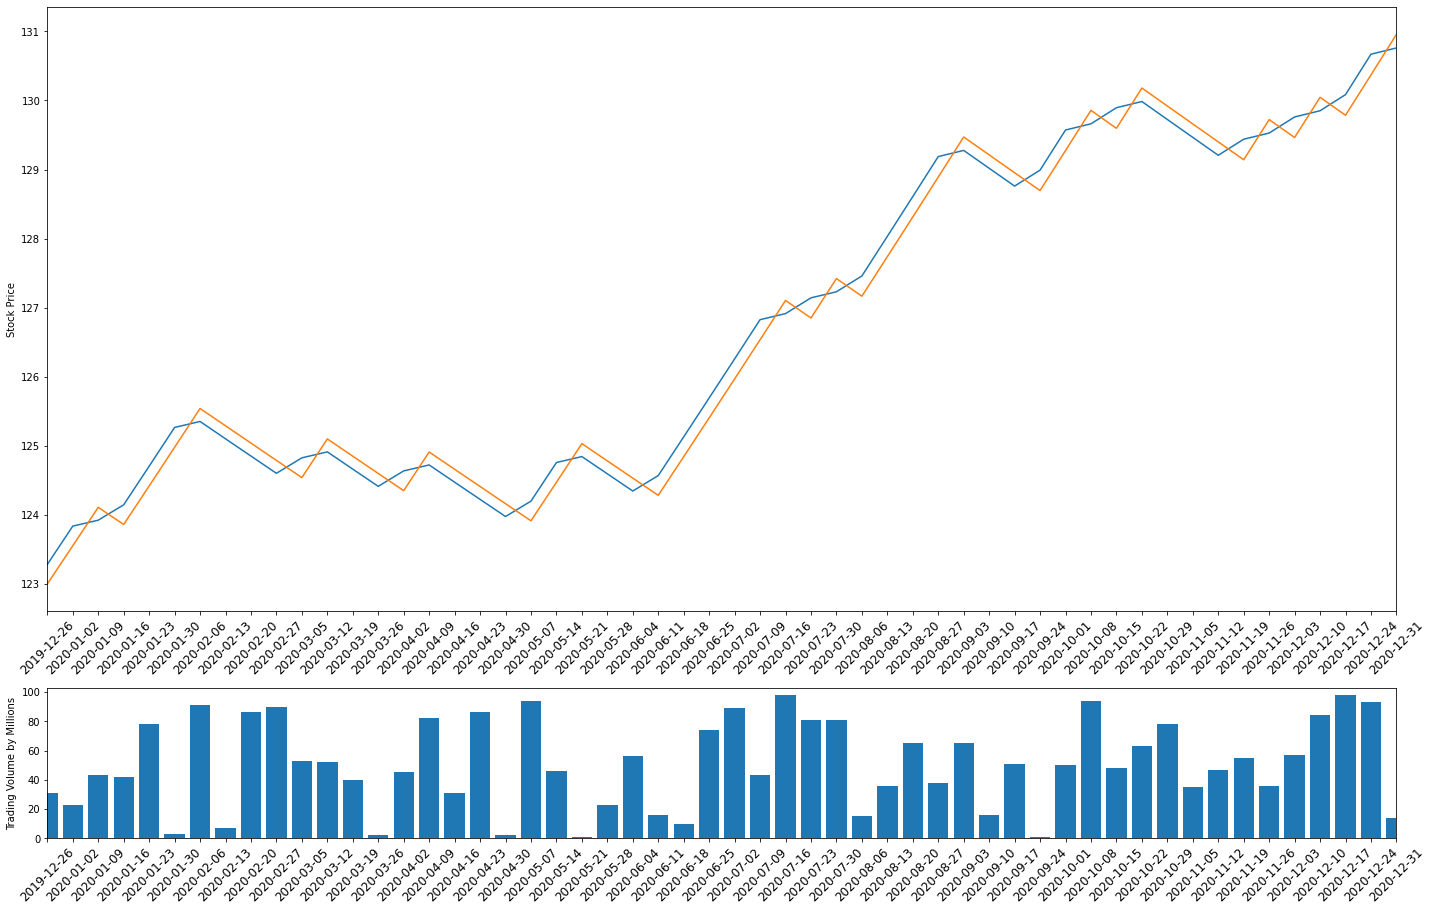

In [17]:
fig= plt.figure(figsize=(20,15))
top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_plt.plot((UAL_2019.index, (UAL_2019['Close'], (UAL_2019['Open'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Stock Price')
bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_date2020.index, stock_date2020['Volume'])
plt.xticks(rotation=45, fontsize=12)
plt.xlim([min(stock_date2020.index),max(stock_date2020.index)])
plt.ylabel('Trading Volume by Millions')
fig.tight_layout();

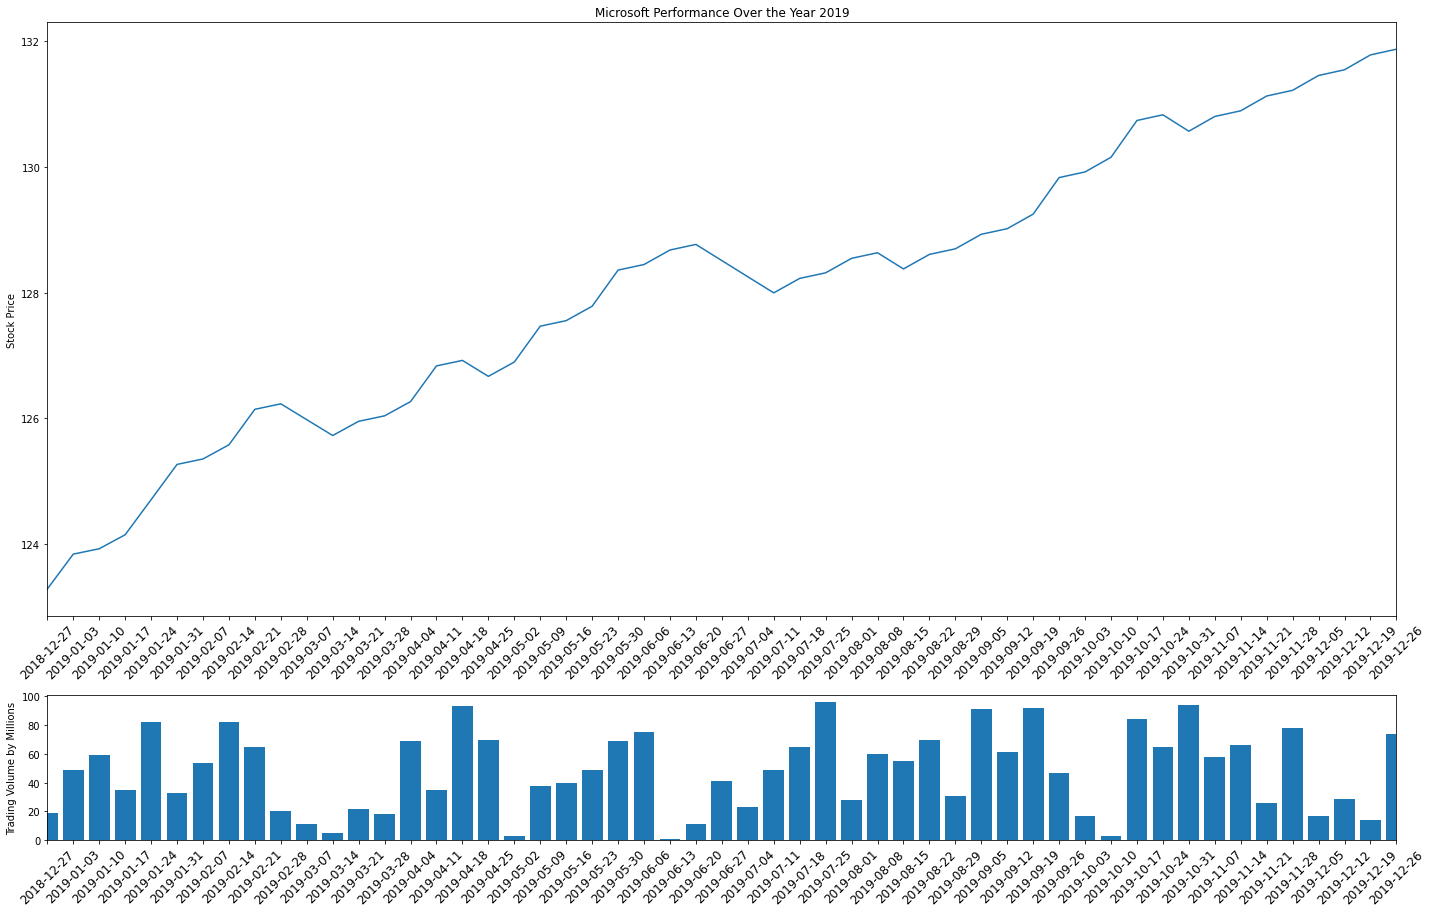

In [8]:
plot_chart(stock_date2019,'Microsoft',2019)

In [24]:
#created a seperate stock df by day function for our covid data
def stock_df_day(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'D', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name